## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer   
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from playsound import playsound
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from tqdm import tqdm
from sklearn.metrics import (
    roc_auc_score, log_loss, RocCurveDisplay
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample




FULL_RUN=False

## Data Loading

In [19]:
list_of_files = ["data_en_5.csv","data_de_5.csv","data_es_5.csv","data_fr_5.csv","data_da_5.csv","data_se_5.csv"]
folder_path = "./data/"
data_frames = []

for file_name in list_of_files:
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            data_frames.append(pd.read_csv(file))

data_raw = pd.concat(data_frames, ignore_index=True)

data_raw.head()

/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_40419/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_40419/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_40419/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_40419/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))


,client_id,path,sentence,sentence_domain,age,gender,accents,locale,mfcc_01_mean,mfcc_02_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
0,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070055.mp3,Hey,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-346.518280,105.766724,...,3.426842,4.632593,4.544755,3.958164,8989.213423,3783.708743,0.090629,0.042087,0.060498,0.114381
1,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070053.mp3,no,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-322.999481,126.325928,...,4.280022,3.408587,2.381304,4.629252,7763.446514,3417.324623,0.066695,0.032427,0.049127,0.084837
2,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070105.mp3,five,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-331.817749,117.011810,...,4.219483,3.785361,2.149989,4.760492,9540.267231,3227.213457,0.106078,0.038869,0.029110,0.057353
3,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070052.mp3,nine,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-332.498993,135.062897,...,4.019066,3.495409,1.738416,3.265927,8103.400735,2729.275878,0.065502,0.027279,0.026913,0.042086
4,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070093.mp3,Firefox,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-338.940430,107.349236,...,4.237970,3.737033,4.581891,4.229101,9500.395185,3109.524254,0.115977,0.054341,0.029288,0.053868


In [20]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183670 entries, 0 to 183669
Data columns (total 96 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   client_id                  183670 non-null  object 
 1   path                       183670 non-null  object 
 2   sentence                   183595 non-null  object 
 3   sentence_domain            24 non-null      object 
 4   age                        182568 non-null  object 
 5   gender                     183670 non-null  object 
 6   accents                    131636 non-null  object 
 7   locale                     183670 non-null  object 
 8   mfcc_01_mean               183670 non-null  float64
 9   mfcc_02_mean               183670 non-null  float64
 10  mfcc_03_mean               183670 non-null  float64
 11  mfcc_04_mean               183670 non-null  float64
 12  mfcc_05_mean               183670 non-null  float64
 13  mfcc_06_mean               18

In [21]:
data_raw.describe(include="all")

,client_id,path,sentence,sentence_domain,age,gender,accents,locale,mfcc_01_mean,mfcc_02_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
count,183670,183670,183595,24,182568,183670,131636,183670,183670.000000,183670.000000,...,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000,183670.000000
unique,36738,183670,140372,10,9,2,658,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,372293e65cdab88771e028a4351651ab2eff64438ddafc...,clips/common_voice_en_22070055.mp3,Firefox,general,twenties,male_masculine,United States English,en,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,1,869,10,74945,143330,35715,106233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-433.083453,106.725027,...,4.619814,4.847164,6.921225,6.550476,4920.925742,2871.320474,0.084152,0.071973,0.047341,0.053646
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.895697,27.527274,...,0.773090,0.951920,2.099385,2.942824,1824.650639,989.775650,0.039789,0.028838,0.035350,0.033410
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1131.370972,-8.795303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-479.824127,89.726835,...,4.084150,4.195326,5.468441,4.796036,3611.233885,2097.006988,0.055889,0.051305,0.022227,0.028345
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-417.808914,107.633327,...,4.525914,4.711573,6.732120,5.815831,4602.441790,2794.098861,0.077148,0.068592,0.041500,0.050502
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-372.730217,124.976196,...,5.061872,5.361510,8.165126,7.197205,5952.463468,3543.561115,0.104689,0.089774,0.064625,0.073442


In [22]:
data_raw["age"].unique()

array(['twenties', 'teens', 'thirties', 'fourties', 'fifties', 'sixties',
       nan, 'seventies', 'eighties', 'nineties'], dtype=object)

In [23]:
with open("./data/WORLD-2024.csv", "r") as file:
    world_population_raw = pd.read_csv(file)

def map_to_bin(age_range):
    try:
        lower = int(age_range.split('-')[0])
    except (ValueError, IndexError):
        return None
    return (lower // 10) * 10

world_population = world_population_raw.copy()
world_population['age'] = world_population_raw['Age'].apply(map_to_bin)
world_population['count'] = world_population['M'] + world_population['F']

world_population=world_population.groupby('age', as_index=False)[['M', 'F', 'count']].sum()

print("Global population by age group")
world_population_table= PrettyTable()
world_population_table.field_names = ["Age", "F", "M", "Count"]
for age in world_population["age"].unique():
    female= world_population[world_population["age"] == age]["F"].values[0]
    male= world_population[world_population["age"] == age]["M"].values[0]
    count = world_population[world_population["age"] == age]["count"].values[0]
    world_population_table.add_row([age, female, male, count])
print(world_population_table)

world_population= world_population[(world_population["age"] > 0)&(world_population["age"] < 100)]
world_population['percentage_f'] = world_population['F'] / world_population['count'].sum()
world_population['percentage_m'] = world_population['M'] / world_population['count'].sum()

world_population_table= PrettyTable()
world_population_table.field_names = ["Age", "Count", "Percentage - Female", "Percentage - Male"]
for age in world_population["age"].unique():
    count = world_population[world_population["age"] == age]["count"].values[0]
    percentage_f = np.round(world_population[world_population["age"] == age]["percentage_f"].values[0]*100,2)
    percentage_m = np.round(world_population[world_population["age"] == age]["percentage_m"].values[0]*100,2)
    world_population_table.add_row([age, count, percentage_f, percentage_m])
print(world_population_table)

Global population by age group
+------+-----------+-----------+------------+
| Age  |     F     |     M     |   Count    |
+------+-----------+-----------+------------+
| 0.0  | 647571780 | 683880297 | 1331452077 |
| 10.0 | 646940513 | 689549048 | 1336489561 |
| 20.0 | 591939467 | 627801903 | 1219741370 |
| 30.0 | 583727408 | 612129215 | 1195856623 |
| 40.0 | 499876584 | 511145211 | 1011021795 |
| 50.0 | 444383233 | 438029375 | 882412608  |
| 60.0 | 335349756 | 308707292 | 644057048  |
| 70.0 | 207266969 | 169569804 | 376836773  |
| 80.0 |  84361120 |  55509075 | 139870195  |
| 90.0 |  16467366 |  7180149  |  23647515  |
+------+-----------+-----------+------------+
+------+------------+---------------------+-------------------+
| Age  |   Count    | Percentage - Female | Percentage - Male |
+------+------------+---------------------+-------------------+
| 10.0 | 1336489561 |         9.47        |        10.1       |
| 20.0 | 1219741370 |         8.67        |        9.19       |
| 30.

In [24]:
def transform_age(age):
    if age=="teens":
        return 10
    elif age=="twenties":
        return 20
    elif age=="thirties":
        return 30
    elif age=="fourties":
        return 40
    elif age=="fifties":
        return 50
    elif age=="sixties":
        return 60
    elif age=="seventies":
        return 70
    elif age=="eighties":
        return 80
    elif age=="nineties":
        return 90
    elif isinstance(age, (int, float)):
        return age
    else:
        return None

data_raw["age"] = data_raw["age"].apply(transform_age)
print(f'dropped {data_raw["age"].isnull().sum()} rows')
data_raw = data_raw.dropna(subset=["age"])

# print counts
def generate_age_count_table(df):
    """
    Function to generate a PrettyTable with age counts
    :param df: DataFrame containing an 'age' column
    :return: PrettyTable object
    """
    table = PrettyTable()
    table.field_names = ["Age", "F", "M", "Count"]
    for age in sorted(df["age"].unique()):
        female_count = df[(df["age"] == age) & (df["gender"] == "female_feminine")].shape[0]
        male_count = df[(df["age"] == age) & (df["gender"] =="male_masculine")].shape[0]
        count = df[df["age"] == age].shape[0]
        table.add_row([age,female_count, male_count, count])
    return table

# Generate and print the table
table = generate_age_count_table(data_raw)
print(table)

dropped 1102 rows
+------+-------+-------+-------+
| Age  |   F   |   M   | Count |
+------+-------+-------+-------+
| 10.0 |  4652 | 16107 | 20759 |
| 20.0 | 15995 | 58950 | 74945 |
| 30.0 |  7393 | 32188 | 39581 |
| 40.0 |  4698 | 18513 | 23211 |
| 50.0 |  4434 |  9781 | 14215 |
| 60.0 |  2206 |  4969 |  7175 |
| 70.0 |  591  |  1779 |  2370 |
| 80.0 |   52  |  231  |  283  |
| 90.0 |   0   |   29  |   29  |
+------+-------+-------+-------+


In [25]:
# Create age_young_old column
data_raw['age_young_old'] = data_raw['age'].apply(lambda x: 'young' if x <= 30 else ('old' if x >= 40 else 'middle'))

# Create age_3_bins column
def categorize_age_3_bins(age):
    if age < 30:
        return '10-29'
    elif age < 50:
        return '30-49'
    else:
        return '50+'

data_raw['age_3_bins'] = data_raw['age'].apply(categorize_age_3_bins)

# Display the first few rows to verify
data_raw[['age', 'age_young_old', 'age_3_bins']].head()

,age,age_young_old,age_3_bins
0,20.0,young,10-29
1,20.0,young,10-29
2,20.0,young,10-29
3,20.0,young,10-29
4,20.0,young,10-29


In [26]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 20), bins=50, color='black')
    plt.suptitle('Histograms (50 bins) of all features', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    
if FULL_RUN:   
    histograms(data_raw)

In [27]:
# histograms by gender
def histogram_by_gender(feature):
    
    female_feminine = data_raw['gender'] == 'female_feminine'
    feature_female = feature[female_feminine]
    
    male_masculine = data_raw['gender'] == 'male_masculine'
    feature_male = feature[male_masculine]
    
    plt.figure(figsize=(10, 5))
    plt.hist(feature_female, bins=50, color='pink', alpha=0.5)
    plt.hist(feature_male, bins=50, color='blue', alpha=0.5)
    plt.title(f'Histogram of {feature.columns[0]}')
    plt.show()

if FULL_RUN: 
    histogram_by_gender(data_raw[['spec_bandwidth_mean']])
    histogram_by_gender(data_raw[['spec_contrast_band_1_mean']])

        

In [28]:
col_to_log_transform = ['spec_contrast_band_7_mean', 'spec_contrast_band_7_std', 'rmse_mean', 'rmse_std']

In [29]:
# drop sentence_domain & exclude duplicate speakers
try:
    data_sampled = data_raw.groupby("client_id", group_keys=False).apply(
    lambda g: pd.concat([g.drop_duplicates("locale").head(5), g.head(5 - len(g.drop_duplicates("locale")))]))
    #data_sampled=data_raw[data_raw["locale"]=="en"]
    data_sampled = data_sampled.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain already dropped")

/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_40419/4268570829.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_sampled = data_raw.groupby("client_id", group_keys=False).apply(


In [30]:
log_rmse = np.log(data_sampled['rmse_mean'] + 1e-10)


# First histogram
if FULL_RUN:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    log_rmse.hist(bins=200, ax=axes[0], color='black')
    # data_raw['rmse_mean'].hist(bins=200, ax=axes[0], color='black')
    axes[0].set_title('Before Dropping Quiet Audio Files')

# IQR-based outlier detection
Q1 = log_rmse.quantile(0.25)
Q3 = log_rmse.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

# Apply bounds to filter data
mask_inliers = (log_rmse >= lower_bound) & (log_rmse <= upper_bound)
data_clean = data_sampled[mask_inliers]

# Dropping quiet audio files
#bool_mask_quiet = data_sampled["rmse_mean"] < 0.001
#data_clean = data_sampled[~bool_mask_quiet]
print(f"Samples dropped: {data_sampled.shape[0]-data_clean.shape[0]}")
print(f"Samples left: {data_clean.shape[0]}")

# Second histogram
if FULL_RUN:
    np.log(data_clean['rmse_mean'] + 1e-10).hist(bins=200, ax=axes[1], color='black')
    # data_raw['rmse_mean'].hist(bins=200, ax=axes[1], color='black')
    axes[1].set_title('After Dropping Quiet Audio Files')

    plt.suptitle('Logarithm of rmse_mean', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    

Lower Bound:-5.460270548727399
Upper Bound:-1.1281796576427836
Samples dropped: 6211
Samples left: 170589


In [31]:
""" #Undersample based on the demographic data
data_reduced = pd.DataFrame(columns=data_raw.columns)
for age in demographically_based_count["age"].unique():
    
    count_f = demographically_based_count[demographically_based_count["age"] == age]["count_f"].values[0].astype(int)
    count_m = demographically_based_count[demographically_based_count["age"] == age]["count_m"].values[0].astype(int)
    age_group_f = data_raw[(data_raw["age"] == age) & (data_raw["gender"] =="female_feminine")]
    age_group_m = data_raw[(data_raw["age"] == age) & (data_raw["gender"] =="male_masculine")]
    if len(age_group_f) > count_f:
        age_group_f = age_group_f.sample(n=count_f, random_state=27)
    if len(age_group_m) > count_m:
        age_group_m = age_group_m.sample(n=count_m, random_state=27)
    data_reduced = pd.concat([data_reduced, age_group_f, age_group_m], ignore_index=True)
data_reduced = data_reduced.sample(frac=1, random_state=27).reset_index(drop=True)


# Undersample the data
#data_raw = data_raw.groupby("age").apply(lambda x: x.sample(n=min(len(x)), random_state=27)).reset_index(drop=True)

table = generate_age_count_table(data_reduced)
print(table) """

' #Undersample based on the demographic data\ndata_reduced = pd.DataFrame(columns=data_raw.columns)\nfor age in demographically_based_count["age"].unique():\n    \n    count_f = demographically_based_count[demographically_based_count["age"] == age]["count_f"].values[0].astype(int)\n    count_m = demographically_based_count[demographically_based_count["age"] == age]["count_m"].values[0].astype(int)\n    age_group_f = data_raw[(data_raw["age"] == age) & (data_raw["gender"] =="female_feminine")]\n    age_group_m = data_raw[(data_raw["age"] == age) & (data_raw["gender"] =="male_masculine")]\n    if len(age_group_f) > count_f:\n        age_group_f = age_group_f.sample(n=count_f, random_state=27)\n    if len(age_group_m) > count_m:\n        age_group_m = age_group_m.sample(n=count_m, random_state=27)\n    data_reduced = pd.concat([data_reduced, age_group_f, age_group_m], ignore_index=True)\ndata_reduced = data_reduced.sample(frac=1, random_state=27).reset_index(drop=True)\n\n\n# Undersample 

In [32]:
#Legacy weighting of the data
def calculate_weights(data_clean): 
    weights_df = world_population.melt(
        id_vars="age", 
        value_vars=["F", "M"], 
        var_name="gender", 
        value_name="population_count"
    )

    # Map gender to full names
    weights_df["gender"] = weights_df["gender"].map(
        {"F": "female_feminine", "M": "male_masculine"}
    )

    # Add percentage columns back to the melted DataFrame
    weights_df["percentage"] = weights_df.apply(
        lambda row: row["population_count"] / weights_df["population_count"].sum(), axis=1
    )

    # STEP 2: Compute sample proportions from your dataset
    sample_counts = data_clean.groupby(["age","gender"]).size().reset_index(name="sample_count")
    total_sample_count = len(data_clean)
    sample_counts["sample_proportion"] = sample_counts["sample_count"] / total_sample_count

    # STEP 3: Merge and calculate weights
    weights_df = pd.merge(
        weights_df, 
        sample_counts, 
        on=["age", "gender"], 
        how="inner"
    )

    def adapted_sigmoid_scaling(w_raw):
        if w_raw < 1:
            return w_raw
        else:
            return np.log1p(w_raw)
    
    # Calculate sample weights
    weights_df["sample_weight"] = weights_df["percentage"] / weights_df["sample_proportion"]
    weights_df["log_sample_weight"] = weights_df["sample_weight"].apply(adapted_sigmoid_scaling)
    return weights_df


#Output to verify proportions and weights
weights_initial = calculate_weights(data_clean)
pd.set_option('display.float_format', lambda x: f'{x:0.4f}')
print("\n=== Age × Gender Weight Summary ===")
print(weights_initial[["age", "gender", "percentage", "sample_proportion", "sample_weight"]].sort_values(by=["age", "gender"]).reset_index(drop=True))


=== Age × Gender Weight Summary ===
       age           gender  percentage  sample_proportion  sample_weight
0  10.0000  female_feminine      0.0947             0.0255         3.7197
1  10.0000   male_masculine      0.1010             0.0876         1.1521
2  20.0000  female_feminine      0.0867             0.0856         1.0126
3  20.0000   male_masculine      0.0919             0.3220         0.2855
4  30.0000  female_feminine      0.0855             0.0399         2.1415
5  30.0000   male_masculine      0.0896             0.1752         0.5116
6  40.0000  female_feminine      0.0732             0.0256         2.8570
7  40.0000   male_masculine      0.0748             0.1027         0.7288
8  50.0000  female_feminine      0.0651             0.0248         2.6202
9  50.0000   male_masculine      0.0641             0.0547         1.1715
10 60.0000  female_feminine      0.0491             0.0123         3.9828
11 60.0000   male_masculine      0.0452             0.0284         1.5914
1

In [33]:
# Function to sample up to n_total rows with as balanced gender as possible
def balanced_sample_prefer_full_size(group, total_n=20000):
    female = group[group['gender'] == 'female_feminine']
    male = group[group['gender'] == 'male_masculine']
    
    n_female = len(female)
    n_male = len(male)

    # If both genders have enough to sample half-half
    if n_female >= total_n // 2 and n_male >= total_n // 2:
        female_sampled = resample(female, replace=False, n_samples=total_n // 2, random_state=27)
        male_sampled = resample(male, replace=False, n_samples=total_n // 2, random_state=27)
    else:
        # Use as many of the smaller gender as possible, fill remainder with the larger one
        if n_female < n_male:
            female_sampled = female  # use all
            male_sampled = resample(male, replace=False, n_samples=total_n - len(female_sampled), random_state=27)
        else:
            male_sampled = male  # use all
            female_sampled = resample(female, replace=False, n_samples=total_n - len(male_sampled), random_state=27)

    return pd.concat([female_sampled, male_sampled])

# Desired size per bin
TARGET_SIZE_PER_BIN = 20000

# Handle all bins except '30-49'
bins_excluding_30_49 = data_clean[data_clean['age_3_bins'] != '30-49']
sampled_bins = []

for bin_name, group in bins_excluding_30_49.groupby('age_3_bins'):
    sampled = balanced_sample_prefer_full_size(group, total_n=TARGET_SIZE_PER_BIN)
    sampled_bins.append(sampled)

# Handle 30-49 by splitting into age == 30 and age == 40
data_30 = data_clean[data_clean['age'] == 30]
data_40 = data_clean[data_clean['age'] == 40]

sampled_30 = balanced_sample_prefer_full_size(data_30, total_n=10000)
sampled_40 = balanced_sample_prefer_full_size(data_40, total_n=10000)

# Combine all
data_reduced = pd.concat(sampled_bins + [sampled_30, sampled_40], ignore_index=True)

# Verification
print("Age young/old distribution:")
print(data_reduced['age_young_old'].value_counts())

print("\nAge 3-bin distribution:")
print(data_reduced['age_3_bins'].value_counts())

print("\nGender distribution:")
print(data_reduced['gender'].value_counts())


Age young/old distribution:
age_young_old
young    30000
old      30000
Name: count, dtype: int64

Age 3-bin distribution:
age_3_bins
10-29    20000
50+      20000
30-49    20000
Name: count, dtype: int64

Gender distribution:
gender
male_masculine     33655
female_feminine    26345
Name: count, dtype: int64


In [34]:
# Data frames 
y= data_reduced[["gender", "age", "locale", "age_young_old", "age_3_bins"]]
X= data_reduced.drop(columns=["gender", "age", "accents", "locale","age_young_old", "age_3_bins"])


# Perform the train test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=27)
for train_full_index, test_index in sss.split(X,  y['age'].astype(str) + "-" + y['gender']):
    X_train_full = X.iloc[train_full_index]
    y_train_full = y.iloc[train_full_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

# Further split the full training data set into training and validation
sss_train_val = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_index, val_index in sss_train_val.split(X_train_full, y_train_full['age'].astype(str) + "-" + y_train_full['gender']):
    X_train = X_train_full.iloc[train_index]
    y_train = y_train_full.iloc[train_index]
    X_val = X_train_full.iloc[val_index]
    y_val = y_train_full.iloc[val_index]

# Drop columns that are not needed
X_train = X_train.drop(columns=["path", "sentence", "client_id"])
X_test = X_test.drop(columns=["path", "sentence", "client_id"])
X_val = X_val.drop(columns=["path", "sentence", "client_id"])


# Df only for EDA
df_eda = X_train.copy()
df_eda['age'] = y_train["age"]
df_eda['gender'] = y_train['gender']
df_eda['age-gender'] = y_train["age"].astype(int).astype(str) + "-" + y_train["gender"].str[0]
df_eda['locale']=y_train['locale']
df_eda_cat = df_eda.select_dtypes(include=['object'])
df_eda_num = df_eda.select_dtypes(include=['number'])


y_train = y_train.copy()
y_val = y_val.copy()

label_encoder = LabelEncoder()
y_train["age_3_bins_encoded"] = label_encoder.fit_transform(y_train["age_3_bins"])
y_val["age_3_bins_encoded"] = label_encoder.transform(y_val["age_3_bins"])
y_train["age_young_old_encoded"] = label_encoder.fit_transform(y_train["age_young_old"])
y_val["age_young_old_encoded"] = label_encoder.transform(y_val["age_young_old"])



# Grid search to tune age prediction on true gender

X_train_male = X_train[y_train['gender'] == 'male_masculine']
y_train_male = y_train[y_train['gender'] == 'male_masculine']
X_val_male = X_val[y_val['gender'] == 'male_masculine']
y_val_male = y_val[y_val['gender'] == 'male_masculine']

X_train_female = X_train[y_train['gender'] == 'female_feminine']
y_train_female = y_train[y_train['gender'] == 'female_feminine']
X_val_female = X_val[y_val['gender'] == 'female_feminine']
y_val_female = y_val[y_val['gender'] == 'female_feminine']





print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)



X_train shape:  (40800, 88)
X_val shape:  (10200, 88)
X_test shape:  (9000, 88)


In [35]:
print(generate_age_count_table(y_train))
print(generate_age_count_table(y_val))
print(generate_age_count_table(y_test))

+------+------+------+-------+
| Age  |  F   |  M   | Count |
+------+------+------+-------+
| 10.0 | 1586 | 1470 |  3056 |
| 20.0 | 5214 | 5330 | 10544 |
| 30.0 | 3400 | 3400 |  6800 |
| 40.0 | 2971 | 3828 |  6799 |
| 50.0 | 2881 | 5103 |  7984 |
| 60.0 | 1430 | 2641 |  4071 |
| 70.0 | 397  | 976  |  1373 |
| 80.0 |  36  | 123  |  159  |
| 90.0 |  0   |  14  |   14  |
+------+------+------+-------+
+------+------+------+-------+
| Age  |  F   |  M   | Count |
+------+------+------+-------+
| 10.0 | 397  | 368  |  765  |
| 20.0 | 1303 | 1332 |  2635 |
| 30.0 | 850  | 850  |  1700 |
| 40.0 | 743  | 957  |  1700 |
| 50.0 | 720  | 1276 |  1996 |
| 60.0 | 357  | 660  |  1017 |
| 70.0 |  99  | 244  |  343  |
| 80.0 |  9   |  31  |   40  |
| 90.0 |  0   |  4   |   4   |
+------+------+------+-------+
+------+------+------+-------+
| Age  |  F   |  M   | Count |
+------+------+------+-------+
| 10.0 | 350  | 324  |  674  |
| 20.0 | 1150 | 1176 |  2326 |
| 30.0 | 750  | 750  |  1500 |
| 40.0 |

## EDA

In [36]:
if FULL_RUN:
    df_eda.describe()

In [37]:
if FULL_RUN:
    df_eda.info()
    print(df_eda['gender'].value_counts())

In [38]:
# comparing the means of the features using groupbys

def table_grouped_by(df, group_by_col):
    grouped_by_y = df.groupby(group_by_col).mean().T
    table = PrettyTable()
    table.field_names = ["Feature"]+list(grouped_by_y.columns)
    for feature, values in zip(grouped_by_y.index, grouped_by_y.values):
        table.add_row([feature] + values.tolist())
    table.align = "r"
    table.align["Feature"] = "l"
    table.title = "Grouped by " + group_by_col.name
    print(table)

if FULL_RUN:    
    table_grouped_by(df_eda_num, df_eda['gender'])
    table_grouped_by(df_eda_num, df_eda['age'])
    table_grouped_by(df_eda_num, df_eda['age-gender'])
    table_grouped_by(df_eda_num, df_eda['locale'])

In [39]:
# Correlation Matrix (save to zoom in)

def generate_correlation_matrix(df):
    plt.figure(figsize=(50, 50))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

if FULL_RUN:    
    generate_correlation_matrix(df_eda_num)

In [40]:
# scatter plots
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=df[['age', 'gender']].apply(tuple, axis=1), alpha=0.8)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

if FULL_RUN:
    # mfcc 
    # ....mfcc not multimodal
    scatter_plot(df_eda, 'mfcc_01_mean', 'mfcc_07_mean')
    scatter_plot(df_eda, 'mfcc_01_mean', 'spec_centroid_mean')
    # ....mfcc bimodal
    scatter_plot(df_eda, 'mfcc_02_mean', 'mfcc_04_mean')
    scatter_plot(df_eda, 'mfcc_02_mean', 'zcr_mean')


    # chroma differences in distances
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_02_mean')
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_05_mean')
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_11_mean')

    # spectral
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_bandwidth_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_1_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_4_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_7_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'zcr_mean')

    # temporal
    scatter_plot(df_eda, 'zcr_mean', 'rmse_mean')

## Data Preprocessing

In [41]:
from sklearn.metrics import make_scorer, cohen_kappa_score, mean_absolute_error

# Define QWK scorer
qwk_scorer = make_scorer(cohen_kappa_score, greater_is_better=True, weights='quadratic')

In [42]:
# Log transformation
def use_log(data, scale_by_min=False):
    assert np.min(data) >= 0, 'data contains negative or zero values at log transform'
    transformed = np.log(data)
    return transformed

# Defining Transformers
scl = StandardScaler()
log = FunctionTransformer(func=use_log, validate=False, kw_args={'scale_by_min': True}, feature_names_out='one-to-one')

# Defining Models
pca = PCA(n_components=0.95) # try differnet n_components
lda = LinearDiscriminantAnalysis()

# Pipelines
pipeline_log = Pipeline(steps=[
    ('log', log),
    ('scaler', scl)
])

pipeline_num = Pipeline(steps=[
    ('scaler', scl)
])

# Column selection
preprocessing = ColumnTransformer([
('log', pipeline_log, col_to_log_transform),
], remainder=pipeline_num)

preprocessing_pca = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('pca', pca)
    ]
)
preprocessing_lda = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('lda', lda)
    ]
)


In [43]:
if FULL_RUN:
    # (EDA Step) checking results of PCA and LDA
    preprocessing.fit(X_train)
    preprocessing_pca.fit(X_train)
    preprocessing_lda.fit(X_train, y_train['age'])

In [44]:
if FULL_RUN:
    # Visualize PCA
    x_train_pca = preprocessing_pca.fit_transform(X_train)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train["age"], palette="hls", alpha=0.6)
    plt.title('Scatterplot of PC1 vs PC2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Age')
    plt.show()

In [45]:
# LDA
if FULL_RUN:
    lda = preprocessing_lda.named_steps['lda']

    coefficients = lda.coef_[0]
    imp_lda = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

    table = PrettyTable()
    table.field_names = ["Feature", "Coefficient"]
    for row in zip(imp_lda.index, imp_lda['Coefficient']):
        feature = str(row[0])
        coef = float(row[1])
        table.add_row([feature, coef])
    print(table)


In [46]:
if FULL_RUN:
    x_train_lda = preprocessing_lda.transform(X_train)
    print(x_train_lda.shape)

In [47]:
X_train.describe()

,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,mfcc_05_mean,mfcc_06_mean,mfcc_07_mean,mfcc_08_mean,mfcc_09_mean,mfcc_10_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
count,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,...,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000,40800.0000
mean,-427.1929,102.8427,-1.4630,21.8830,6.2724,5.8307,-3.7421,-1.7639,-5.3818,-3.7507,...,4.7144,4.9413,6.9539,6.5783,4907.4252,2803.2953,0.0853,0.0723,0.0488,0.0569
std,79.9555,27.5786,18.7181,15.0007,12.8823,13.1234,9.9877,9.4937,7.9976,7.0559,...,0.7917,0.9722,2.0933,2.9726,1822.9385,974.5622,0.0397,0.0293,0.0341,0.0333
min,-724.8149,-2.4033,-98.1119,-51.6256,-64.8082,-51.1197,-59.7928,-50.5966,-46.1129,-36.3061,...,2.2338,1.9921,1.6168,1.7437,434.4715,213.3003,0.0035,0.0065,0.0043,0.0009
25%,-474.4866,85.4641,-13.0842,11.6541,-1.9345,-3.6091,-9.9949,-7.8077,-10.6847,-8.3341,...,4.1556,4.2675,5.4897,4.7822,3594.2960,2043.9895,0.0570,0.0511,0.0240,0.0315
50%,-417.1832,103.3287,-0.8655,21.5946,6.4602,5.2394,-3.2078,-1.7510,-5.2208,-3.6579,...,4.6262,4.8057,6.7543,5.8554,4582.6609,2695.2531,0.0784,0.0690,0.0427,0.0538
75%,-373.6087,121.0646,10.8467,31.7246,14.7271,14.8662,2.9295,4.3798,0.0081,0.9335,...,5.1883,5.4714,8.1877,7.2377,5964.9836,3448.4941,0.1060,0.0903,0.0656,0.0763
max,-45.6894,221.4489,79.6414,87.3256,65.7912,61.2546,40.7323,48.4032,32.0478,36.2443,...,12.4167,12.9128,20.6956,26.3979,14939.0625,6728.6470,0.4281,0.2844,0.3230,0.2939


In [48]:
preprocessed = preprocessing.fit_transform(X_train)
features = preprocessing.get_feature_names_out()

In [49]:
if FULL_RUN:
    df = pd.DataFrame(preprocessed, columns=features)
    df.head()
    histograms(df)

## Fitting Models

In [50]:
def bin_age_young_old(age):
    if age <= 30:
        return 'young'
    else:
        return 'old'
    
    
def bin_age_3_bins(age):
    if age < 30:
        return '10-29'
    elif age < 50:
        return '30-49'
    else:
        return '50+'

def identity(x):
    return x

def apply_binning(data, func):
    if isinstance(data, pd.Series):
        return data.apply(func)
    elif isinstance(data, (list, np.ndarray)):
        return [func(x) for x in data]
    else:
        raise TypeError(f"Input must be a list, NumPy array, or Pandas Series. Got {type(data)} instead.")

In [51]:
def evaluate_models(y_true, y_pred_dict, figsize=(12, 8), expanded=True, label=None,binning=identity, numerical=True):
    """
    Function to evaluate multiple models and compare their performance
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred_dict : dict
        Dictionary of model predictions where keys are model names and values are predicted labels
        Example: {'Model1': y_pred1, 'Model2': y_pred2}
    figsize : tuple, optional
        Figure size for the visualizations, default is (12, 8)
        
    Returns:
    --------
    metrics_df : pandas DataFrame
        DataFrame containing performance metrics for all models
    """

    y_true_transformed = apply_binning(y_true,binning)
    
    # Initialize a dictionary to store metrics
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-score': [],
        'QWK': [],
        'MAE': []
    }
    
    if expanded:
        # Set up the plot for confusion matrices
        n_models = len(y_pred_dict)
        fig, axes = plt.subplots(1, n_models, figsize=figsize)
        if n_models == 1:
            axes = [axes]  # Convert to list for consistent indexing
    
    # Evaluate each model
    for i, (model_name, y_pred) in enumerate(y_pred_dict.items()):
        y_pred_transformed = apply_binning(y_pred,binning)
        # Print classification report
        print(f"\n===== {model_name}: {label} =====")
        print("Classification Report:")
        print(classification_report(y_true_transformed, y_pred_transformed))
        
        # Store metrics
        metrics['Model'].append(model_name)
        metrics['Accuracy'].append(accuracy_score(y_true_transformed, y_pred_transformed))
        
        unique_labels = np.unique(y_true_transformed)
        # Handle binary and multi-class cases for precision, recall, and f1
        if len(np.unique(y_true_transformed)) == 2:
            # Binary classification
            metrics['Precision'].append(precision_score(y_true_transformed, y_pred_transformed, average='binary', pos_label=unique_labels[1]))
            metrics['Recall'].append(recall_score(y_true_transformed, y_pred_transformed, average='binary', pos_label=unique_labels[1]))
            metrics['F1-score'].append(f1_score(y_true_transformed, y_pred_transformed, average='binary', pos_label=unique_labels[1]))
        else:
            # Multi-class classification
            metrics['Precision'].append(precision_score(y_true_transformed, y_pred_transformed, average='weighted', labels=unique_labels))
            metrics['Recall'].append(recall_score(y_true_transformed, y_pred_transformed, average='weighted', labels=unique_labels))
            metrics['F1-score'].append(f1_score(y_true_transformed, y_pred_transformed, average='weighted', labels=unique_labels))
            
            
        
        if numerical:
            # Calculate QWK squared and MAE
            qwk = cohen_kappa_score(y_true_transformed, y_pred_transformed, weights='quadratic')
            mae = mean_absolute_error(y_true_transformed, y_pred_transformed)
            metrics['QWK'].append(qwk)
            metrics['MAE'].append(mae)
            
            # Print QWK and MAE directly
            print(f"QWK: {qwk}")
            print(f"MAE: {mae}")
        else:
            # For non-numerical data, set QWK and MAE to NaN
            metrics['QWK'].append(np.nan)
            metrics['MAE'].append(np.nan)
        
        if expanded:
            # Plot confusion matrix
            cm = confusion_matrix(y_true_transformed, y_pred_transformed)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix - {model_name}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('True')
    
    if expanded:
        plt.tight_layout()
        plt.show()
    
    # Create metrics DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    if expanded:
        # Plot metrics comparison excluding MAE
        plt.figure(figsize=(10, 6))
        metrics_df_plot = metrics_df.set_index('Model')
        metrics_df_plot[['Accuracy', 'Precision', 'Recall', 'F1-score', 'QWK']].plot(kind='bar', figsize=(10, 6))
        plt.title('Model Performance Comparison')
        plt.ylabel('Score')
        plt.ylim(0, 1)
        plt.legend(loc='lower right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    
    return metrics_df

In [52]:
def fit_pipeline_predict_evaluate(model_class, model_name, X_train=X_train, y_train=y_train['age'], X_val=X_val, y_val=y_val['age'],PCA=False, LDA=False, binning=identity, numerical=True):
    """
    Function to fit a pipeline, make predictions, and evaluate the model with optional weights.
    """
    # Create fresh instances of the model
    model = clone(model_class)
    
    # Build pipelines
    pipeline = make_pipeline(preprocessing, model)
        
    # Fit the model
    pipeline.fit(X_train, y_train)
      
    # Predict on training set
    prd_train = pipeline.predict(X_train)
  
    # Predict on validation set
    prd_val = pipeline.predict(X_val)

    # Same Pipeline for PCA and LDA if selected
    if PCA:
        model_pca = clone(model_class)
        pipeline_pca = make_pipeline(preprocessing_pca, model_pca)
        pipeline_pca.fit(X_train, y_train)
        prd_train_pca = pipeline_pca.predict(X_train)
        prd_val_pca = pipeline_pca.predict(X_val)

    if LDA:
        model_lda = clone(model_class)
        pipeline_lda = make_pipeline(preprocessing_lda, model_lda)
        pipeline_lda.fit(X_train, y_train)
        prd_train_lda = pipeline_lda.predict(X_train)
        prd_val_lda = pipeline_lda.predict(X_val)

    if PCA and LDA:
        evaluate_train = {
            f'{model_name}': prd_train,
            f'{model_name}_pca': prd_train_pca,
            f'{model_name}_lda': prd_train_lda,
        }
        evaluate_val = {
            f'{model_name}': prd_val,
            f'{model_name}_pca': prd_val_pca,
            f'{model_name}_lda': prd_val_lda,
        }
    elif PCA:
        evaluate_train = {
            f'{model_name}': prd_train,
            f'{model_name}_pca': prd_train_pca,
        }
        evaluate_val = {
            f'{model_name}': prd_val,
            f'{model_name}_pca': prd_val_pca,
        }
    elif LDA:
        evaluate_train = {
            f'{model_name}': prd_train,
            f'{model_name}_lda': prd_train_lda,
        }
        evaluate_val = {
            f'{model_name}': prd_val,
            f'{model_name}_lda': prd_val_lda,
        }
    else:
        evaluate_train = {
            f'{model_name}': prd_train,
        }
        evaluate_val = {
            f'{model_name}': prd_val,
        }
        
    # Evaluate on training predictions
    print(f"Evaluating {model_name} on training set...")
    evaluate_models(y_train, evaluate_train, (12, 8), False, "Training Set", binning=binning, numerical=numerical)

    # Evaluate on validation predictions
    print(f"Evaluating {model_name} on validation set...")
    return evaluate_models(y_val, evaluate_val, (12, 8), True, "Validation Set", binning=binning, numerical=numerical)

Evaluating MLP on training set...

===== MLP: Training Set =====
Classification Report:
              precision    recall  f1-score   support

         old       0.75      0.85      0.80     20400
       young       0.82      0.72      0.77     20400

    accuracy                           0.78     40800
   macro avg       0.79      0.78      0.78     40800
weighted avg       0.79      0.78      0.78     40800

Evaluating MLP on validation set...

===== MLP: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

         old       0.64      0.73      0.68      5100
       young       0.69      0.59      0.63      5100

    accuracy                           0.66     10200
   macro avg       0.66      0.66      0.66     10200
weighted avg       0.66      0.66      0.66     10200



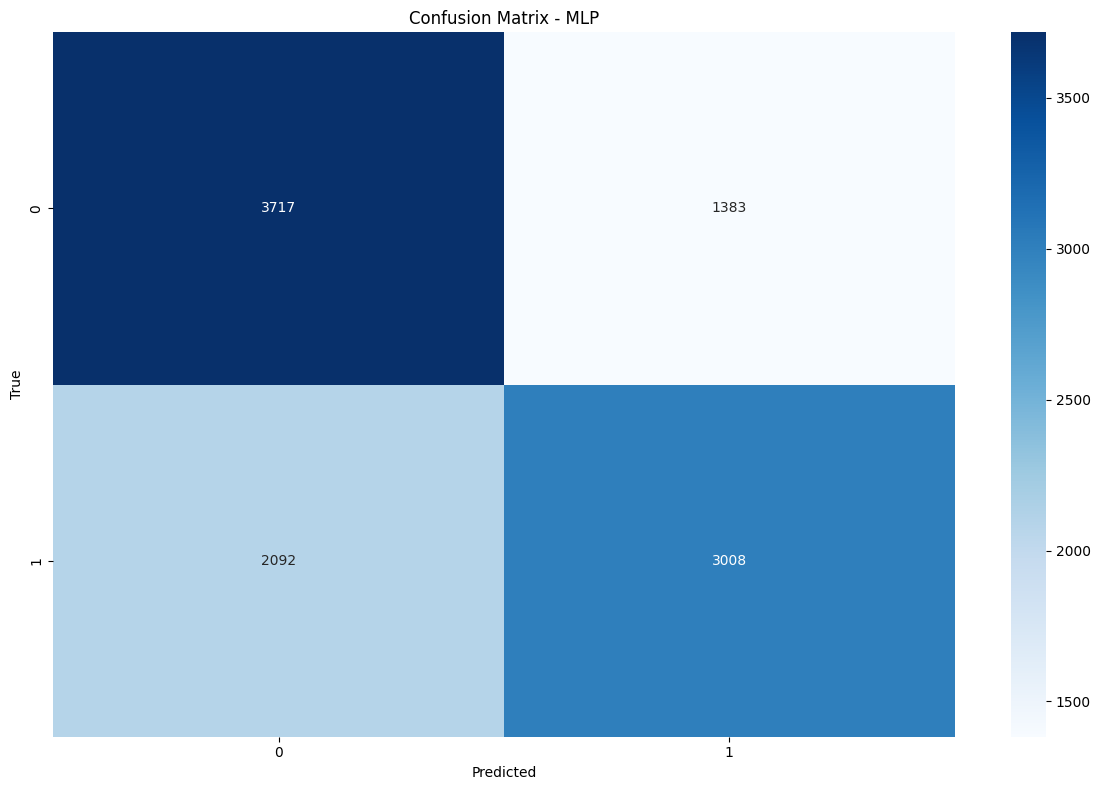

<Figure size 1000x600 with 0 Axes>

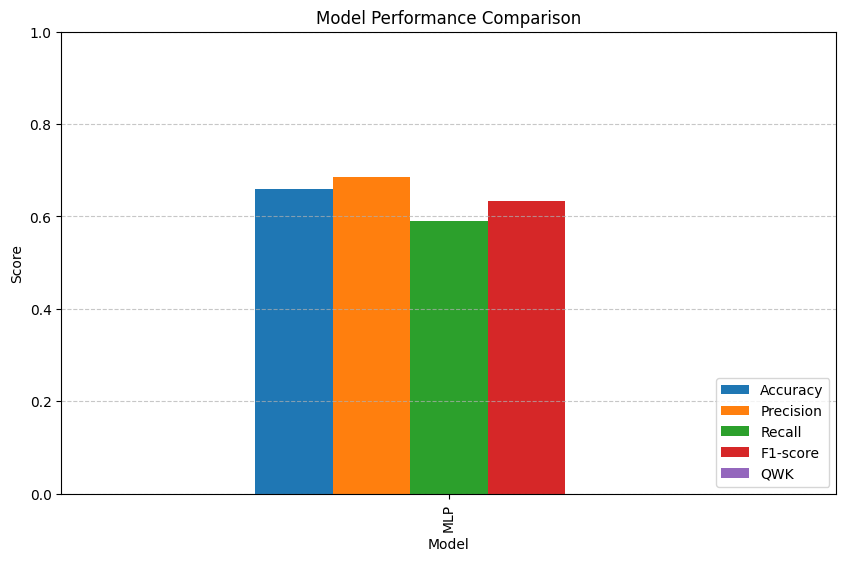

Evaluating MLP on training set...

===== MLP: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     20400
           1       0.89      0.85      0.87     20400

    accuracy                           0.87     40800
   macro avg       0.87      0.87      0.87     40800
weighted avg       0.87      0.87      0.87     40800

Evaluating MLP on validation set...

===== MLP: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      5100
           1       0.70      0.65      0.67      5100

    accuracy                           0.68     10200
   macro avg       0.69      0.68      0.68     10200
weighted avg       0.69      0.68      0.68     10200



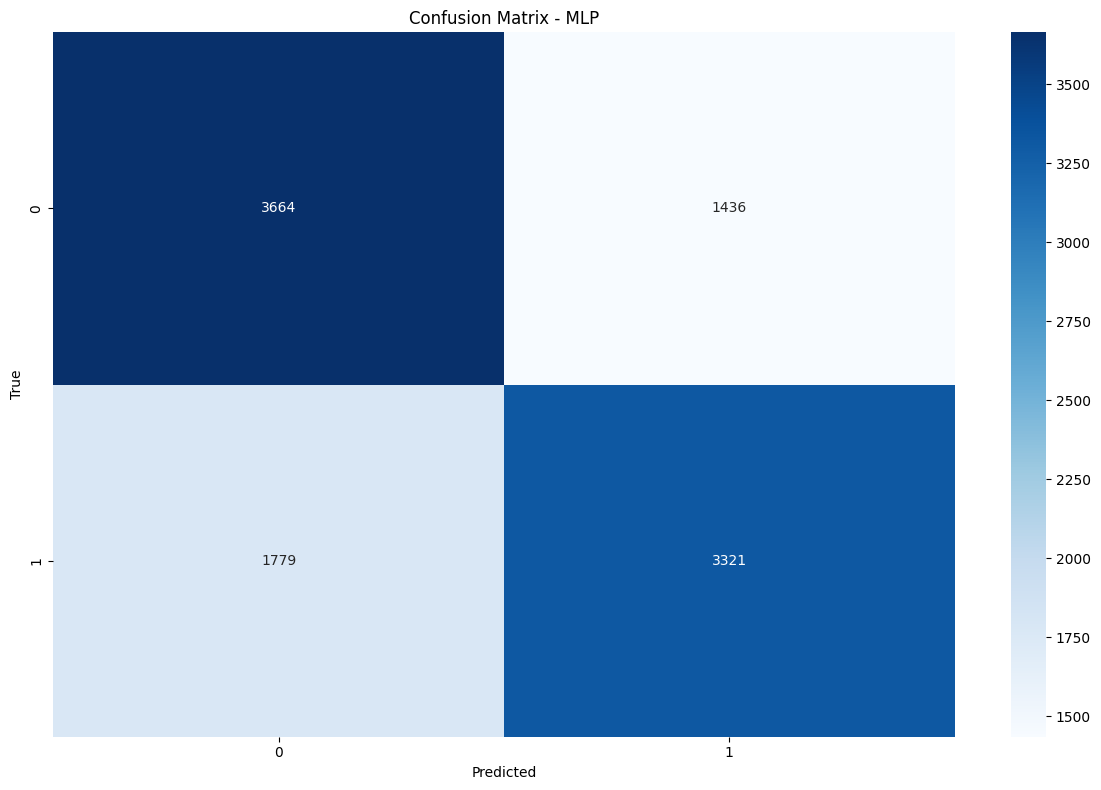

<Figure size 1000x600 with 0 Axes>

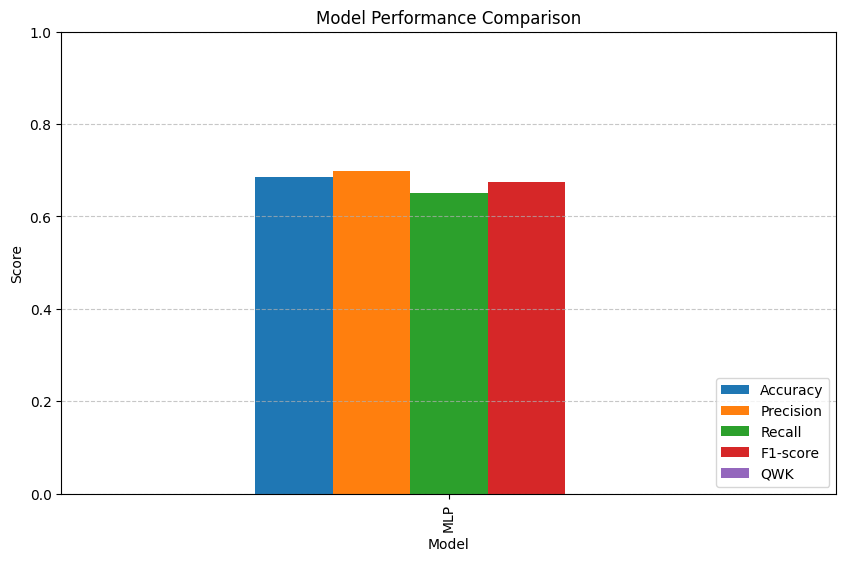

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP,0.6848,0.6981,0.6512,0.6738,NaN,NaN


In [ ]:

fit_pipeline_predict_evaluate(MLPClassifier(activation='relu', alpha=0.01, batch_size=32, hidden_layer_sizes= (128, 64, 32), learning_rate_init=0.001,  max_iter=2000,
        random_state=27,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1), "MLP", X_train=X_train, y_train=y_train["age"], X_val=X_val, y_val=y_val["age"], PCA=False, LDA=False,
                              binning=bin_age_young_old, numerical=False)

fit_pipeline_predict_evaluate(MLPClassifier(activation='relu', alpha=0.01, batch_size=32, hidden_layer_sizes= (128, 64, 32), learning_rate_init=0.001,  max_iter=2000,
        random_state=27,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1), "MLP", X_train=X_train, y_train=y_train["age_young_old_encoded"], X_val=X_val, y_val=y_val["age_young_old_encoded"], PCA=False, LDA=False,
                              binning=identity, numerical=False)

In [59]:
def optimize_rf_classifier(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=identity,
):
    """
    Grid search optimization for Random Forest classifier.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation.
    y_train, y_val : pd.DataFrame
        Must include 'age_young_old_encoded' column.
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline.
    param_grid : dict, optional
        Grid search parameters.
    binning : function, optional
        Function to bin labels (identity by default).

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    if param_grid is None:
        param_grid = {
            'rf__n_estimators': [100, 200],
            'rf__max_depth': [20, 30],
            'rf__min_samples_split': [5, 10],
            'rf__min_samples_leaf': [2, 4],
        }

    rf = RandomForestClassifier(random_state=27)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('rf', rf)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for Random Forest...")
    grid_search.fit(X_train, y_train['age_young_old_encoded'])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Detailed results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'RandomForest': prd_train}
    evaluate_val = {'RandomForest': prd_val}

    print("\nEvaluating Random Forest on training set...")
    evaluate_models(y_train['age_young_old_encoded'], evaluate_train, (12, 8), False, "Training Set", binning=binning)

    print("\nEvaluating Random Forest on validation set...")
    evaluate_models(y_val['age_young_old_encoded'], evaluate_val, (12, 8), True, "Validation Set", binning=binning)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=100; total time=  52.1s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=10, rf__n_estimators=100; total time=  52.6s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=100; total time=  53.3s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=10, rf__n_estimators=100; total time=  53.5s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=100; total time=  54.1s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time= 1.7min
[CV] END rf__max_depth=20, rf__min_samples_leaf=4, rf__min_samples_split=5, rf__n_estimators=100; total time=  46.9s
[CV] END rf__max_depth=20, rf__min_samples_leaf=2, rf__min_samples_split=10,

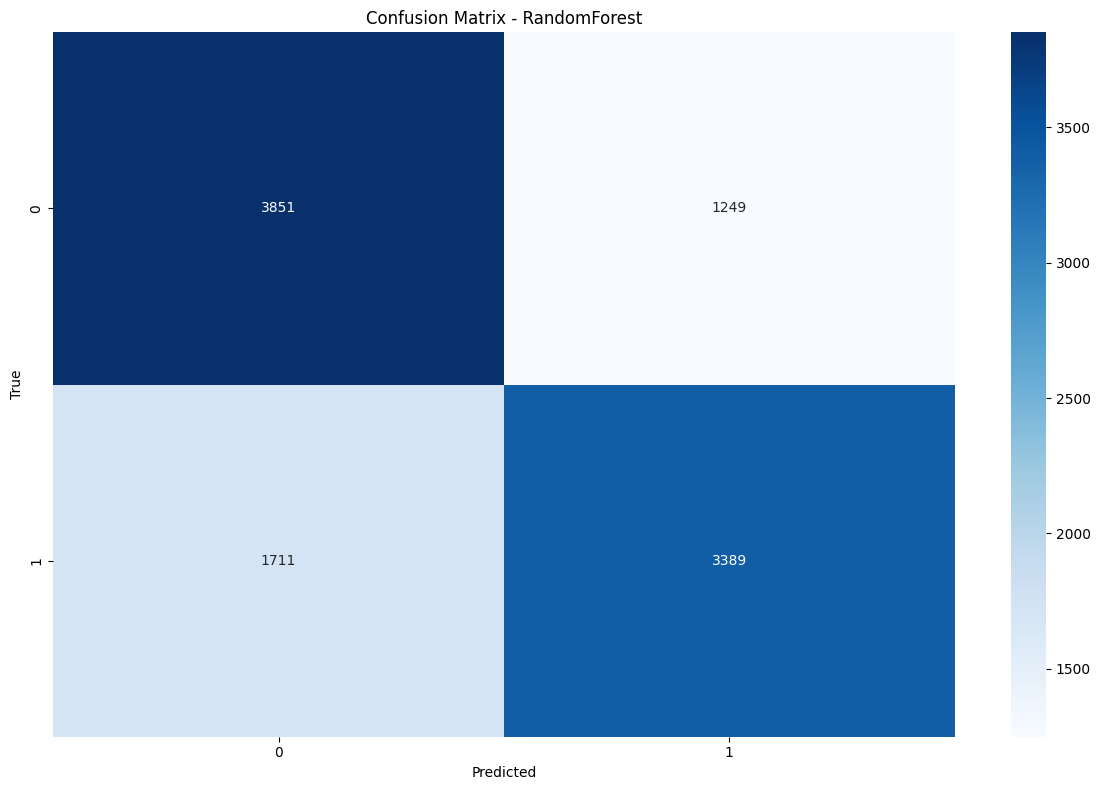

<Figure size 1000x600 with 0 Axes>

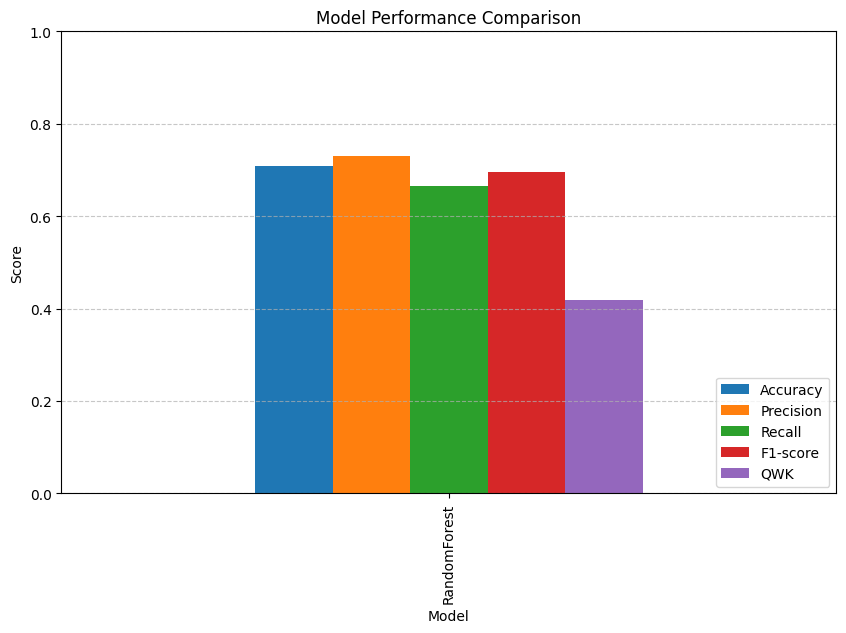

In [60]:
best_model_rf, eval_train_rf, eval_val_rf, rf_results_df = optimize_rf_classifier(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    preprocessing=preprocessing
)

In [38]:
# Compare selected metrics in one graph
def compare_selected_metrics(logistic_metrics, rand_forest_metrics, svc_metrics, kneighbors_metrics, mlp_metrics, gradient_boosting_metrics):
    # Combine all metrics into a single DataFrame
    combined_metrics = pd.concat([logistic_metrics.set_index('Model'), 
                                   rand_forest_metrics.set_index('Model'), 
                                   svc_metrics.set_index('Model'), 
                                   kneighbors_metrics.set_index('Model'), 
                                   mlp_metrics.set_index('Model'), 
                                   gradient_boosting_metrics.set_index('Model')], axis=0)
    
    # Drop models that end with "pca" or "lda"
    combined_metrics = combined_metrics[~combined_metrics.index.str.endswith(('pca', 'lda'))]
    
    # Select only the desired metrics
    selected_metrics = combined_metrics[['Accuracy', 'Precision', 'Recall', 'F1-score', 'QWK']]
    
    # Plot the selected metrics
    plt.figure(figsize=(12, 8))
    selected_metrics.plot(kind='bar', figsize=(12, 8))
    plt.title('Comparison of Model Performance Metrics (Excluding MAE)')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

compare_selected_metrics(logistic_metrics, rand_forest_metrics, svc_metrics, kneighbors_metrics, mlp_metrics, gradient_boosting_metrics)

NameError: name 'logistic_metrics' is not defined

## Two Stage Models

In [35]:
def evaluate_layered_model(predicted_age_val, y_val_age, y_val_gender, age_model_name, label=None, numerical=True, binning=identity):
    for gender in ['female_feminine','male_masculine',  'total']:
        if gender == 'total':
            gender_mask = y_val_gender.notnull()
        else:
            gender_mask = y_val_gender == gender

        y_true_gender = apply_binning(y_val_age[gender_mask],binning)
        y_pred_gender = apply_binning([predicted_age_val[i] for i in range(len(predicted_age_val)) if gender_mask.iloc[i]], binning)

        print(f"\n{age_model_name} - Prediction Report on Gender {gender}: {label}")
        print(classification_report(y_true_gender, y_pred_gender))

        if numerical:
            # Calculate QWK and MAE
            qwk = cohen_kappa_score(y_true_gender, y_pred_gender, weights='quadratic')
            mae = mean_absolute_error(y_true_gender, y_pred_gender)
            print(f"QWK (Quadratic Weighted Kappa): {qwk:.4f}")
            print(f"MAE (Mean Absolute Error): {mae:.4f}")

     
        # Plot confusion matrix
        cm_age_gender = confusion_matrix(y_true_gender, y_pred_gender)
        sns.heatmap(cm_age_gender, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix {age_model_name} - Prediction on Gender {gender}: {label}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        

In [36]:
def fit_predict_gender_age_pipeline(gender_model_class, age_model_class_male, age_model_class_female, gender_model_name="GenderModel", age_model_name="AgeModel"):
    """
    Function to fit a gender classification pipeline and then train separate age prediction models by gender.
    Evaluates and visualizes the performance at each stage.
    """
    # Clone models
    gender_model = clone(gender_model_class)
    gender_model_pca = clone(gender_model_class)
    gender_model_lda = clone(gender_model_class)

    # Build gender prediction pipelines
    pipe_gender = make_pipeline(preprocessing, gender_model)
    pipe_gender_pca = make_pipeline(preprocessing_pca, gender_model_pca)
    pipe_gender_lda = make_pipeline(preprocessing_lda, gender_model_lda)

    # Fit gender classifiers
    pipe_gender.fit(X_train, y_train['gender'])
    pipe_gender_pca.fit(X_train, y_train['gender'])
    pipe_gender_lda.fit(X_train, y_train['gender'])

    # Evaluate gender predictions
    for name, pipe in zip(['Default', 'PCA', 'LDA'], [pipe_gender, pipe_gender_pca, pipe_gender_lda]):
        for split_name, X, y in [('Training', X_train, y_train), ('Validation', X_val, y_val)]:
            preds = pipe.predict(X)
            print(f"\n{name} Gender Model - {split_name} Set:")
            print(classification_report(y['gender'], preds))

            if split_name == 'Validation':
                cm = confusion_matrix(y['gender'], preds)
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                plt.title(f'Confusion Matrix - Gender ({name}, {split_name} Set)')
                plt.xlabel('Predicted')
                plt.ylabel('True')
                plt.show()

    # Use the default pipeline for gender predictions
    predicted_gender_val = pipe_gender.predict(X_val)

    # Train separate age models on true gender-labeled training data
    X_train_male = X_train[y_train['gender'] == 'male_masculine']
    y_train_male = y_train.loc[y_train['gender'] == 'male_masculine', 'age']
    X_train_female = X_train[y_train['gender'] == 'female_feminine']
    y_train_female = y_train.loc[y_train['gender'] == 'female_feminine', 'age']

    pipe_age_male = make_pipeline(preprocessing, clone(age_model_class_male))
    pipe_age_female = make_pipeline(preprocessing, clone(age_model_class_female))

    pipe_age_male.fit(X_train_male, y_train_male)
    pipe_age_female.fit(X_train_female, y_train_female)

    # Predict age on validation set using predicted gender
    predicted_age_val = []
    for i, gender in enumerate(predicted_gender_val):
        x_instance = X_val.iloc[[i]]  # preserve column names
        if gender == 'male_masculine':
            predicted_age_val.append(pipe_age_male.predict(x_instance)[0])
        else:
            predicted_age_val.append(pipe_age_female.predict(x_instance)[0])
    
    evaluate_layered_model(predicted_age_val, y_val, age_model_name, "Validation Set")


In [37]:
def fit_predict_gender_age_pipeline_with_joint_comparison(
    gender_model_class,
    age_model_class_male,
    age_model_class_female,
    gender_model_name="GenderModel",
    age_model_name="AgeModel",
    X_train=X_train, y_train_age=y_train["age"], y_train_gender=y_train["gender"], X_val=X_val, y_val_age=y_val["age"], y_val_gender=y_val["gender"], numerical=True, binning=identity):

    # ====== Build models ======
    gender_model = clone(gender_model_class)
    
    # ====== Fit gender model ======
    pipe_gender = make_pipeline(preprocessing, gender_model)
    print(f"\nFitting {gender_model_name} on training set")
    pipe_gender.fit(X_train, y_train_gender)

    print(f"\nPredicting {gender_model_name} on training set")
    predicted_gender_train=pipe_gender.predict(X_train)
    print(f"\nPredicting {gender_model_name} on validation set")
    predicted_gender_val = pipe_gender.predict(X_val)
    for split_name, preds, y in [('Training', predicted_gender_train, y_train_gender), ('Validation', predicted_gender_val, y_val_gender)]:
            print(f"\n{gender_model_name} Gender Model - {split_name} Set:")
            print(classification_report(y, preds))

            if split_name == 'Validation':
                cm = confusion_matrix(y, preds)
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                plt.title(f'Confusion Matrix - Gender ({gender_model_name}, {split_name} Set)')
                plt.xlabel('Predicted')
                plt.ylabel('True')
                plt.show()

    # ====== Train age models ======
    # Split train set by gender
    X_train_male = X_train[y_train_gender == 'male_masculine']
    y_train_male = y_train_age[y_train_gender == 'male_masculine']
    X_train_female = X_train[y_train_gender== 'female_feminine']
    y_train_female = y_train_age[y_train_gender == 'female_feminine']

    # Fit individual age models
    
    pipe_age_male = make_pipeline(preprocessing, clone(age_model_class_male))
    pipe_age_female = make_pipeline(preprocessing, clone(age_model_class_female))

    print(f"\nFitting {age_model_name} on Gender Female")
    pipe_age_female.fit(X_train_female, y_train_female)

    print(f"\nFitting {age_model_name} on Gender Male")
    pipe_age_male.fit(X_train_male, y_train_male)

    
    # ====== Age predictions ======
    predicted_age_true_gender = []
    predicted_age_pred_gender = []
    for i in tqdm(range(len(X_val)), desc=f"Predicting {age_model_name} on validation set"):
        x_instance = X_val.iloc[[i]]

        # TRUE gender routing
        true_gender = y_val_gender.iloc[i]
        model_true = pipe_age_male if true_gender == 'male_masculine' else pipe_age_female
        predicted_age_true_gender.append(model_true.predict(x_instance)[0])

        # PREDICTED gender routing
        pred_gender = predicted_gender_val[i]
        model_pred = pipe_age_male if pred_gender == 'male_masculine' else pipe_age_female
        predicted_age_pred_gender.append(model_pred.predict(x_instance)[0])

    # ====== Evaluation ======

    evaluate_layered_model(predicted_age_true_gender, y_val_age,y_val_gender, age_model_name, "Routed by True Gender", numerical=numerical, binning=binning)
    evaluate_layered_model(predicted_age_pred_gender, y_val_age,y_val_gender, age_model_name, "Routed by Predicted Gender", numerical=numerical, binning=binning)

    # ====== Routing error cost ======
    acc_true = accuracy_score(apply_binning(y_val_age,binning), apply_binning(predicted_age_true_gender,binning))
    acc_pred = accuracy_score(apply_binning(y_val_age,binning), apply_binning(predicted_age_pred_gender,binning))
    routing_cost = acc_true - acc_pred
    print(f"\n Routing Error Cost (Accuracy Loss from using predicted gender): {routing_cost:.4f}")

    return {
        "acc_true_gender": acc_true,
        "acc_pred_gender": acc_pred,
        "routing_error_cost": routing_cost
    }


### Grid Search to find best params for all models: classifying age given given TRUE GENDER

In [38]:
# Grid search optimize RF:

def optimize_random_forest_for_gender(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=identity,
    numerical=True
):
    """
    Grid search optimization for Random Forest classifier, stratified by age and gender.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation
    y_train, y_val : pd.DataFrame
        Must include 'age' and 'gender' columns
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline
    param_grid : dict, optional
        Grid search parameters
    binning : function, optional
        Function to bin ages (identity if no binning)
    numerical : bool
        Whether target is numerical (QWK and MAE computed)

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """
    
    if param_grid is None:
        param_grid = {
            'rf__n_estimators': [200, 300, 400],
            'rf__max_depth': [20, 40],
            'rf__min_samples_split': [5, 10],
            'rf__min_samples_leaf': [2, 3],
            'rf__max_features': ['sqrt']
        }

    rf = RandomForestClassifier(random_state=27, n_jobs=-1)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('rf', rf)
    ])


    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for Random Forest...")
    grid_search.fit(X_train, y_train["age_young_old"])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Detailed results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'RandomForest': prd_train}
    evaluate_val = {'RandomForest': prd_val}

    print("\nEvaluating Random Forest on training set...")
    evaluate_models(y_train["age_young_old"], evaluate_train, (12, 8), False, "Training Set", binning=binning, numerical=numerical)

    print("\nEvaluating Random Forest on validation set...")
    evaluate_models(y_val["age_young_old"], evaluate_val, (12, 8), True, "Validation Set", binning=binning, numerical=numerical)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  45.2s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  45.4s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  45.7s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time= 1.1min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time= 1.1min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time= 1.1min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min

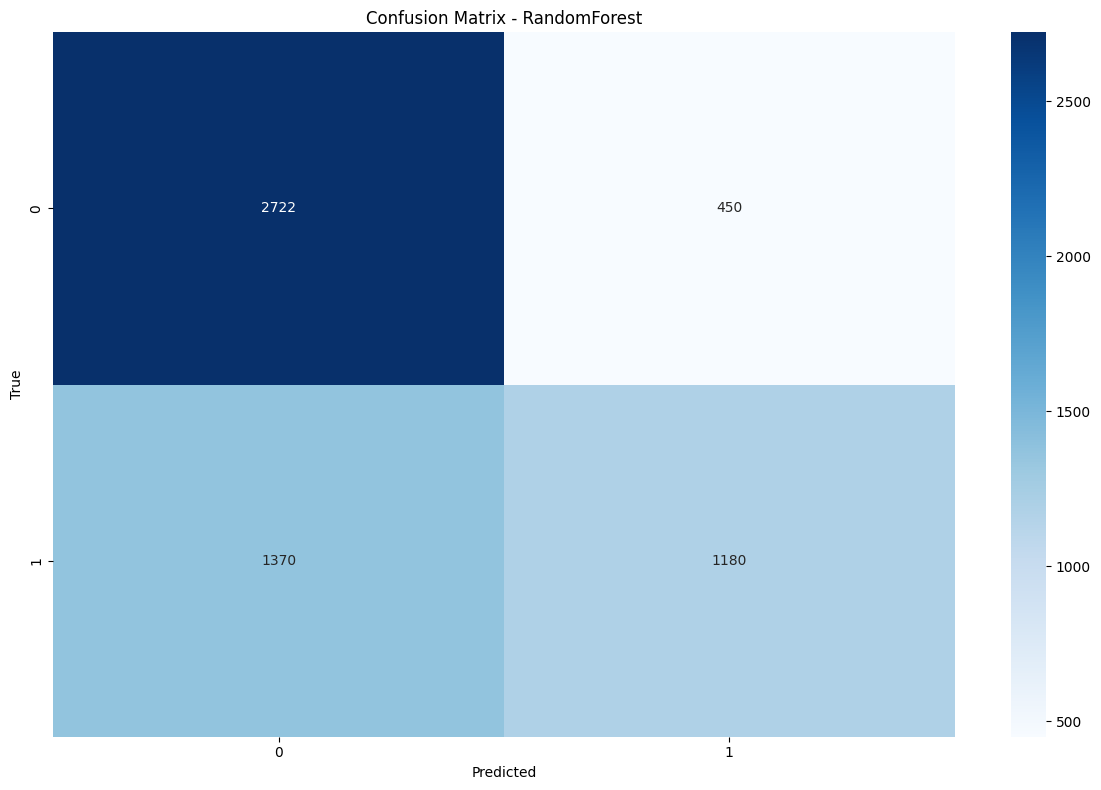

<Figure size 1000x600 with 0 Axes>

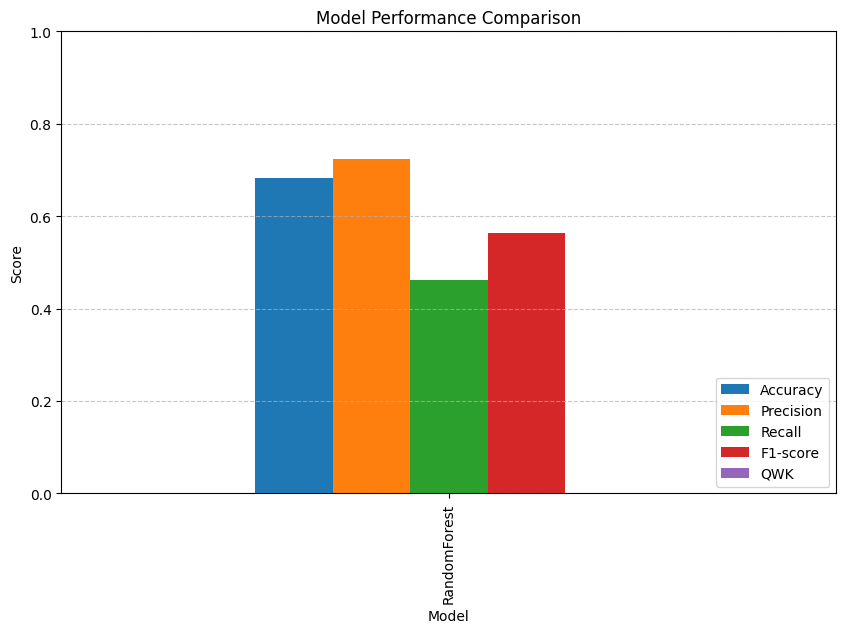

In [54]:
best_model_male, eval_train_male, eval_val_male, results_male = optimize_random_forest_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)


Starting grid search for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  32.2s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  32.6s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=200; total time=  32.6s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time=  48.0s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time=  48.2s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=2, rf__min_samples_split=5, rf__n_estimators=300; total time=  48.5s
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min

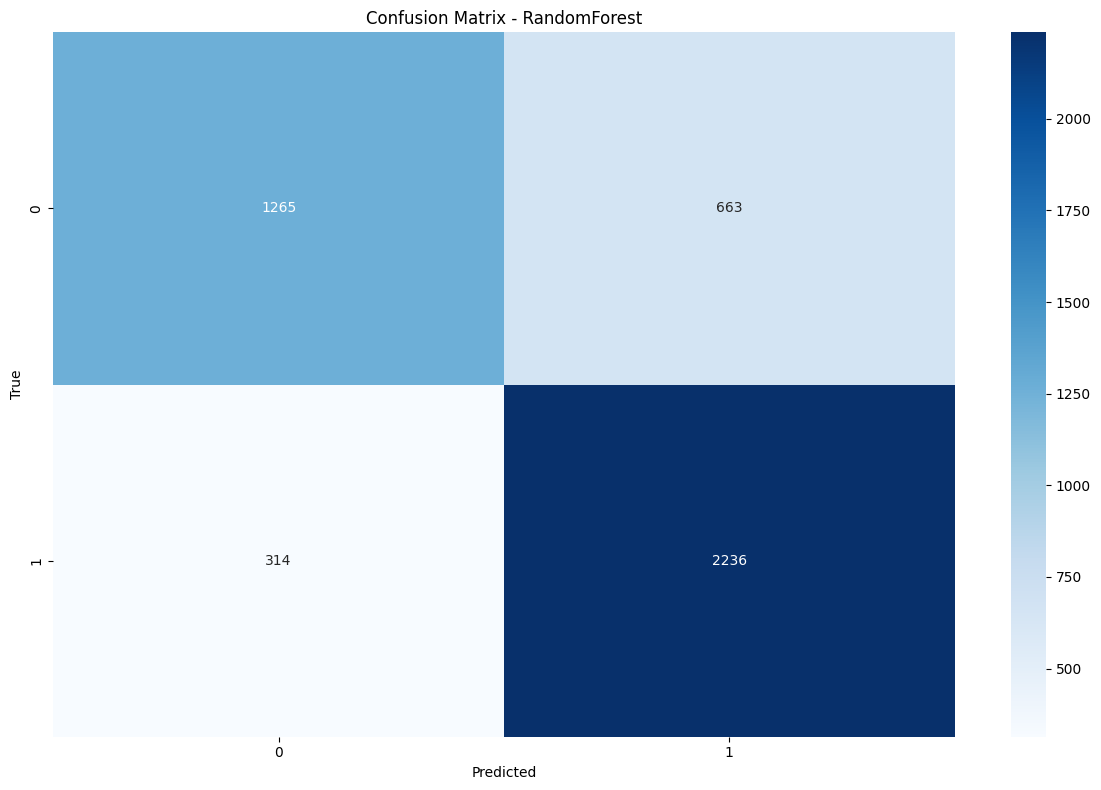

<Figure size 1000x600 with 0 Axes>

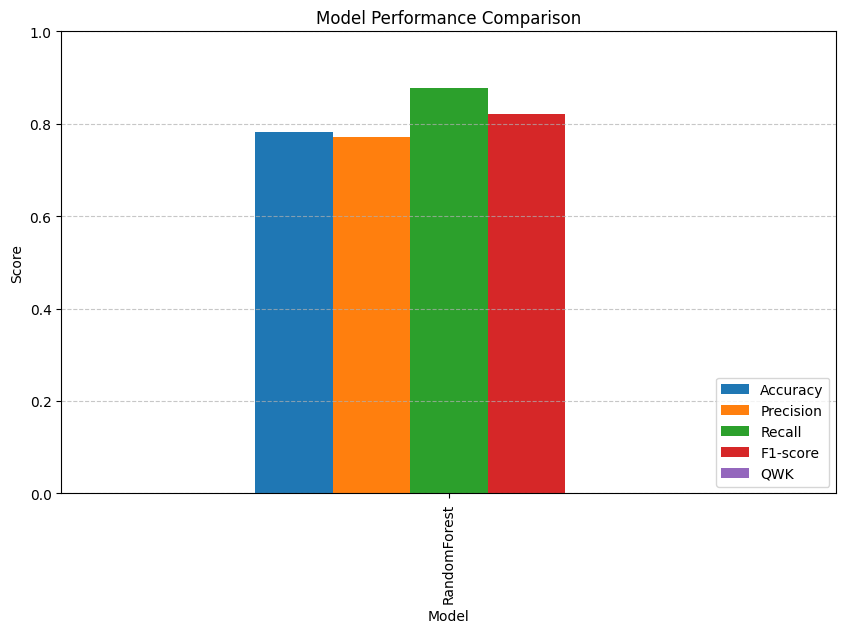

In [49]:
best_model_female, eval_train_female, eval_val_female, results_female = optimize_random_forest_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=3, rf__n_estimators=400; total time= 1.6min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=3, rf__n_estimators=400; total time= 1.6min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=400; total time= 1.6min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=400; total time= 1.7min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=400; total time= 1.7min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=500; total time= 2.1min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=500; total time= 2.1min
[CV] END rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__n_estimators=50

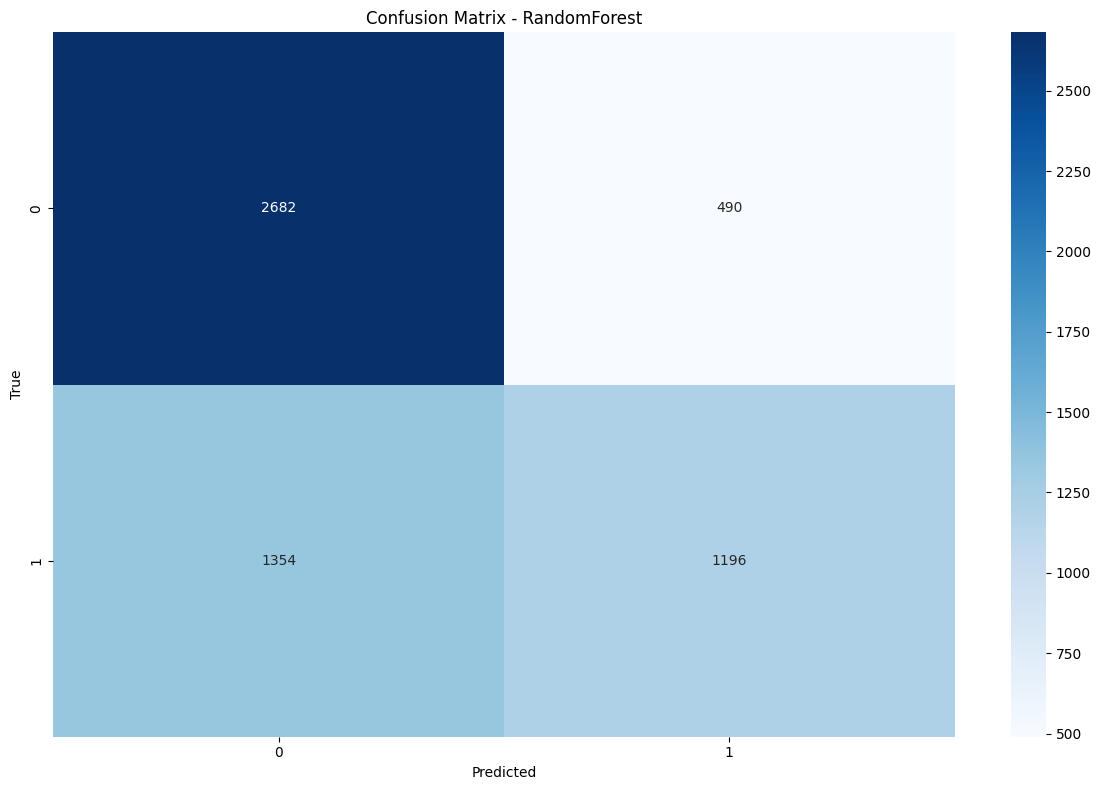

<Figure size 1000x600 with 0 Axes>

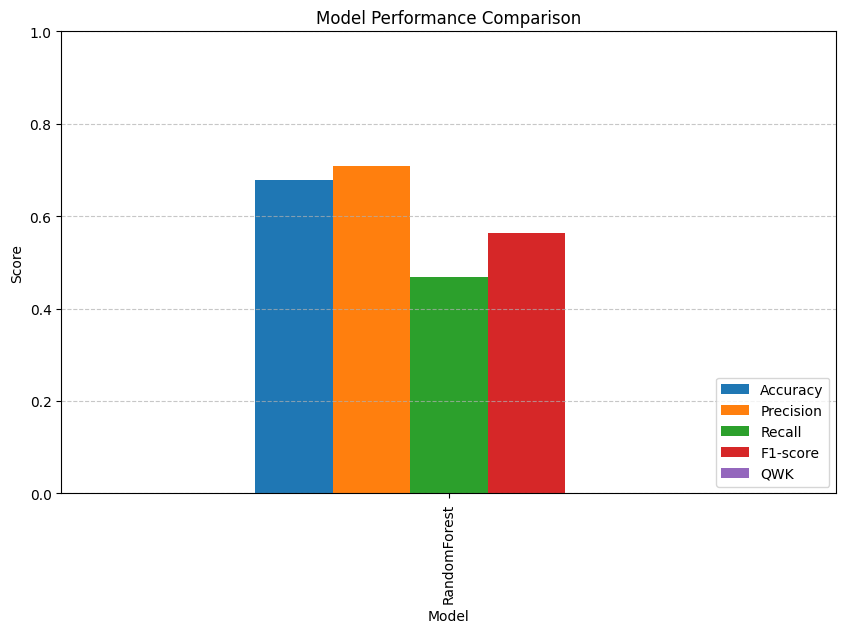

In [71]:
# new higher level param grid:

param_grid_2 = {
    'rf__n_estimators': [400,500],
    'rf__max_depth': [20, None],
    'rf__min_samples_leaf': [1, 3],
    'rf__max_features': ['sqrt']
}

best_model_male_rf, eval_train_male_rf, eval_val_male_rf, results_male_rf = optimize_random_forest_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False,
    param_grid=param_grid_2
)

In [72]:
# no improvement on "higher level" params

Random Forest age classification given true gender:

Male
Best Parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 400}
Accuracy: 68%

Female
Best Parameters: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 400}
Accuraccy: 78%



In [ ]:
# optimiser for gradient boosting

def optimize_gradient_boosting_for_gender(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=identity,
    numerical=True
):
    """
    Grid search optimization for Gradient Boosting classifier.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation
    y_train, y_val : pd.DataFrame
        Must include 'age' and 'gender' columns
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline
    param_grid : dict, optional
        Grid search parameters
    binning : function, optional
        Function to bin ages (identity if no binning)
    numerical : bool
        Whether target is numerical (QWK and MAE computed)

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    if param_grid is None:
        param_grid = {
    'gb__learning_rate': [0.05],                
    'gb__max_iter': [100, 300],
    'gb__max_leaf_nodes': [31],
    'gb__min_samples_leaf': [20, 100],
    'gb__max_bins': [255],
    'gb__l2_regularization': [0.0, 10.0],
    'gb__max_depth': [30],
    }

    gb = HistGradientBoostingClassifier(random_state=27)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('gb', gb)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',  # You can replace with qwk_scorer if needed
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for Gradient Boosting...")
    grid_search.fit(X_train, y_train["age_young_old"])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Detailed results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'GradientBoosting': prd_train}
    evaluate_val = {'GradientBoosting': prd_val}

    print("\nEvaluating Gradient Boosting on training set...")
    evaluate_models(y_train["age_young_old"], evaluate_train, (12, 8), False, "Training Set", binning=binning, numerical=numerical)

    print("\nEvaluating Gradient Boosting on validation set...")
    evaluate_models(y_val["age_young_old"], evaluate_val, (12, 8), True, "Validation Set", binning=binning, numerical=numerical)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for Gradient Boosting...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.1s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   3.6s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   4.2s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   4.2s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; t

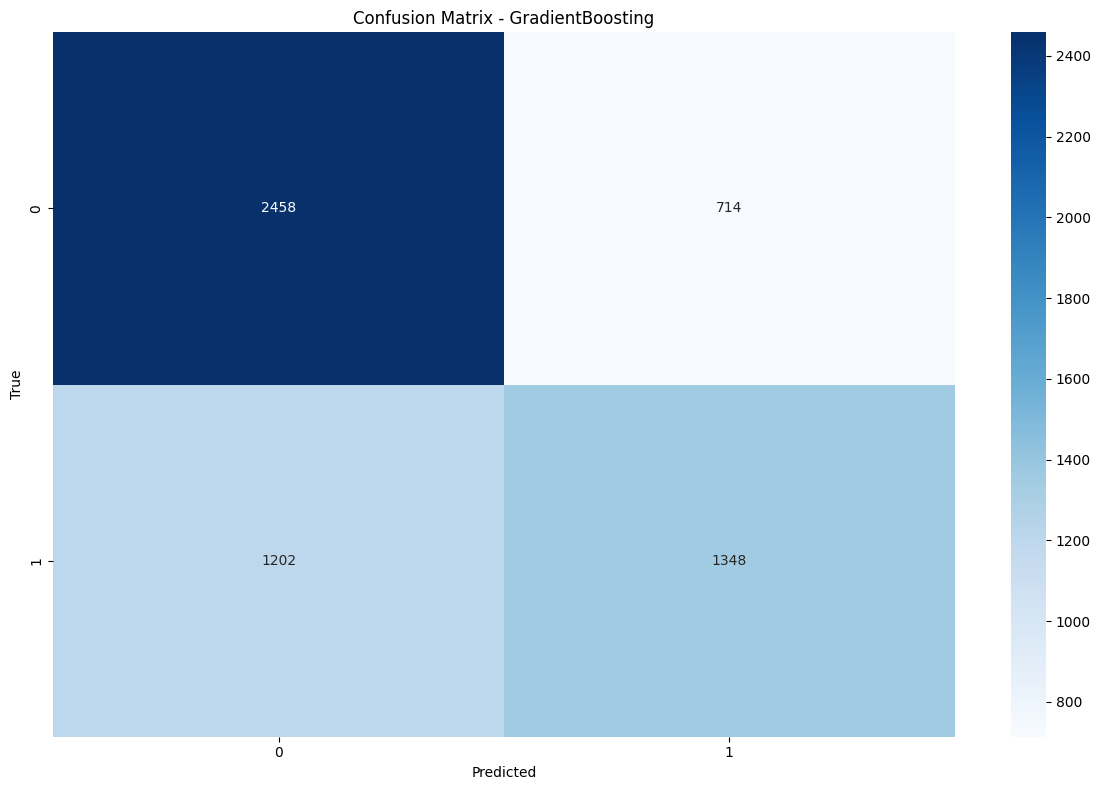

<Figure size 1000x600 with 0 Axes>

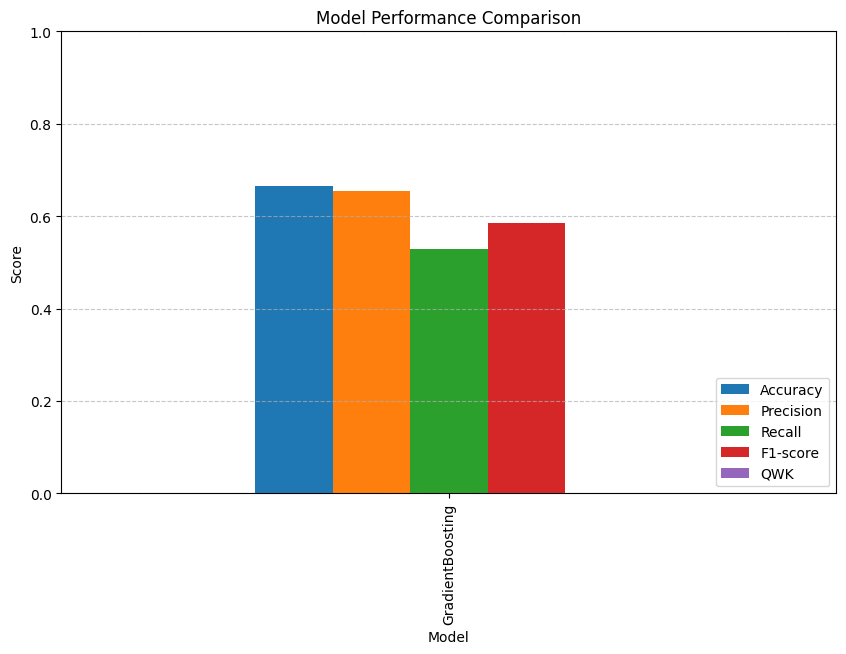

In [51]:
best_gb_male, eval_train_gb_male, eval_val_gb_male, gb_results_male = optimize_gradient_boosting_for_gender(
    X_train_male, y_train_male,
    X_val_male, y_val_male,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for Gradient Boosting...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.8s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; t

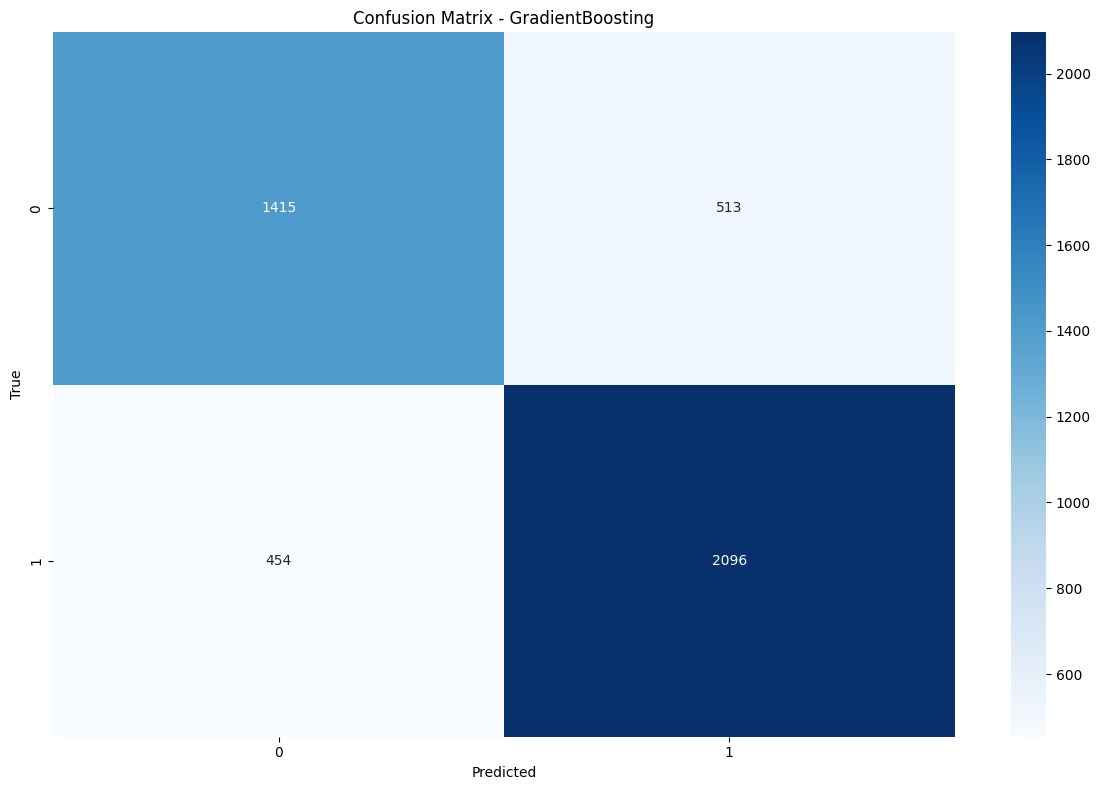

<Figure size 1000x600 with 0 Axes>

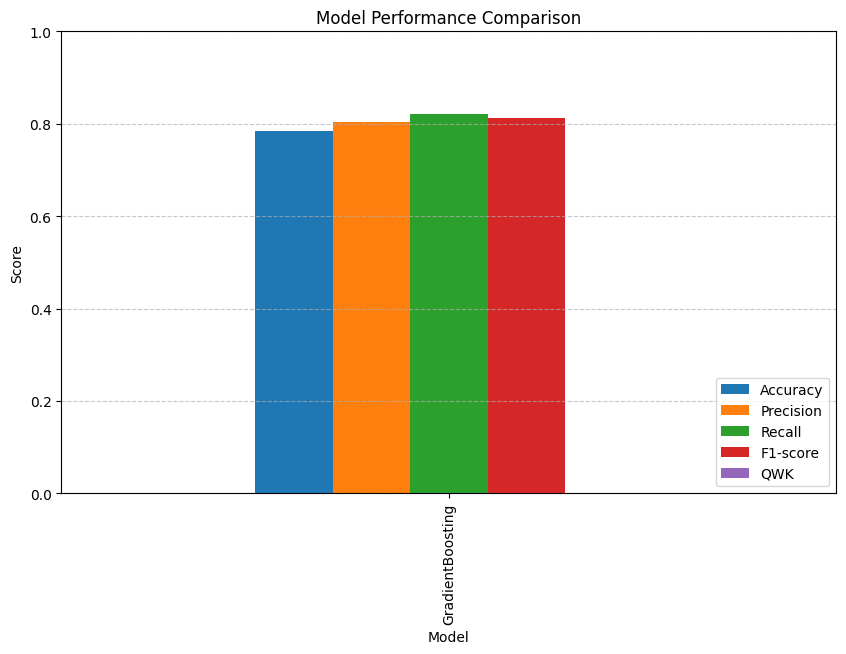

In [52]:
best_gb_female, eval_train_gb_female, eval_val_gb_female, gb_results_female = optimize_gradient_boosting_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for Gradient Boosting...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   4.6s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   4.6s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.6s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   4.7s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.8s
[CV] END gb__l2_regular

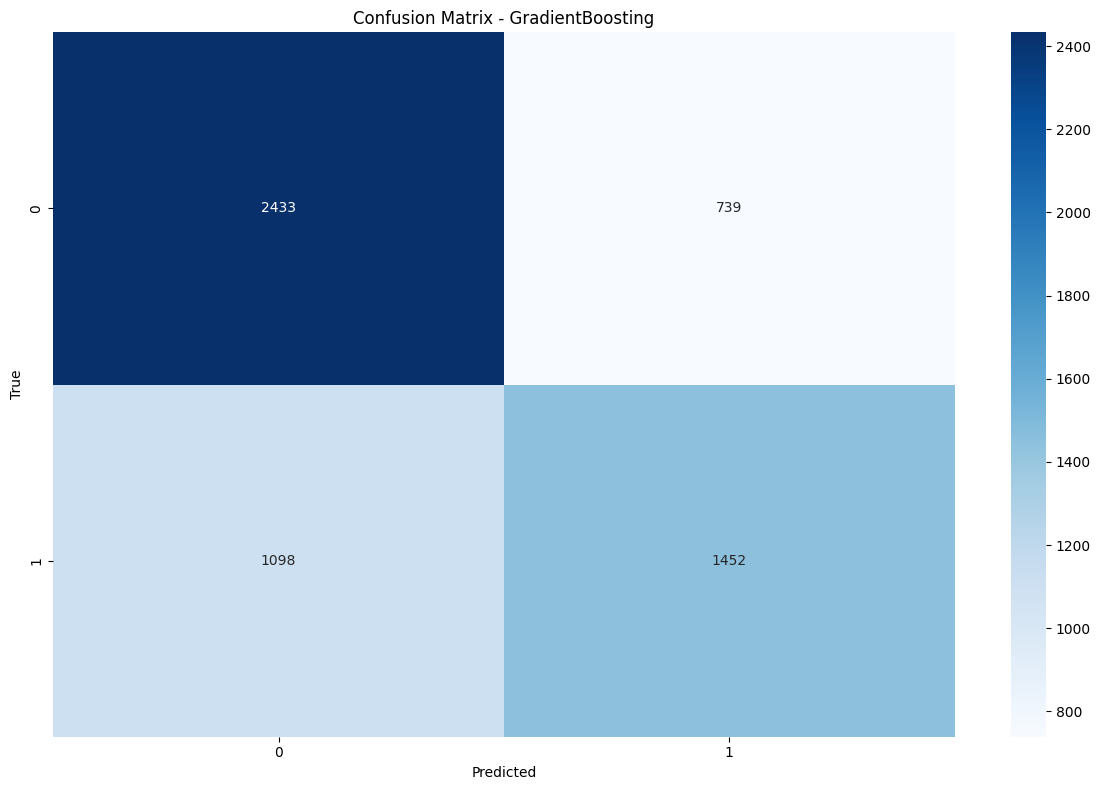

<Figure size 1000x600 with 0 Axes>

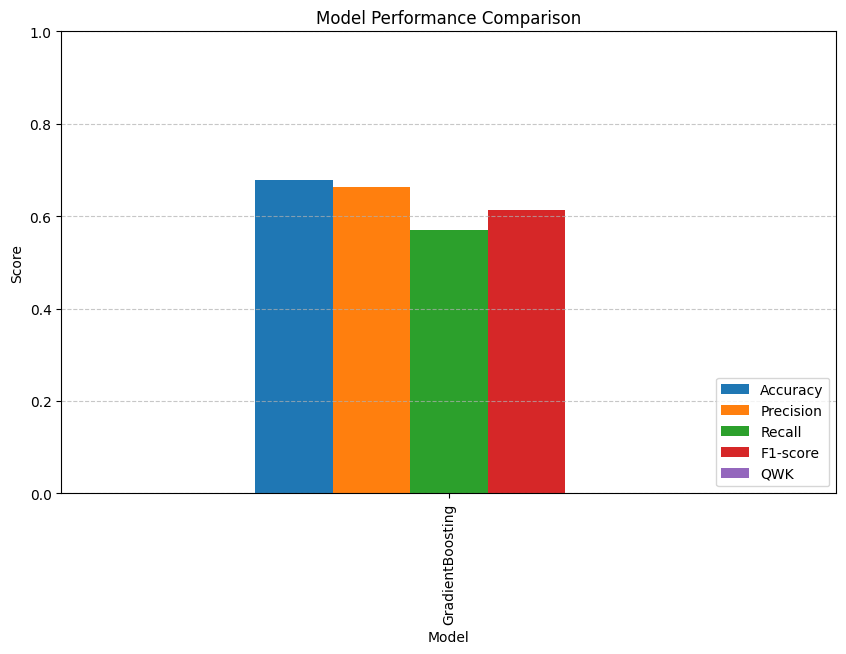

In [77]:
param_grid_gb_2 = {
    'gb__learning_rate': [0.05, 0.1],               # Higher learning rate range
    'gb__max_iter': [100, 300],                     # Total boosting rounds
    'gb__max_leaf_nodes': [31, 63],                 # Tree complexity control
    'gb__min_samples_leaf': [20, 50],               # Regularization via sample count
    'gb__l2_regularization': [0.1, 10.0],           # Broader L2 penalty
}
best_gb_male, eval_train_gb_male, eval_val_gb_male, gb_results_male = optimize_gradient_boosting_for_gender(
    X_train_male, y_train_male,
    X_val_male, y_val_male,
    preprocessing=preprocessing,
    param_grid= param_grid_gb_2,
    binning=identity,
    numerical=False
)

Starting grid search for Gradient Boosting...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.8s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.9s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   3.9s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regularization=0.1, gb__learning_rate=0.05, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   4.0s
[CV] END gb__l2_regular

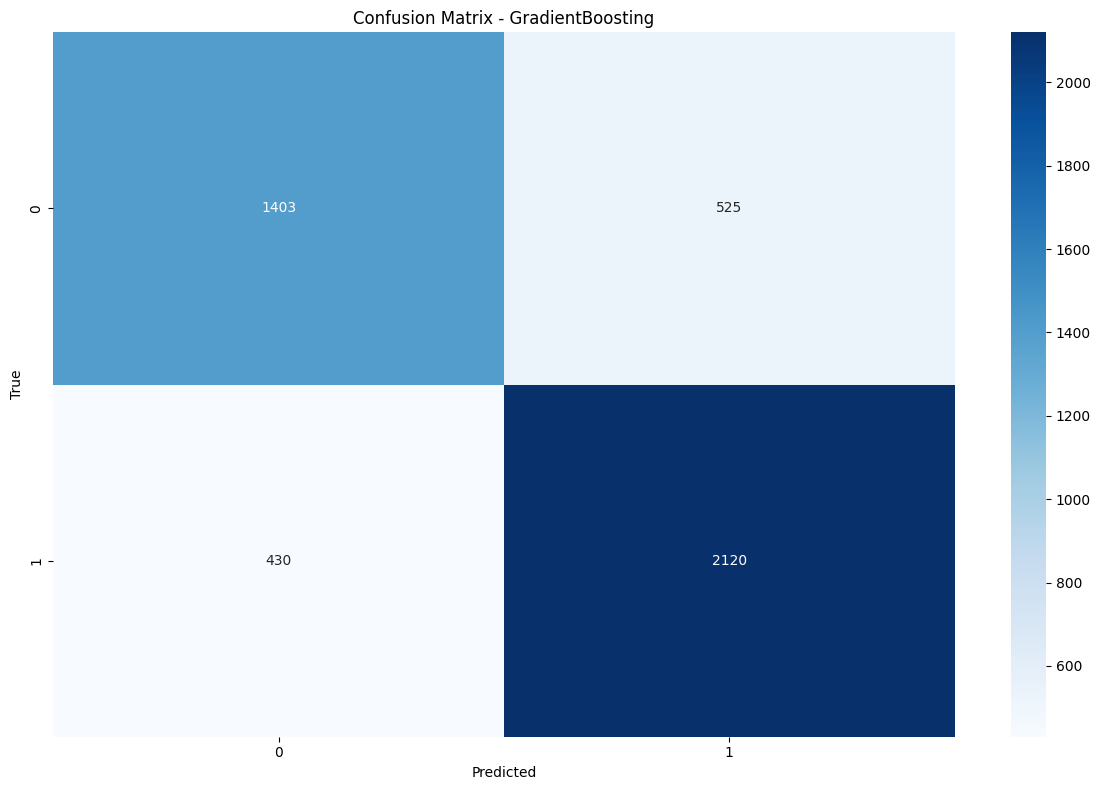

<Figure size 1000x600 with 0 Axes>

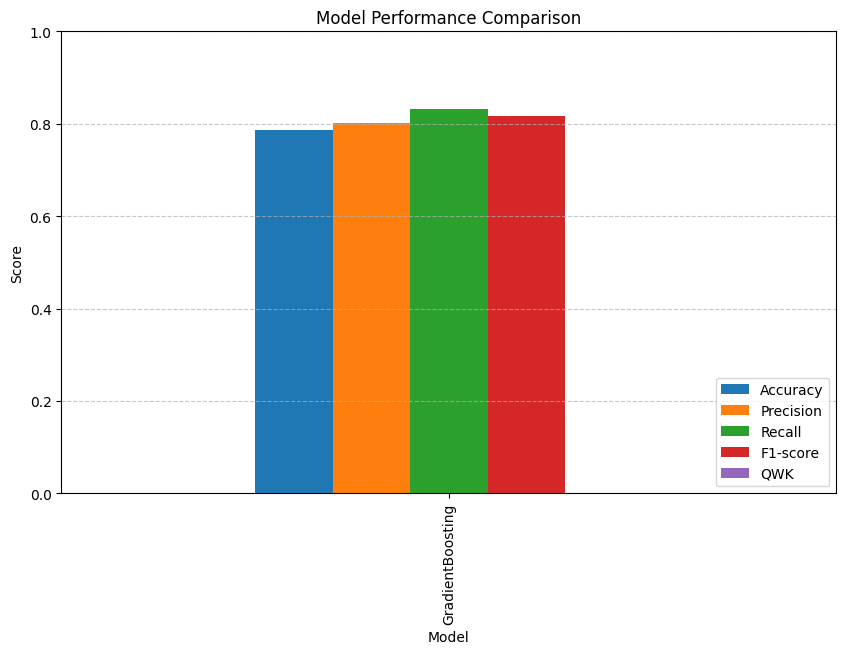

In [79]:
best_gb_female, eval_train_gb_female, eval_val_gb_female, gb_results_female = optimize_gradient_boosting_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    param_grid= param_grid_gb_2,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Gradient Boosting age classification given true gender:

Male
Best Parameters: {'gb__l2_regularization': 0.0, 'gb__learning_rate': 0.05, 'gb__max_bins': 255, 'gb__max_depth': None, 'gb__max_iter': 200, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 50}
Accuracy: 67%

Female
Best Parameters: {'gb__l2_regularization': 0.0, 'gb__learning_rate': 0.1, 'gb__max_bins': 255, 'gb__max_depth': None, 'gb__max_iter': 200, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 20}
Accuraccy: 78%

_________________________________
Using a new broader grid:

Male
Best Parameters: {'gb__l2_regularization': 10.0, 'gb__learning_rate': 0.1, 'gb__max_iter': 300, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 50}           
Accuracy: 68%

Female
Best Parameters: {'gb__l2_regularization': 10.0, 'gb__learning_rate': 0.05, 'gb__max_iter': 300, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 50}          
Accuracy: 79%



In cocnlusion - use new parameters

In [67]:
# HIST gradient Boosting!!!

def optimize_hgb_for_gender(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=identity,
    numerical=False  # Force numerical to False for this use case
):
    """
    Grid search optimization for HistGradientBoostingClassifier, stratified by age and gender.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation
    y_train, y_val : pd.DataFrame
        Must include 'age_young_old_encoded' column
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline
    param_grid : dict, optional
        Grid search parameters
    binning : function, optional
        Function to bin ages (identity if no binning)
    numerical : bool
        Whether target is numerical (set to False)

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    if param_grid is None:
        param_grid = {
            'gb__learning_rate': [0.1, 0.05],
            'gb__max_iter': [100, 200],
            'gb__max_leaf_nodes': [31, 63],
            'gb__min_samples_leaf': [20, 50],
            'gb__max_bins': [255],
            'gb__l2_regularization': [0.0, 1.0],
            'gb__max_depth': [None, 10],
        }

    gb = HistGradientBoostingClassifier(
        random_state=27,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        scoring='accuracy'
    )

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('gb', gb)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for HistGradientBoostingClassifier...")
    grid_search.fit(X_train, y_train["age_young_old_encoded"])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'HGB': prd_train}
    evaluate_val = {'HGB': prd_val}

    print("\nEvaluating HGB on training set...")
    evaluate_models(y_train["age_young_old_encoded"], evaluate_train, (12, 8), False, "Training Set", binning=binning, numerical=numerical)

    print("\nEvaluating HGB on validation set...")
    evaluate_models(y_val["age_young_old_encoded"], evaluate_val, (12, 8), True, "Validation Set", binning=binning, numerical=numerical)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for HistGradientBoostingClassifier...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   1.8s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   2.0s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=63, gb__min_samples_leaf=20; total time=   2.0s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   2.4s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_sampl

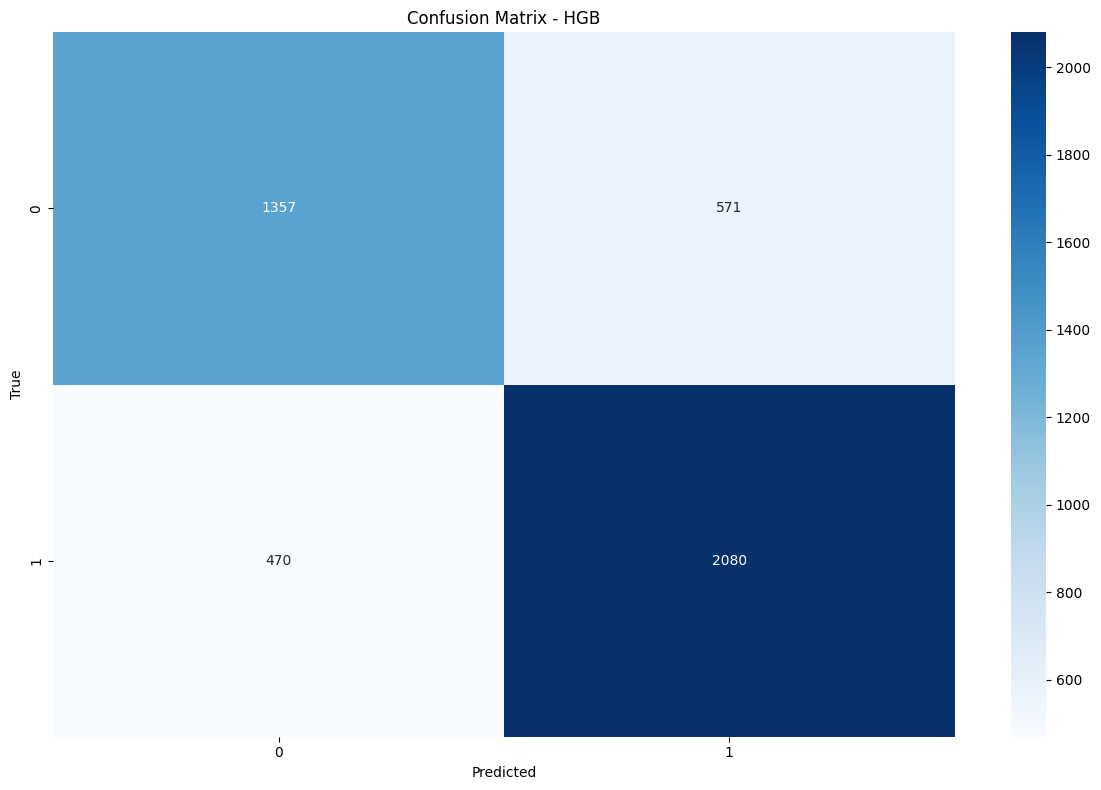

<Figure size 1000x600 with 0 Axes>

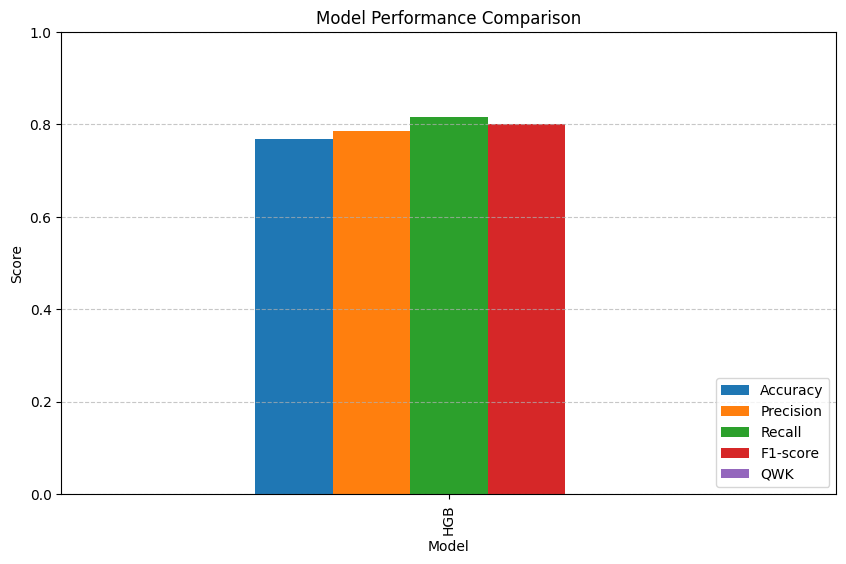

In [68]:
best_model_female_hgb, eval_train_female_hgb, eval_val_female_hgb, results_female_hgb = optimize_hgb_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for HistGradientBoostingClassifier...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   1.4s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   1.5s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=20; total time=   1.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=31, gb__min_samples_leaf=50; total time=   2.3s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.1, gb__max_bins=255, gb__max_depth=None, gb__max_iter=100, gb__max_leaf_nodes=63, gb__min_sampl

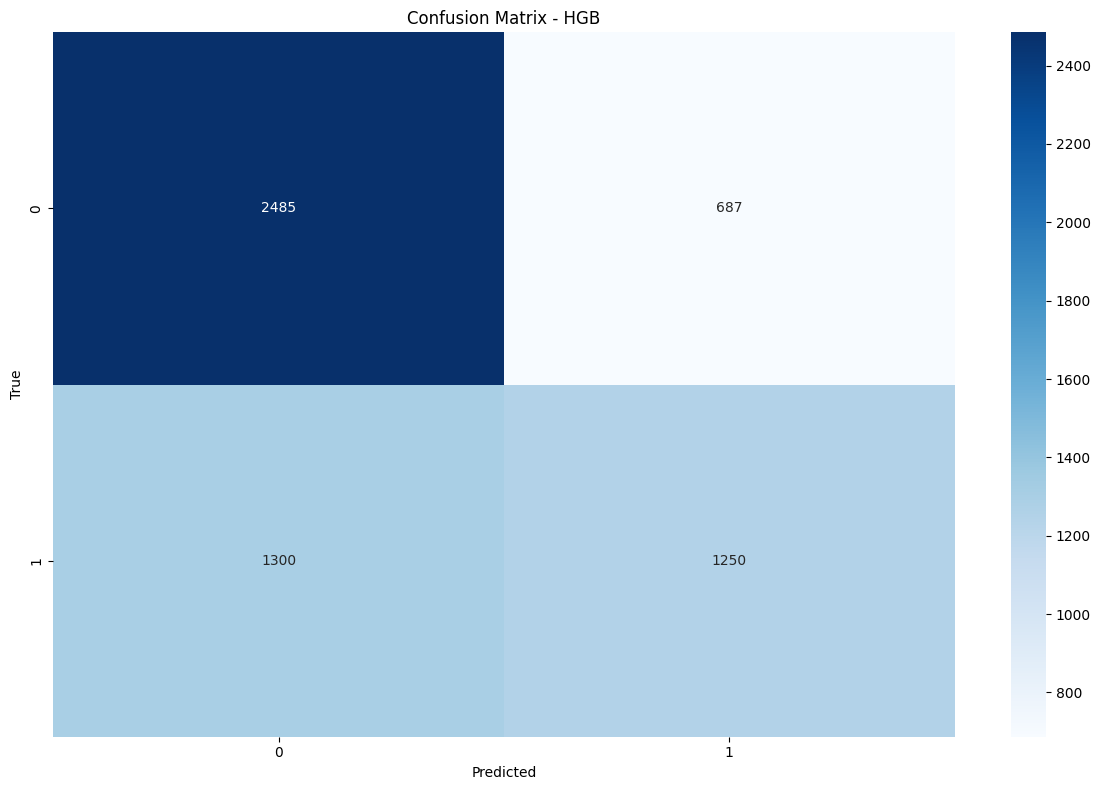

<Figure size 1000x600 with 0 Axes>

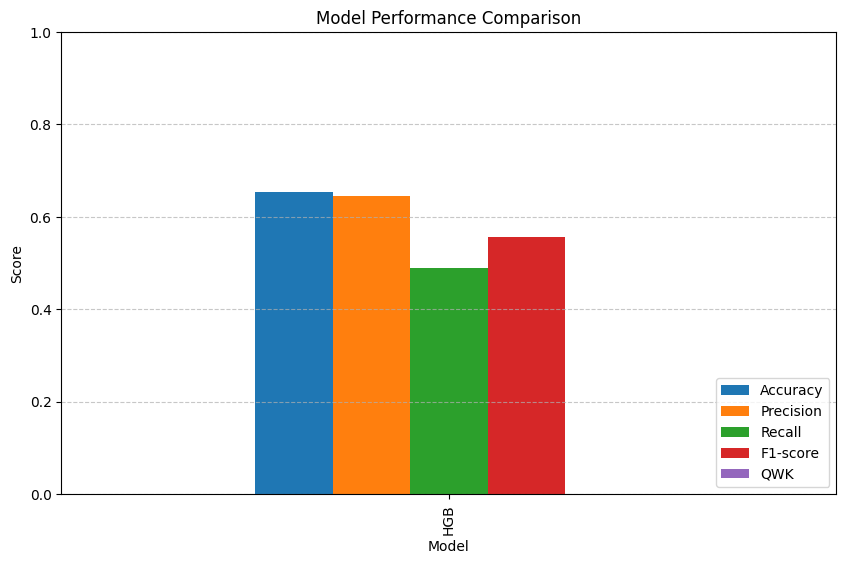

In [69]:
best_model_male_hgb, eval_train_male_hgb, eval_val_male_hgb, results_male_hgb = optimize_hgb_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for HistGradientBoostingClassifier...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=30; total time=   0.8s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=30; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=50; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=50; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=30; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_dept

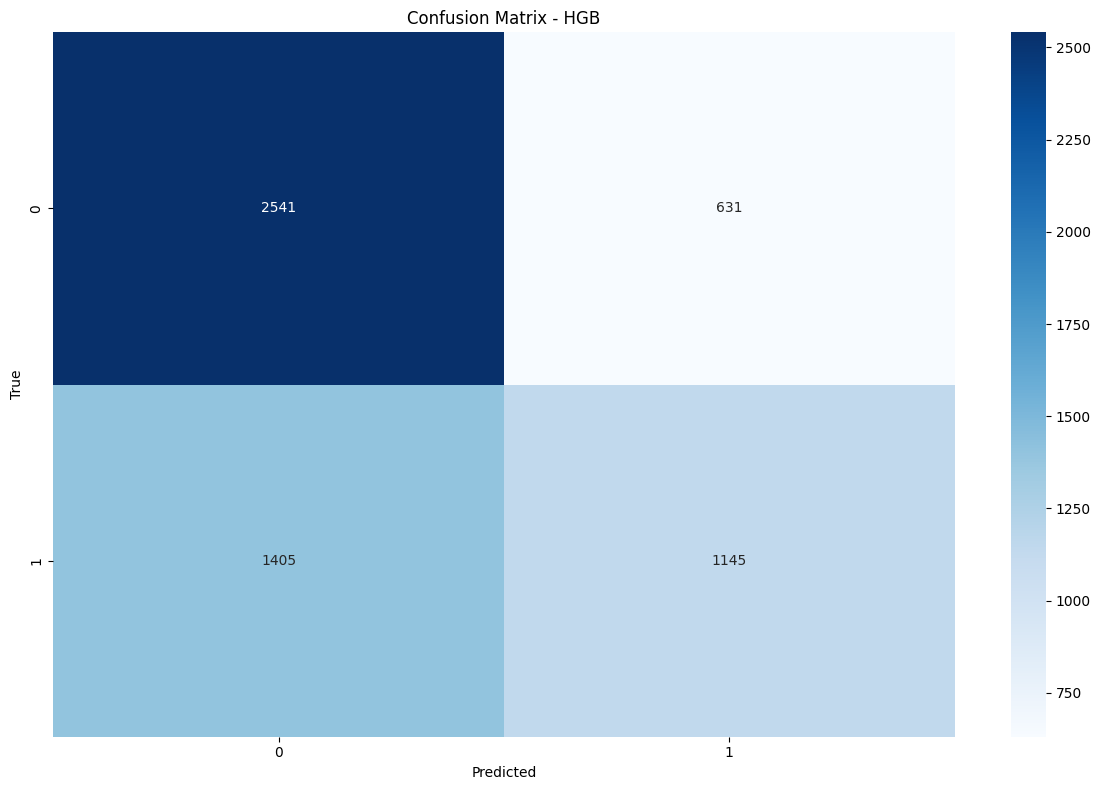

<Figure size 1000x600 with 0 Axes>

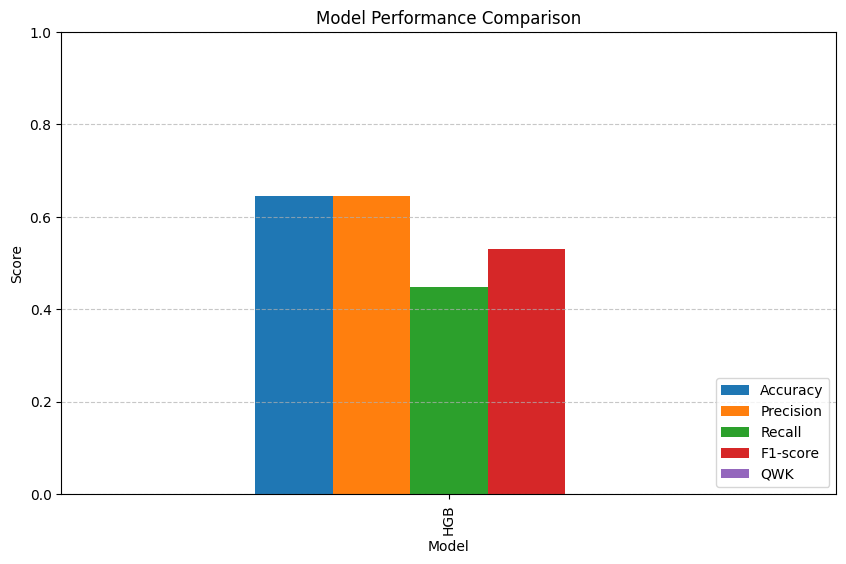

In [82]:
param_grid_hist_gb_2 = {
    'gb__learning_rate': [0.01, 0.05],  # Reduced learning rates for more gradual optimization
    'gb__max_iter': [100, 200],         # More iterations for better model fitting
    'gb__max_depth': [10, 20],          # Depth of the tree for complexity control
    'gb__min_samples_leaf': [30, 50],   # Minimum samples in a leaf to prevent overfitting
    'gb__max_bins': [255],              # Number of bins for histogram-based splits (fixed as in the original)
    'gb__l2_regularization': [0.0, 1.0], # Regularization strength to avoid overfitting
    }

best_model_male_hgb, eval_train_male_hgb, eval_val_male_hgb, results_male_hgb = optimize_hgb_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    param_grid=param_grid_hist_gb_2,
    binning=identity,
    numerical=False
)

Starting grid search for HistGradientBoostingClassifier...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=50; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=50; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=30; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=100, gb__min_samples_leaf=50; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_depth=10, gb__max_iter=200, gb__min_samples_leaf=30; total time=   0.9s
[CV] END gb__l2_regularization=0.0, gb__learning_rate=0.01, gb__max_bins=255, gb__max_dept

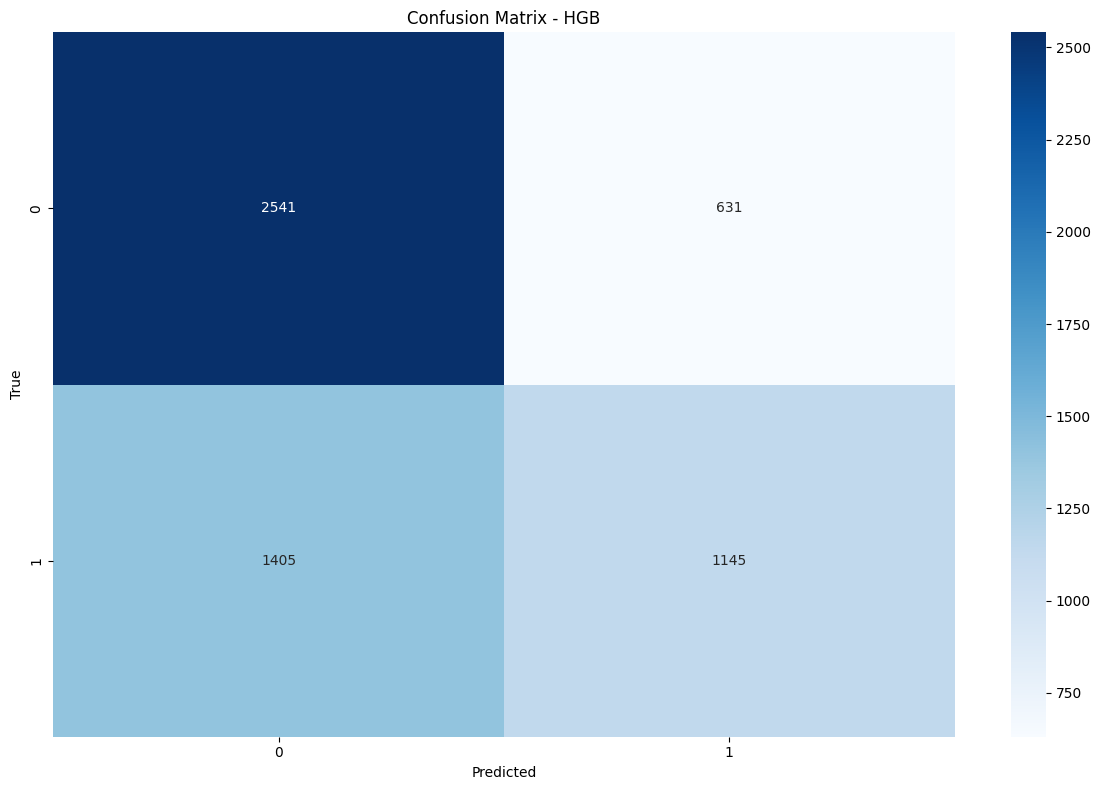

<Figure size 1000x600 with 0 Axes>

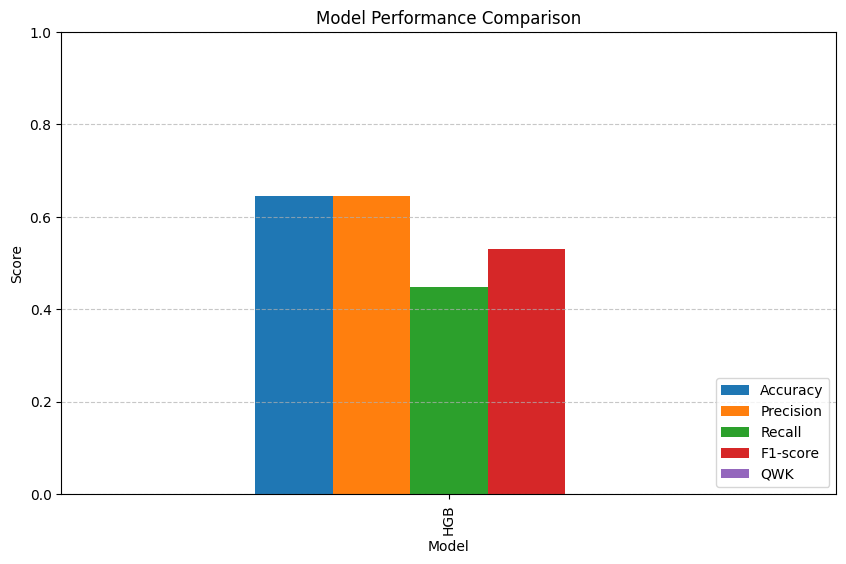

In [83]:
best_model_male_hgb, eval_train_male_hgb, eval_val_male_hgb, results_male_hgb = optimize_hgb_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    param_grid=param_grid_hist_gb_2,
    binning=identity,
    numerical=False
)

HIST Gradient Boosting age classification given true gender:

Male
Best Parameters: Best Parameters: {'gb__l2_regularization': 0.0, 'gb__learning_rate': 0.1, 'gb__max_bins': 255, 'gb__max_depth': None, 'gb__max_iter': 100, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 50}
Accuracy: 65%

Female
Best Parameters: {'gb__l2_regularization': 1.0, 'gb__learning_rate': 0.1, 'gb__max_bins': 255, 'gb__max_depth': None, 'gb__max_iter': 100, 'gb__max_leaf_nodes': 63, 'gb__min_samples_leaf': 50}
Accuraccy: 77%

In [39]:
# lastly optimise MLP parameters for age classification given true gender:

def optimize_mlp_for_gender(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=identity,
    numerical=True
):
    """
    Grid search optimization for MLP classifier, stratified by age and gender.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation
    y_train, y_val : pd.DataFrame
        Must include 'age' and 'gender' columns
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline
    param_grid : dict, optional
        Grid search parameters
    binning : function, optional
        Function to bin ages (identity if no binning)
    numerical : bool
        Whether target is numerical (QWK and MAE computed)

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    if param_grid is None:
        param_grid = {
            'mlp__hidden_layer_sizes': [(128, 64, 32), (256, 128, 64, 32)],
            'mlp__activation': ['relu'],
            'mlp__alpha': [0.0001, 0.001, 0.01],
            'mlp__learning_rate_init': [0.001, 0.0005, 0.0001],
            'mlp__batch_size': [32, 64],
        }

    mlp = MLPClassifier(random_state=27, max_iter=300, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('mlp', mlp)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1,
    )

    print("Starting grid search for MLP...")
    grid_search.fit(X_train, y_train["age_young_old_encoded"])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Detailed results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'MLP': prd_train}
    evaluate_val = {'MLP': prd_val}

    print("\nEvaluating MLP on training set...")
    evaluate_models(y_train["age_young_old_encoded"], evaluate_train, (12, 8), False, "Training Set", binning=binning, numerical=numerical)

    print("\nEvaluating MLP on validation set...")
    evaluate_models(y_val["age_young_old_encoded"], evaluate_val, (12, 8), True, "Validation Set", binning=binning, numerical=numerical)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for MLP...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  35.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  44.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  47.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  49.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  56.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), 

/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0001; total time= 3.5min
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  26.6s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0001; total time= 3.7min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0001; total time= 3.7min
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  35.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(256, 128, 64, 32), mlp__learning_rate_init=0.0005; total time= 2.2min
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  59.9s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  57.8s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=64, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  53.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, 

/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(256, 128, 64, 32), mlp__learning_rate_init=0.0001; total time= 7.4min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(256, 128, 64, 32), mlp__learning_rate_init=0.0001; total time= 7.8min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__batch_size=32, mlp__hidden_layer_sizes=(256, 128, 64, 32), mlp__learning_rate_init=0.0001; total time= 7.5min

Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (256, 128, 64, 32), 'mlp__learning_rate_init': 0.001}

Top 5 configurations:
   param_mlp__activation  param_mlp__alpha  param_mlp__batch_size  \
3                   relu            0.0001                     32   
4                   relu            0.0001                     32   
10                  relu            0.0001                     64   
9                   relu            0.0001                     64   
33                  relu            0.0100                     64   

   param_mlp__hidden_layer_sizes  param_mlp__learning_rate_init  \
3             (256, 128, 64, 32)                         0.0010   
4             (256, 128, 64, 32)                         0.0005   
10            (256, 128, 6

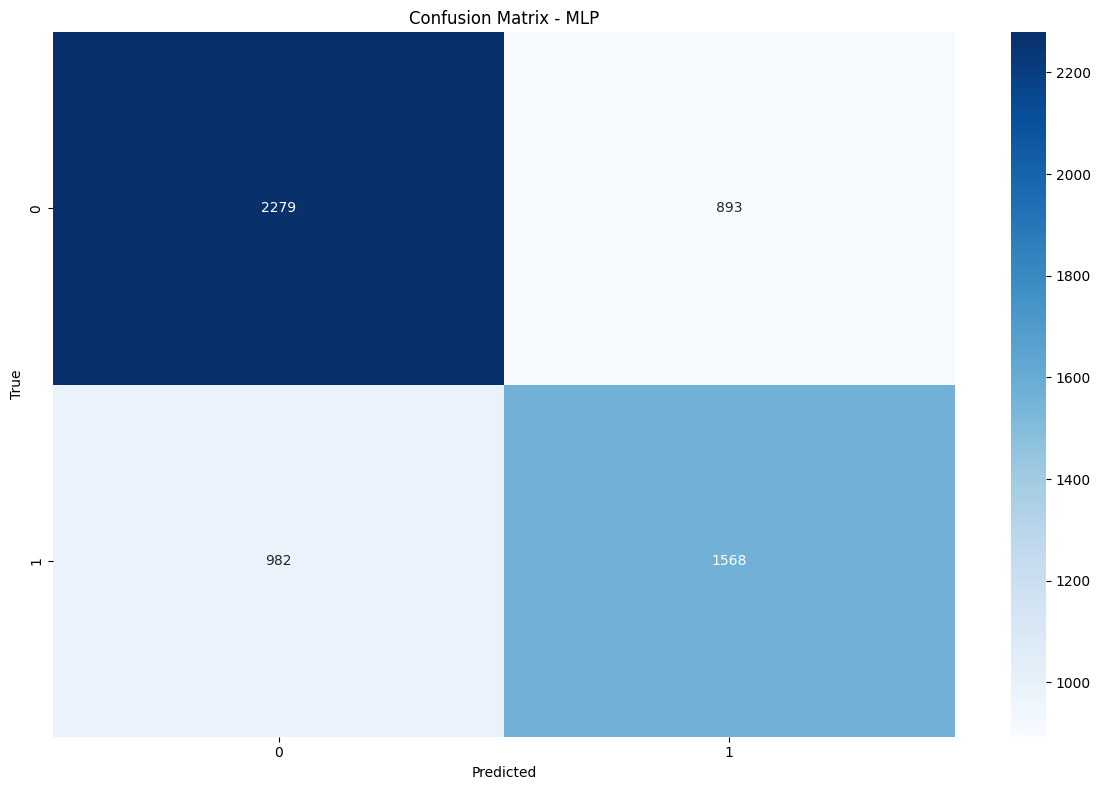

<Figure size 1000x600 with 0 Axes>

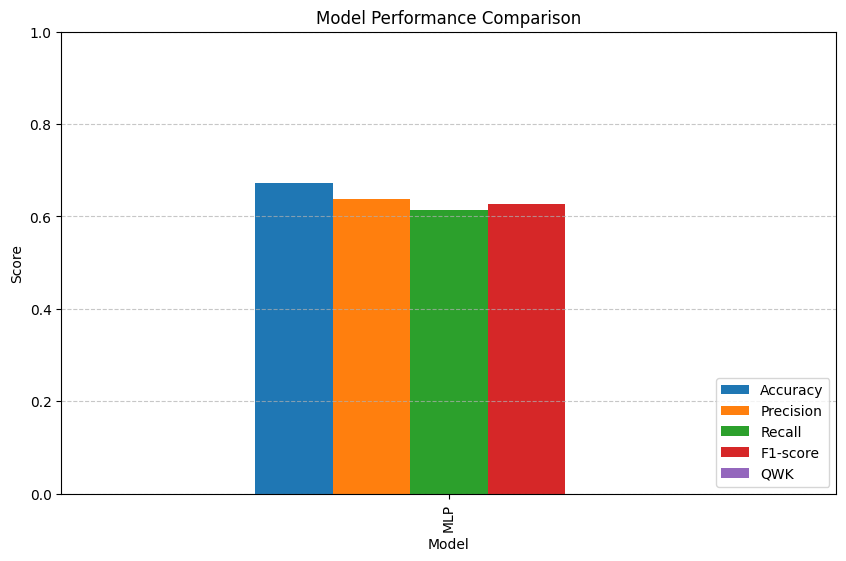

In [62]:
best_model_male_mlp, eval_train_mlp, eval_val_mlp, results_mlp = optimize_mlp_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for MLP...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0001; total time=  12.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  12.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  14.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001; total time=  15.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005; total time=  17.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32),

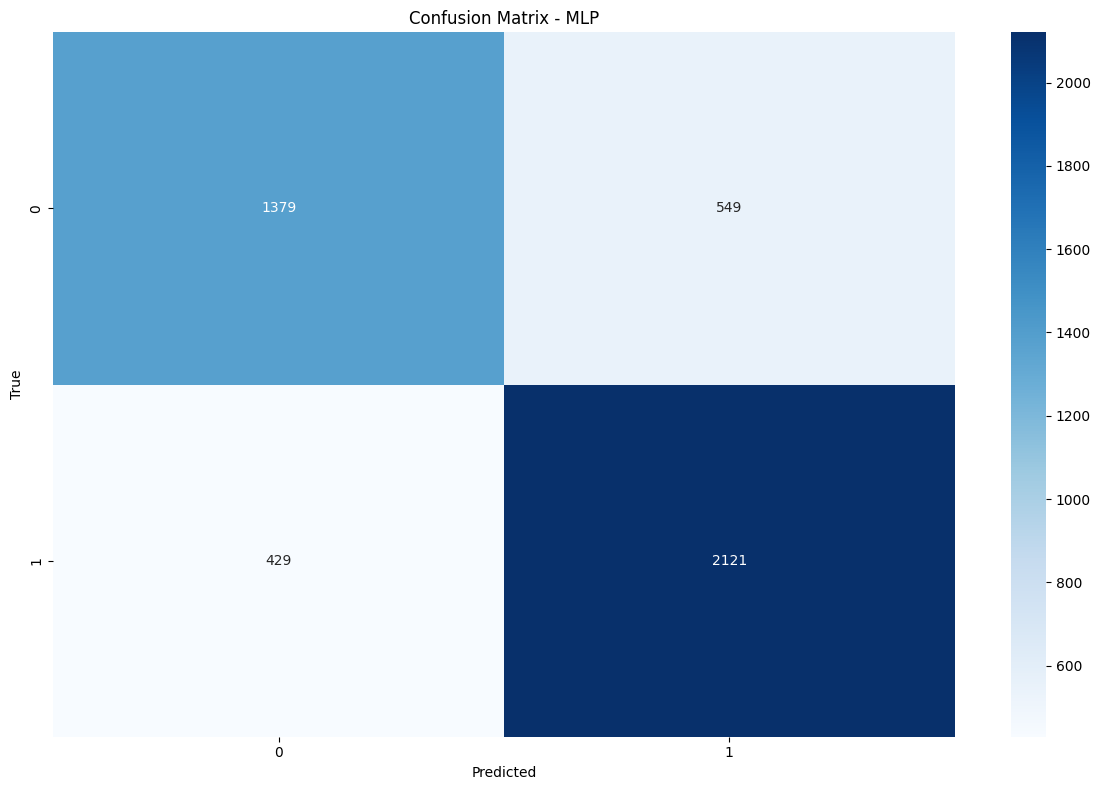

<Figure size 1000x600 with 0 Axes>

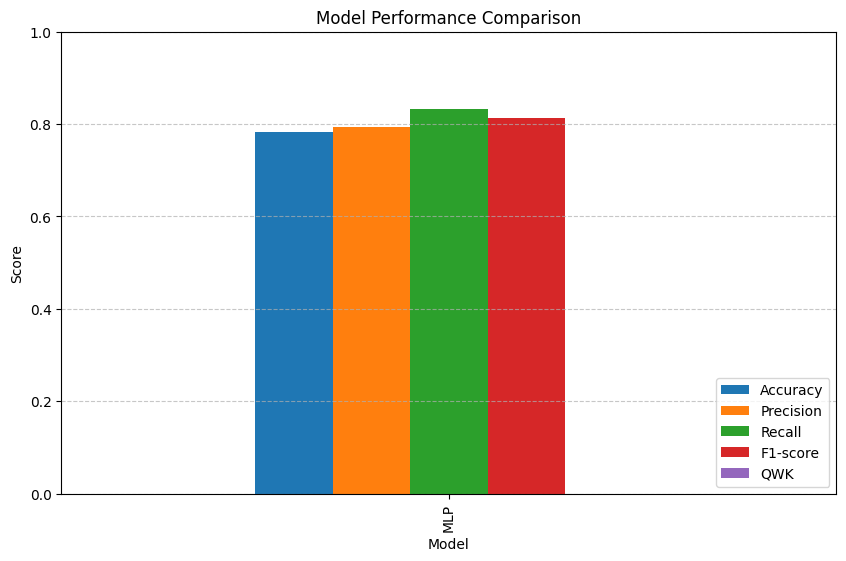

In [66]:
best_model_female_mlp, eval_train_female_mlp, eval_val_female_mlp, results_female_mlp = optimize_mlp_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    binning=identity,
    numerical=False
)

Starting grid search for MLP...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(256, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  32.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(256, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  57.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(256, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.0min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.2min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, 

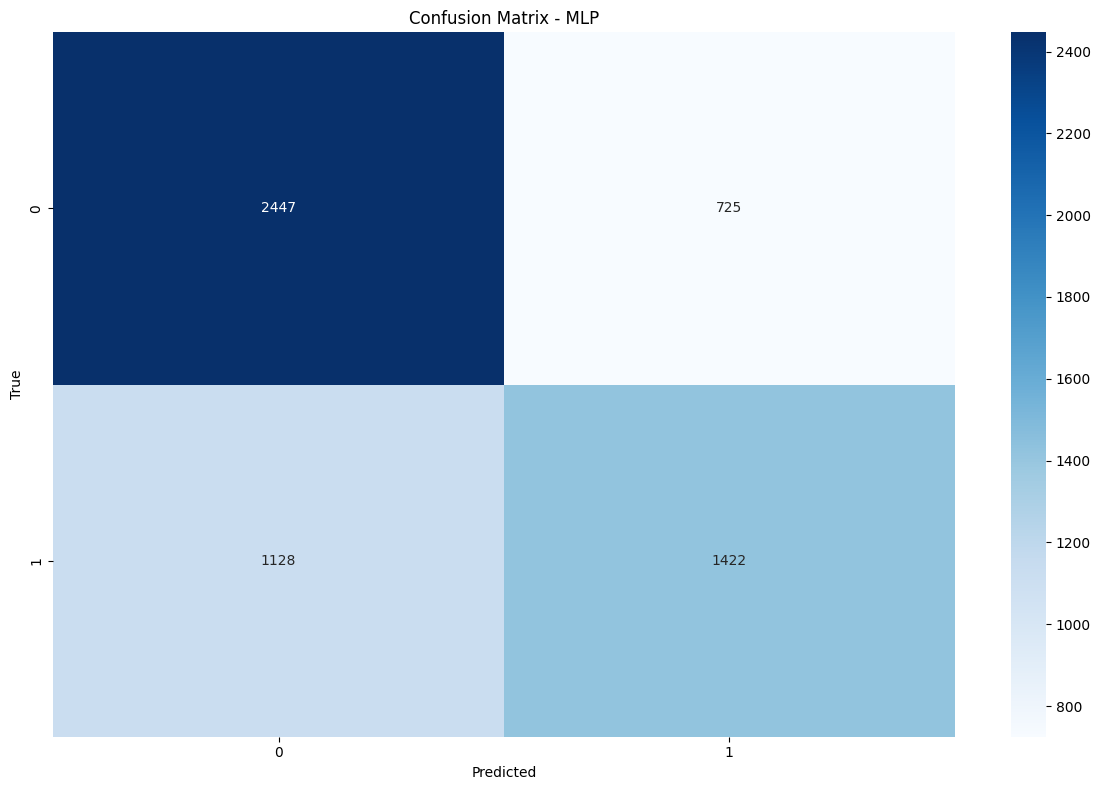

<Figure size 1000x600 with 0 Axes>

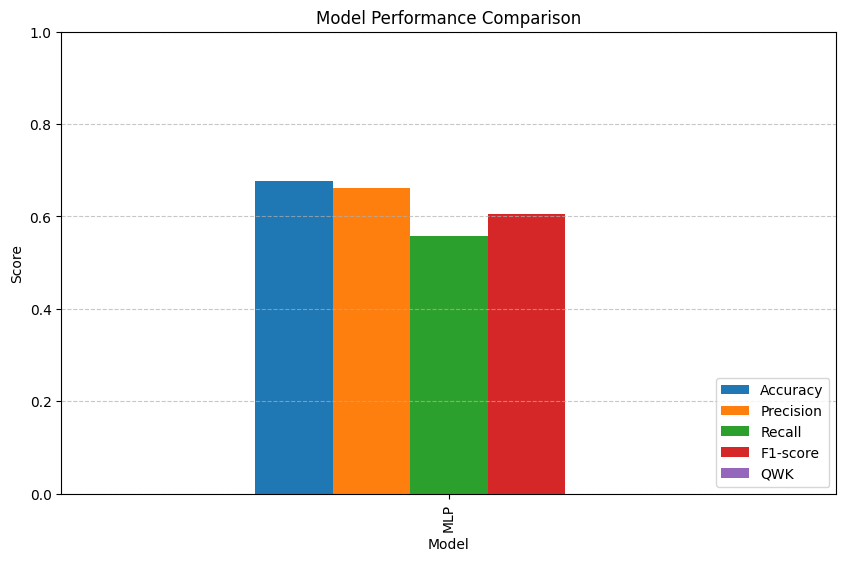

In [ ]:
param_grid_mlp_3 = {
    'mlp__hidden_layer_sizes': [ 
        (512, 256), 
        (256, 256,),
        (512, 512)
    ],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001],
    'mlp__learning_rate_init': [0.001],
    'mlp__batch_size': [64],
    'mlp__max_iter': [200],
    'mlp__solver': ['adam'],
}

best_model_male_mlp, eval_train_mlp, eval_val_mlp, results_mlp = optimize_mlp_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    param_grid=param_grid_mlp_3,
    binning=identity,
    numerical=False
)

Starting grid search for MLP...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 128, 64), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  25.9s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 128, 64), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  27.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 128, 64), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  28.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 128, 64), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  30.4s
[CV] END mlp__act

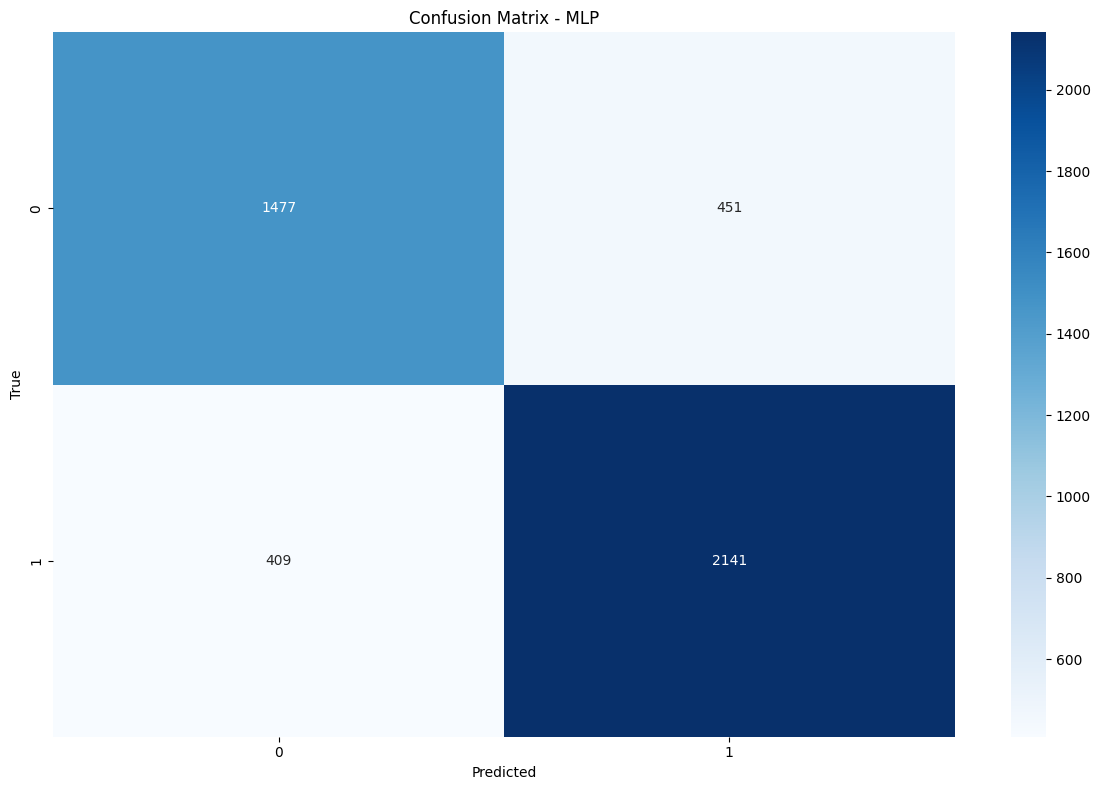

<Figure size 1000x600 with 0 Axes>

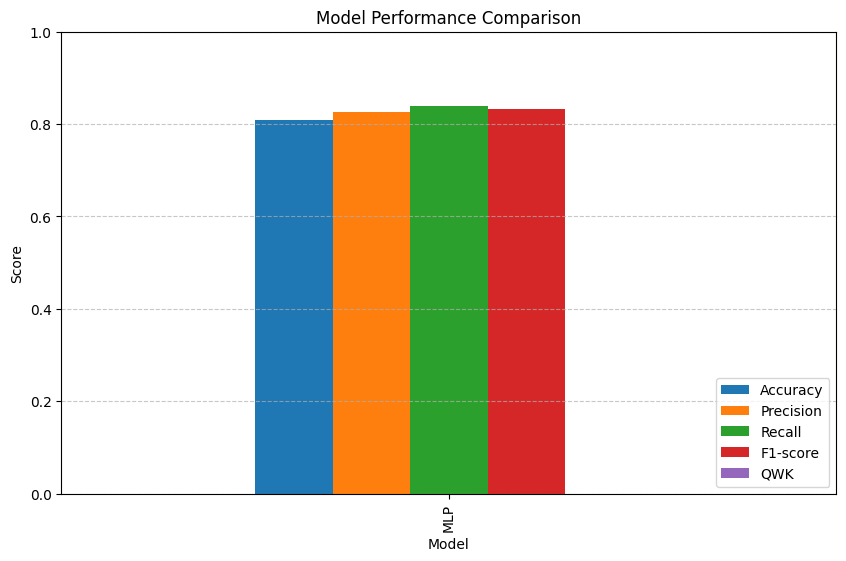

In [96]:
best_model_female_mlp, eval_train_female_mlp, eval_val_female_mlp, results_female_mlp = optimize_mlp_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    param_grid=param_grid_mlp_2,
    binning=identity,
    numerical=False
)

Starting grid search for MLP...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(1024, 512), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.2min
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(1024, 512), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.6min
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(1024, 512), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.8min

Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__batch_size': 64, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (1024, 512), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 200, 'mlp__solver': 'adam'}

Top 5 configu

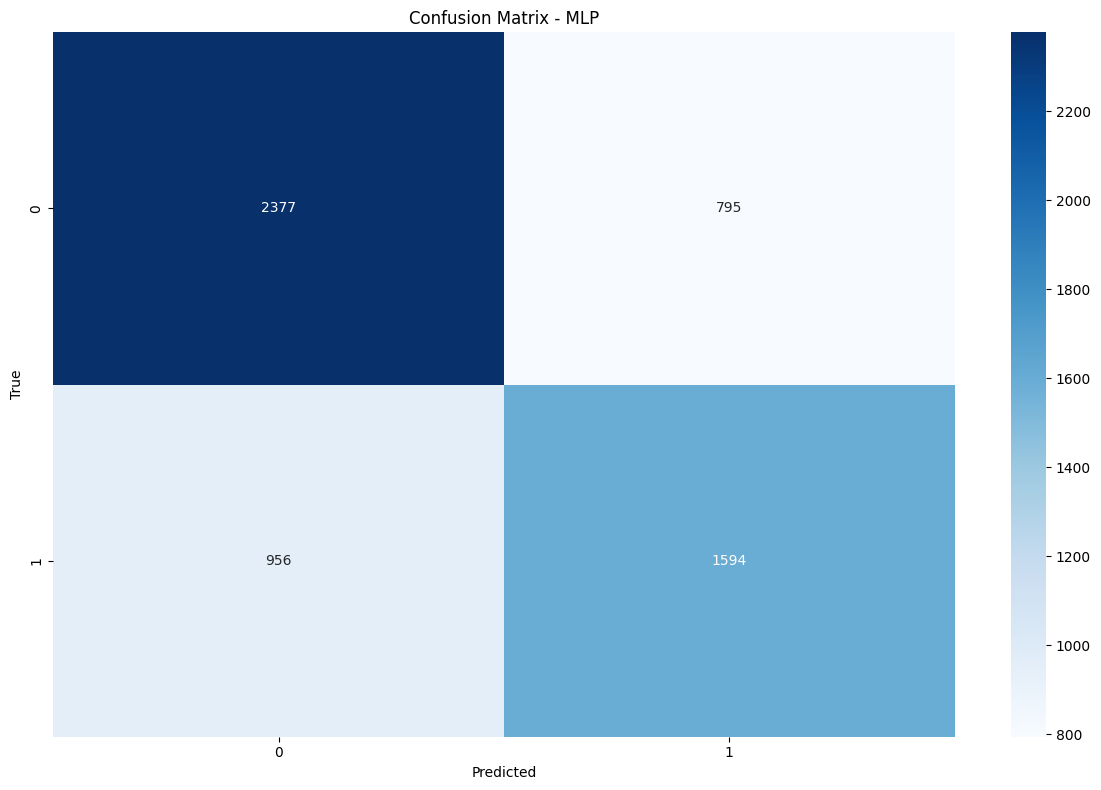

<Figure size 1000x600 with 0 Axes>

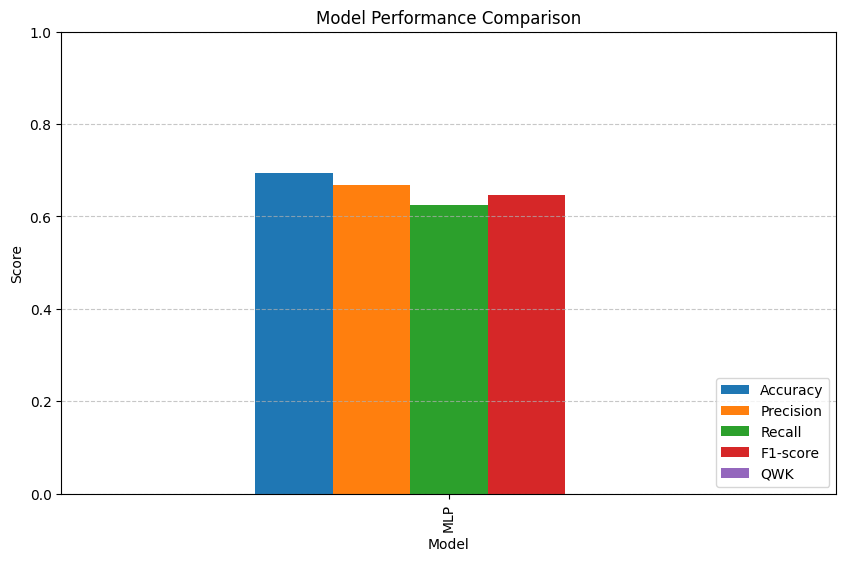

In [52]:
param_grid_mlp_2 = {
    'mlp__hidden_layer_sizes': [(1024, 512)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.001],
    'mlp__learning_rate_init': [0.001],
    'mlp__batch_size': [64],
    'mlp__max_iter': [200],
    'mlp__solver': ['adam'],
    'mlp__early_stopping': [True],
}

best_model_male_mlp, eval_train_mlp, eval_val_mlp, results_mlp = optimize_mlp_for_gender(
    X_train_male,
    y_train_male,
    X_val_male,
    y_val_male,
    preprocessing=preprocessing,
    param_grid=param_grid_mlp_2,
    binning=identity,
    numerical=False
)

Starting grid search for MLP...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  46.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time=  46.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.2min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 1.2min
[CV] END mlp__activation=relu, ml

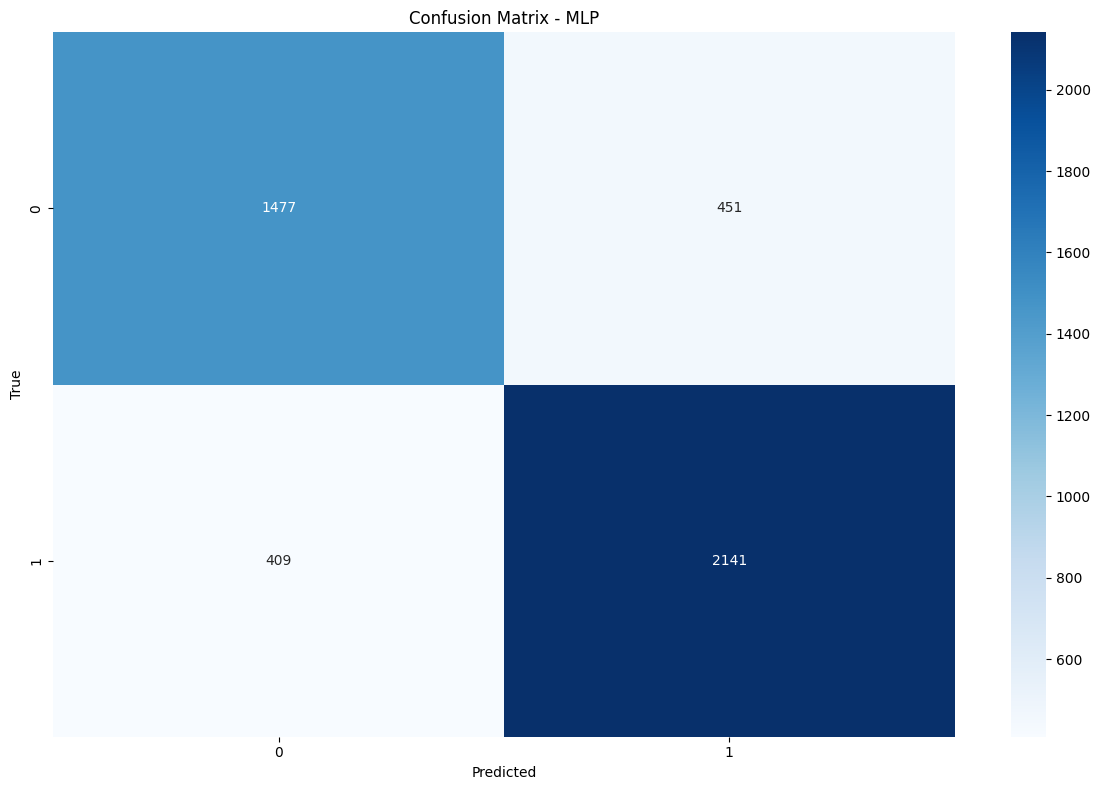

<Figure size 1000x600 with 0 Axes>

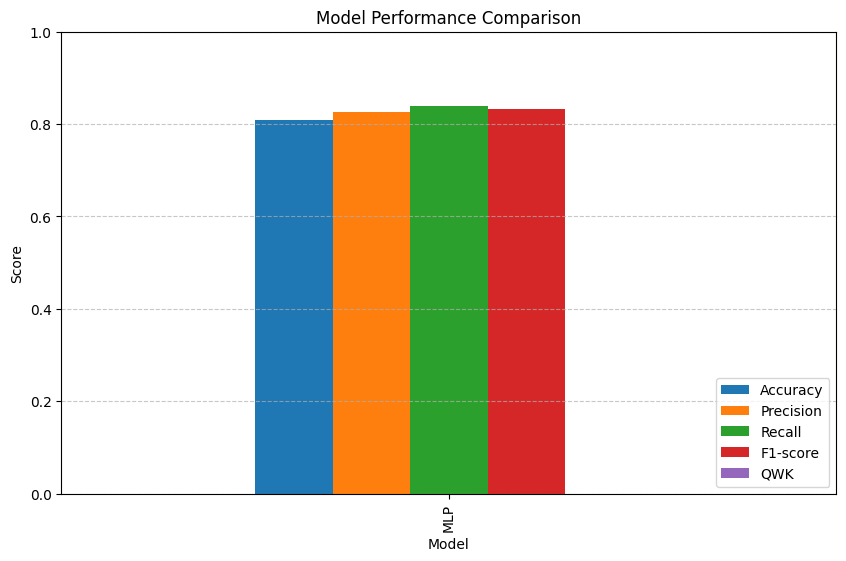

In [54]:
param_grid_mlp_2 = {
    'mlp__hidden_layer_sizes': [(512,256)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001],
    'mlp__learning_rate_init': [0.001],
    'mlp__batch_size': [32, 64],
    'mlp__max_iter': [200],
    'mlp__solver': ['adam'],
    'mlp__early_stopping': [True],
}

best_model_female_mlp, eval_train_female_mlp, eval_val_female_mlp, results_female_mlp = optimize_mlp_for_gender(
    X_train_female,
    y_train_female,
    X_val_female,
    y_val_female,
    preprocessing=preprocessing,
    param_grid=param_grid_mlp_2,
    binning=identity,
    numerical=False
)

MLP age classification given true gender:

Male
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (256, 128, 64, 32), 'mlp__learning_rate_init': 0.001}      
Accuracy: 67%

Female
Best Parameters: Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (256, 128, 64, 32), 'mlp__learning_rate_init': 0.001}
Accuraccy: 78%



____________________
using this grid: 

param_grid_mlp_2 = {
    'mlp__hidden_layer_sizes': [(256, 128, 64),(512, 256),],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001],
    'mlp__batch_size': [64],
    'mlp__max_iter': [200],
    'mlp__solver': ['adam'],
    'mlp__early_stopping': [True],
}
### BEST PARAMS EVER for age given true gender :(
Male
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__batch_size': 64, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (512, 256), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 200, 'mlp__solver': 'adam'}
Accuracy: 69%

Female
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 64, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (512, 256), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 200, 'mlp__solver': 'adam'}
Accuracy: 81%


## The last Hyperparameters to test:

- Best MLP to predict age, no gender info

In [ ]:
def optimize_mlp_with_gridsearch(param_grid=None):
    if param_grid is None:
        # Updated parameter grid
        param_grid = {
            'mlp__hidden_layer_sizes': [
                (512, 256), 
                (256, 128), 
                (256, 128, 64, 32),
                (128, 64)
            ],
            'mlp__activation': ['relu'],
            'mlp__alpha': [0.0001, 0.001, 0.01],
            'mlp__learning_rate_init': [0.001, 0.0005, 0.0001],
            'mlp__batch_size': [64],
        }

    mlp = MLPClassifier(
        max_iter=2000,
        random_state=27,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1
    )

    base_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('mlp', mlp)
    ])

    grid_search = GridSearchCV(
        base_pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train['age_young_old_encoded'])

    print(f"Best Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    # Build evaluation dicts
    evaluate_train = {'MLP': prd_train}
    evaluate_val = {'MLP': prd_val}

    print("Evaluating MLP on training set...")
    evaluate_models(y_train['age_young_old_encoded'], evaluate_train, (12, 8), False, "Training Set")

    print("Evaluating MLP on validation set...")
    return evaluate_models(y_val['age_young_old_encoded'], evaluate_val, (12, 8), True, "Validation Set")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0005; total time= 2.3min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0001; total time= 3.1min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0005; total time= 3.5min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(256, 128), mlp__learning_rate_init=0.001; total time=  37.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001; total time= 3.7min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001; total time= 3.7min

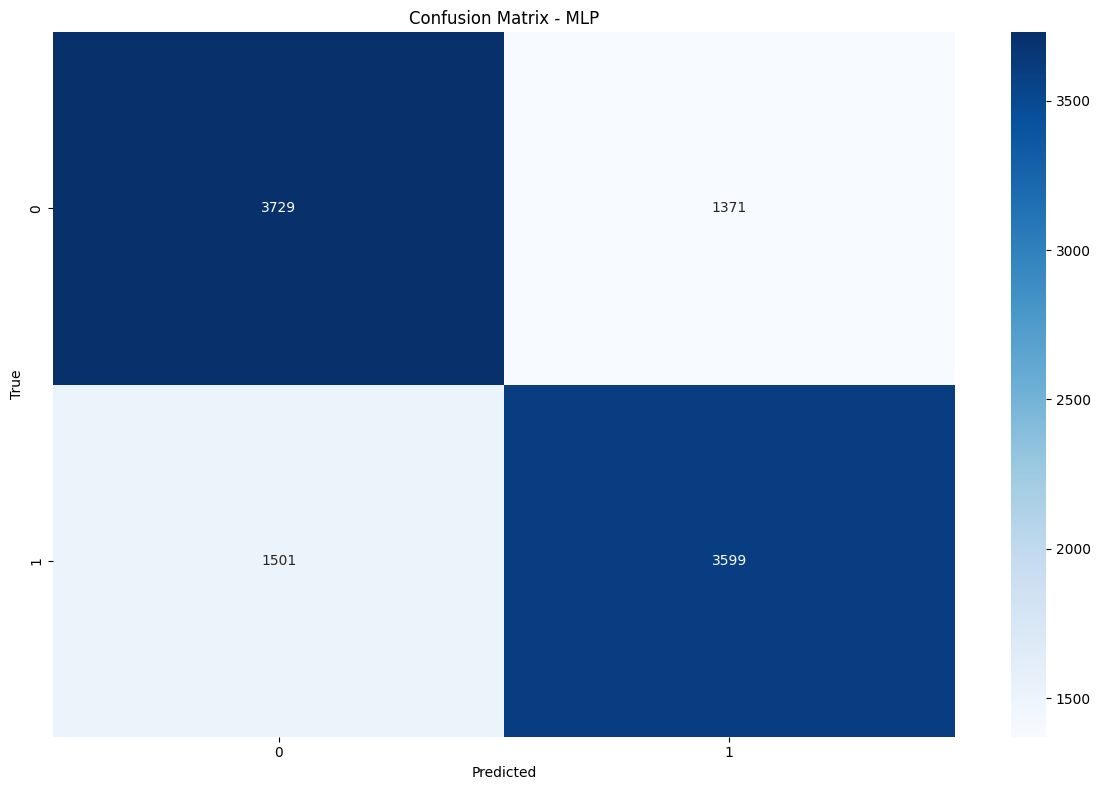

<Figure size 1000x600 with 0 Axes>

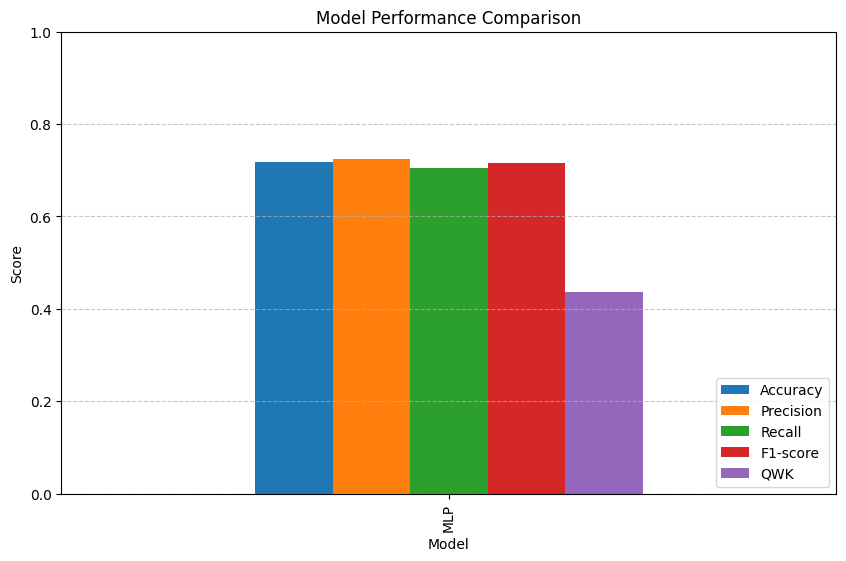

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP,0.7184,0.7241,0.7057,0.7148,0.4369,0.2816


In [41]:
optimize_mlp_with_gridsearch()

In [43]:
def optimize_mlp_with_gridsearch_2(param_grid=None):
    if param_grid is None:
        # Updated parameter grid
        param_grid = {
            'mlp__hidden_layer_sizes': [
                (1024, 512),
                (512, 256),
                (512,256, 128),
                (256, 128),
            ],
            'mlp__activation': ['relu'],
            'mlp__alpha': [0.0001, 0.001],
            'mlp__learning_rate_init': [0.0005, 0.0001],
            'mlp__batch_size': [64],
        }

    mlp = MLPClassifier(
        max_iter=2000,
        random_state=27,
        learning_rate='adaptive',
        )

    base_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('mlp', mlp)
    ])

    grid_search = GridSearchCV(
        base_pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train['age_young_old'])

    print(f"Best Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    # Build evaluation dicts
    evaluate_train = {'MLP': prd_train}
    evaluate_val = {'MLP': prd_val}

    print("Evaluating MLP on training set...")
    evaluate_models(y_train['age_young_old'], evaluate_train, (12, 8), False, "Training Set")

    print("Evaluating MLP on validation set...")
    return evaluate_models(y_val['age_young_old'], evaluate_val, (12, 8), True, "Validation Set")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0005; total time= 2.7min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0001; total time= 3.4min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001; total time= 3.8min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001; total time= 3.8min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.0005; total time= 3.9min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__hidden_layer_sizes=(256, 128), mlp__learning_rate_init=0.001; total time=  38.6s

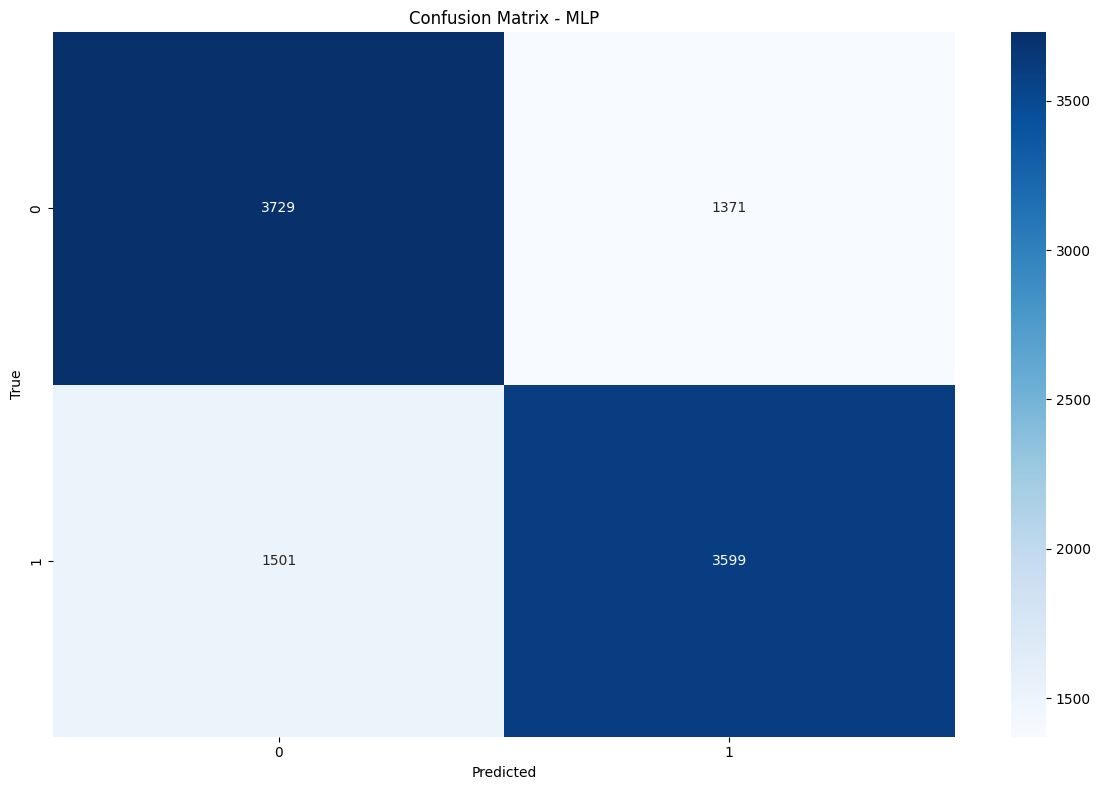

<Figure size 1000x600 with 0 Axes>

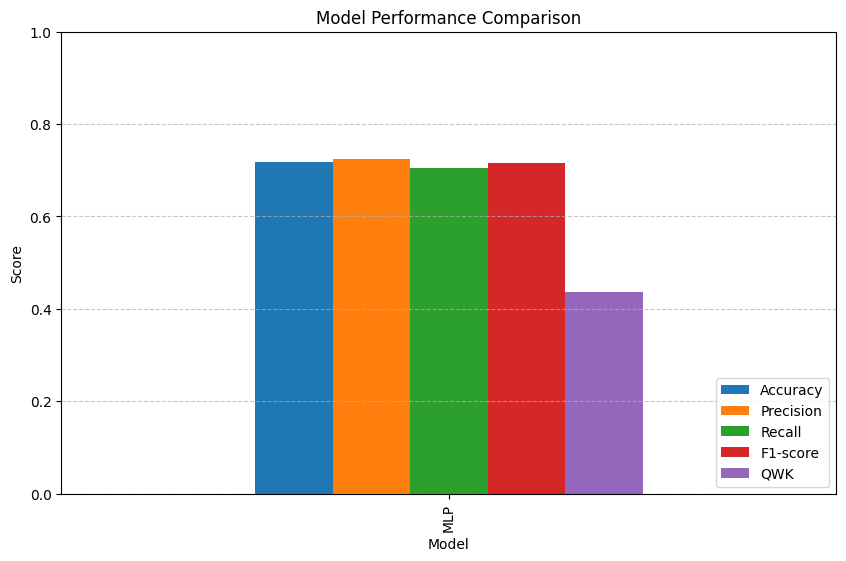

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP,0.7184,0.7241,0.7057,0.7148,0.4369,0.2816


In [44]:
optimize_mlp_with_gridsearch()

In [61]:
def optimize_rf_classifier(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=lambda x: x,
):
    """
    Grid search optimization for Random Forest classifier with higher-level parameter tuning.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation.
    y_train, y_val : pd.DataFrame
        Must include 'age_young_old_encoded' column.
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline.
    param_grid : dict, optional
        Grid search parameters.
    binning : function, optional
        Function to bin labels (identity by default).

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    # More comprehensive default grid
    if param_grid is None:
        param_grid = {
            'rf__n_estimators': [200, 300],
            'rf__max_depth': [20, 30,],
            'rf__min_samples_split': [2, 5],
            'rf__min_samples_leaf': [1, 2],
            'rf__max_features': ['sqrt'],
            'rf__criterion': ['gini', 'entropy'],
        }

    rf = RandomForestClassifier(random_state=27)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('rf', rf)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for Random Forest...")
    grid_search.fit(X_train, y_train['age_young_old_encoded'])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Summarize results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'RandomForest': prd_train}
    evaluate_val = {'RandomForest': prd_val}

    print("\nEvaluating Random Forest on training set...")
    evaluate_models(y_train['age_young_old_encoded'], evaluate_train, (12, 8), False, "Training Set", binning=binning)

    print("\nEvaluating Random Forest on validation set...")
    evaluate_models(y_val['age_young_old_encoded'], evaluate_val, (12, 8), True, "Validation Set", binning=binning)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for Random Forest...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__n_estimators=200; total time= 1.6min
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time= 1.6min
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__n_estimators=200; total time= 1.7min
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time= 1.7min
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time= 1.7min
[CV] END rf__criterion=gini, rf__max_depth=20, rf__max_features=sqrt, rf__min_samples_leaf=1, rf_

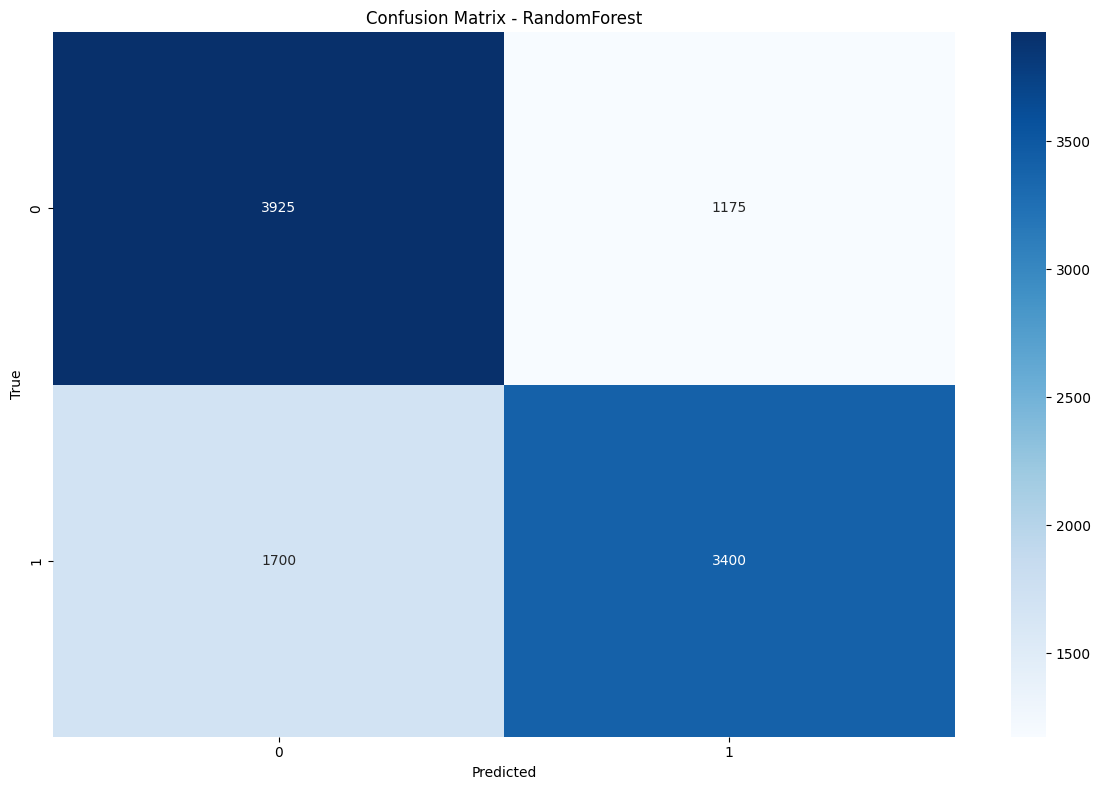

<Figure size 1000x600 with 0 Axes>

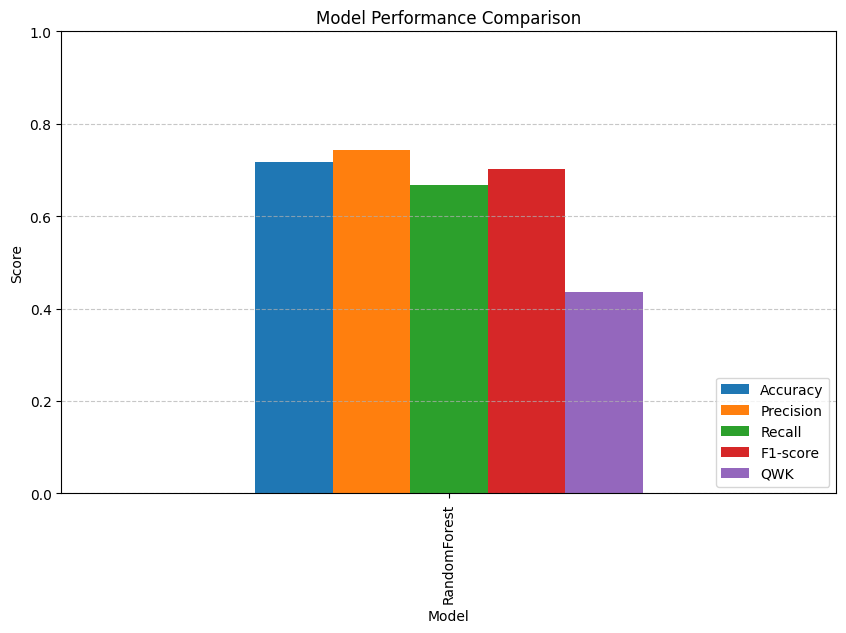

In [62]:
best_model, eval_train, eval_val, results_df = optimize_rf_classifier(
    X_train, y_train,
    X_val, y_val,
    preprocessing=preprocessing,
)

#### SVC

In [65]:
def optimize_svc_classifier(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None,
    binning=lambda x: x,
):
    """
    Grid search optimization for Linear Support Vector Classifier with basic parameter tuning.

    Parameters
    ----------
    X_train, X_val : pd.DataFrame
        Feature data for training and validation.
    y_train, y_val : pd.DataFrame
        Must include 'age_young_old_encoded' column.
    preprocessing : sklearn.compose.ColumnTransformer or Pipeline
        Preprocessing pipeline.
    param_grid : dict, optional
        Grid search parameters.
    binning : function, optional
        Function to bin labels (identity by default).

    Returns
    -------
    best_model : sklearn estimator
    evaluate_train : dict
    evaluate_val : dict
    results_df_sorted : pd.DataFrame
    """

    # Lightweight default grid for LinearSVC
    if param_grid is None:
        param_grid = {
            'linear_svc__C': [0.01, 0.1, 1, 10],
            'linear_svc__loss': ['squared_hinge'],
            'linear_svc__dual': [True, False],
            "linear_svc__max_iter" : [1000,10000]
        }

    svc = LinearSVC(random_state=27)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('linear_svc', svc)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
    )

    print("Starting grid search for LinearSVC...")
    grid_search.fit(X_train, y_train['age_young_old_encoded'])

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Summarize results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print("\nTop 5 configurations:")
    print(results_df_sorted[display_cols].head())

    # Predictions
    prd_train = best_model.predict(X_train)
    prd_val = best_model.predict(X_val)

    evaluate_train = {'LinearSVC': prd_train}
    evaluate_val = {'LinearSVC': prd_val}

    print("\nEvaluating LinearSVC on training set...")
    evaluate_models(y_train['age_young_old_encoded'], evaluate_train, (12, 8), False, "Training Set", binning=binning)

    print("\nEvaluating LinearSVC on validation set...")
    evaluate_models(y_val['age_young_old_encoded'], evaluate_val, (12, 8), True, "Validation Set", binning=binning)

    return best_model, evaluate_train, evaluate_val, results_df_sorted

Starting grid search for LinearSVC...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   3.0s
[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   3.2s
[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   3.2s
[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   3.1s
[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.8s
[CV] END linear_svc__C=0.01, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   3.0s
[CV] END linear_svc__C=0.01, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=  10.3s
[CV] END linear_svc__C=0.01, linear_svc__dual=True, linear_svc__loss=squared_hin

/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  33.9s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  34.6s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  34.6s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  32.1s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  31.4s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.6s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.5s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.9s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.4s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.8s
[CV] END linear_svc__C=1, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.9s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  34.0s
[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 1.1min
[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 1.1min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  31.3s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  32.0s


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=  31.5s
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.7s
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.5s
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=1000; total time=   2.3s
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.4s
[CV] END linear_svc__C=0.1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 1.8min
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time=   2.7s
[CV] END linear_svc__C=10, linear_svc__dual=False, linear_svc__loss=squared_hinge, linear_svc__

/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 4.3min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 4.3min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=1, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 4.3min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 4.0min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 3.9min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END linear_svc__C=10, linear_svc__dual=True, linear_svc__loss=squared_hinge, linear_svc__max_iter=10000; total time= 3.8min


/Users/jakobhren/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best Parameters: {'linear_svc__C': 1, 'linear_svc__dual': True, 'linear_svc__loss': 'squared_hinge', 'linear_svc__max_iter': 1000}

Top 5 configurations:
    param_linear_svc__C  param_linear_svc__dual param_linear_svc__loss  \
8                1.0000                    True          squared_hinge   
13              10.0000                    True          squared_hinge   
10               1.0000                   False          squared_hinge   
11               1.0000                   False          squared_hinge   
14              10.0000                   False          squared_hinge   

    param_linear_svc__max_iter  mean_test_score  std_test_score  
8                         1000           0.6271          0.0052  
13                       10000           0.6269          0.0048  
10                        1000           0.6264          0.0045  
11                       10000           0.6264          0.0045  
14                        1000           0.6264          0.0045  

Eva

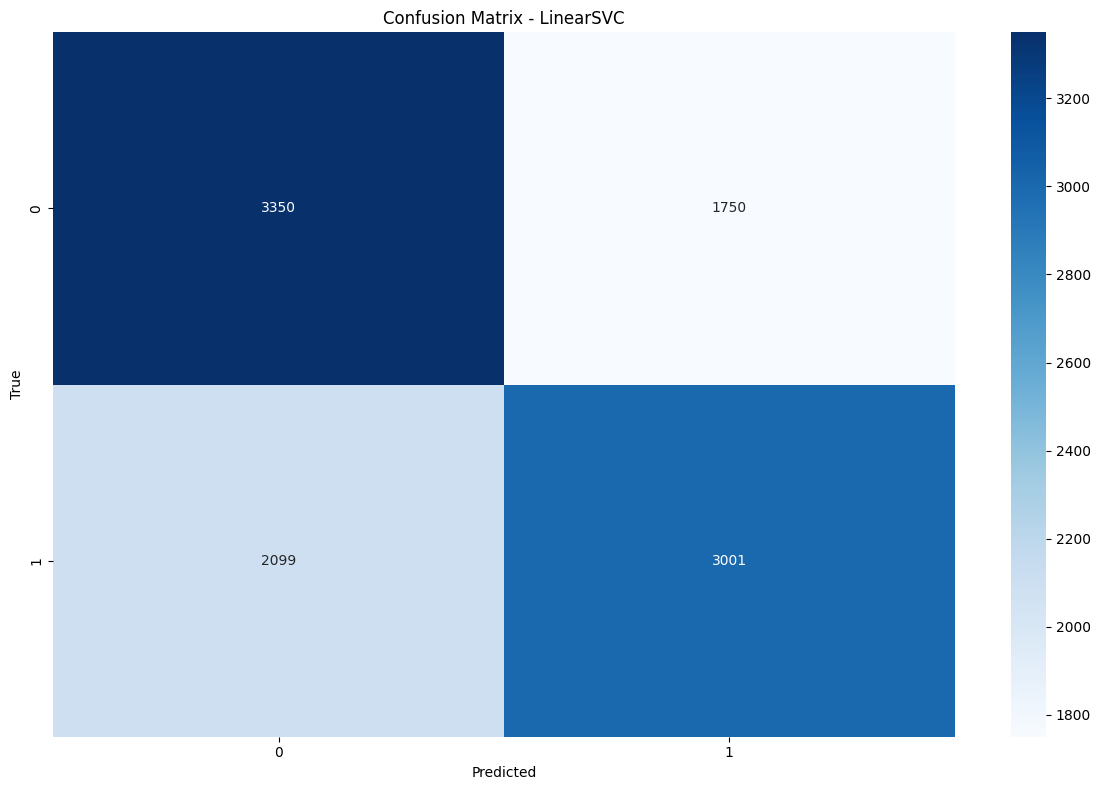

<Figure size 1000x600 with 0 Axes>

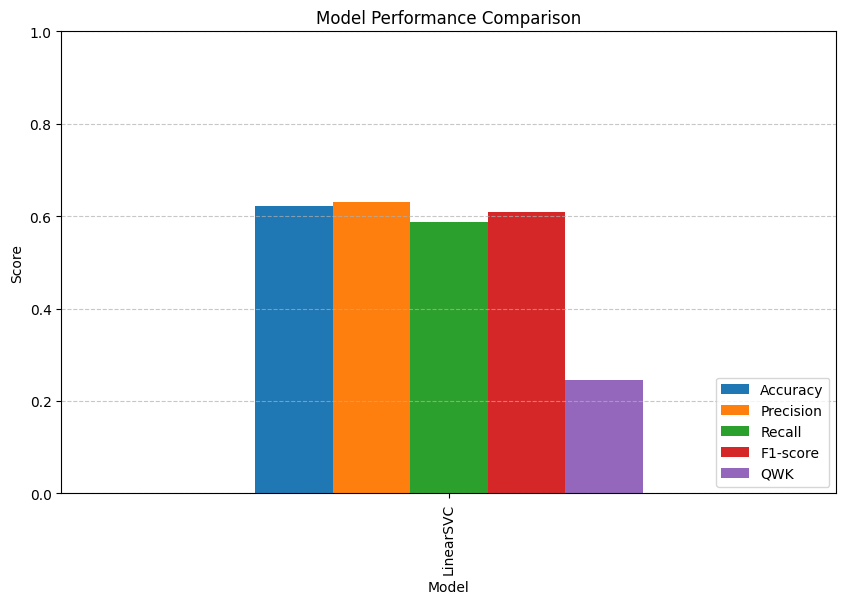

In [66]:
best_model, evaluate_train, evaluate_val, results_df_sorted = optimize_svc_classifier(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    preprocessing=preprocessing,
)

## Soft Age Prediction

In [42]:
def fit_predict_gender_age_pipeline_with_soft_feature(
    gender_model_class,
    age_model_class,
    gender_model_name="GenderModel",
    age_model_name="AgeModel",
    X_train=X_train, y_train_gender=y_train['gender'],y_train_age=y_train['gender'], X_val=X_val,
    y_val_gender=y_val['gender'],y_val_age=y_val['age'],
    binning=identity, numerical=True, multiclass=False):
    
    
    # ====== Fit gender model ======
    pipe_gender = make_pipeline(clone(preprocessing), clone(gender_model_class))
    print(f"\nFitting {gender_model_name} on training set")
    pipe_gender.fit(X_train, y_train_gender)

    # Predict gender probability (for 'male_masculine')
    print(f"\nPredict probability of {gender_model_name} on training set")
    prob_gender_train = pipe_gender.predict_proba(X_train)[:, 1]
    print(f"\nPredict probability of {gender_model_name} on validation set")
    prob_gender_val = pipe_gender.predict_proba(X_val)[:, 1]
    true_gender_binary_val = (y_val['gender'] == 'male_masculine').astype(int)

    # ====== Evaluate gender model ======
    predicted_gender_val = pipe_gender.predict(X_val)
    print(f"\n{gender_model_name} Gender Model - Validation Set Classification Report:")
    print(classification_report(y_val_gender, predicted_gender_val))

    auc_score = roc_auc_score(true_gender_binary_val, prob_gender_val)
    logloss = log_loss(true_gender_binary_val, prob_gender_val)
    print(f"AUC-ROC for Gender Probabilities: {auc_score:.4f}")
    print(f"Log Loss for Gender Probabilities: {logloss:.4f}")

    RocCurveDisplay.from_predictions(true_gender_binary_val, prob_gender_val)
    plt.title("ROC Curve - Gender Probabilities")
    plt.show()

    prob_true, prob_pred = calibration_curve(true_gender_binary_val, prob_gender_val, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title("Calibration Curve - Gender Probabilities")
    plt.show()

    # ====== Append gender prob to features ======
    X_train_aug = X_train.copy()
    X_val_aug = X_val.copy()
    X_train_aug['prob_gender_male'] = prob_gender_train
    X_val_aug['prob_gender_male'] = prob_gender_val

    # ====== Fit age model ======
    age_model = make_pipeline(clone(preprocessing), clone(age_model_class))
    print(f"\nFitting {age_model_name} with gender probability feature")
    age_model.fit(X_train_aug, y_train_age)
    print(f"\nPredicting {age_model_name} on training set")
    pred_train=age_model.predict(X_train_aug)
    print(f"\nPredicting {age_model_name} on validation set")
    pred_val = age_model.predict(X_val_aug)
    
    if multiclass:
        y_train_age = y_train_age[:, 1]
        y_val_age = y_val_age[:, 1]
        pred_train = pred_train[:, 1]
        pred_val = pred_val[:, 1]
        
    
    evaluate_models(y_train_age, {age_model_name : pred_train}, (12, 8), False, "Training Set", numerical=numerical, binning=binning)

    # ====== Predict age ======
    return evaluate_models(y_val_age, {age_model_name : pred_val}, (12, 8), True, "Validation Set", numerical=numerical, binning=binning)


KNN by Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.87      0.88      0.87      3946
 male_masculine       0.89      0.89      0.89      4532

       accuracy                           0.88      8478
      macro avg       0.88      0.88      0.88      8478
   weighted avg       0.88      0.88      0.88      8478

AUC-ROC for Gender Probabilities: 0.9431
Log Loss for Gender Probabilities: 0.7409


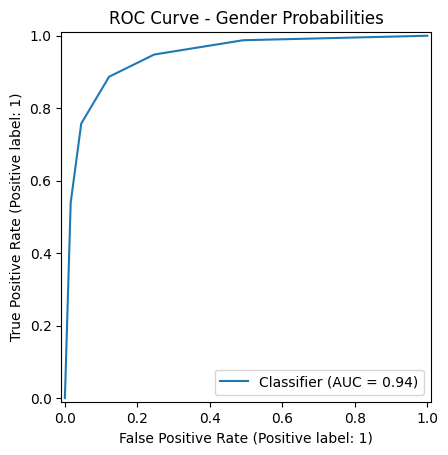

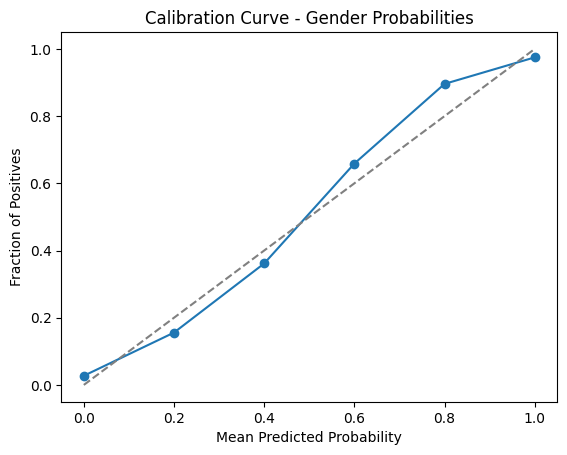


Fitting KNN by Age with gender probability feature

===== KNN by Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.63      0.81      0.71      7479
        20.0       0.65      0.62      0.64      7684
        30.0       0.66      0.65      0.66      7534
        40.0       0.69      0.66      0.67      6359
        50.0       0.74      0.66      0.70      5559
        60.0       0.78      0.66      0.71      3457
        70.0       0.80      0.71      0.75      1488

    accuracy                           0.68     39560
   macro avg       0.71      0.68      0.69     39560
weighted avg       0.68      0.68      0.68     39560


===== KNN by Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.44      0.59      0.51      1602
        20.0       0.38      0.35      0.36      1648
        30.0       0.42      0.43      0.42      1615
        40

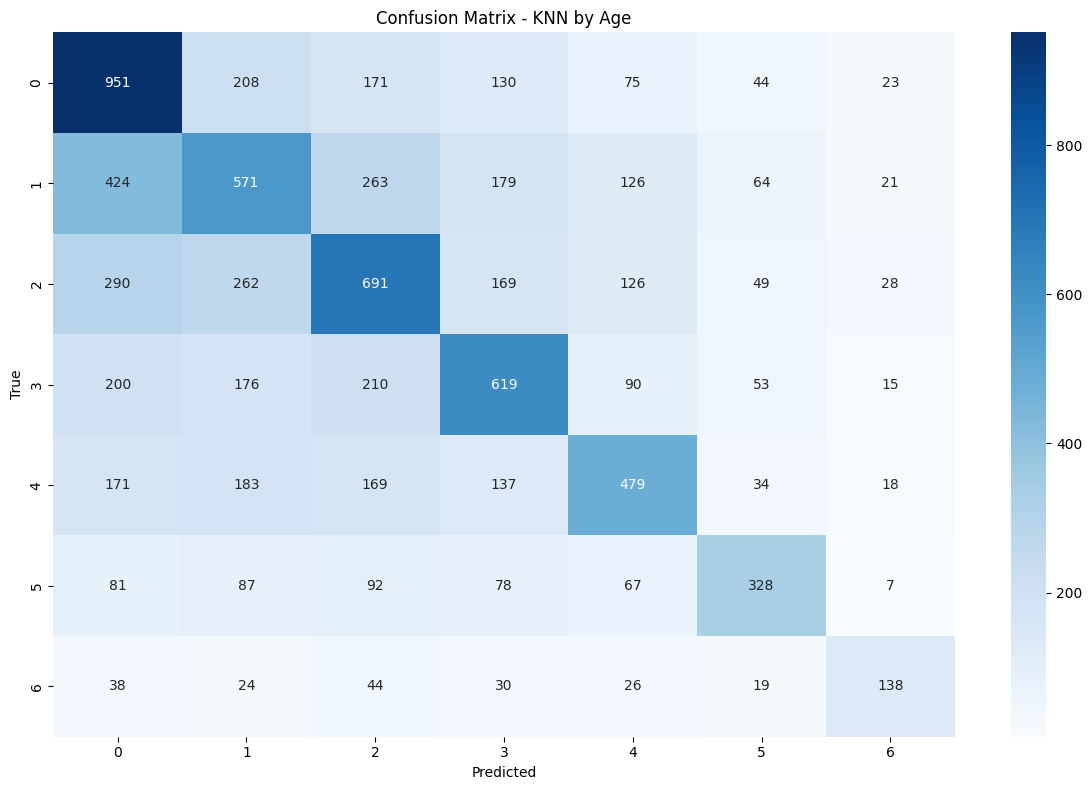

<Figure size 1000x600 with 0 Axes>

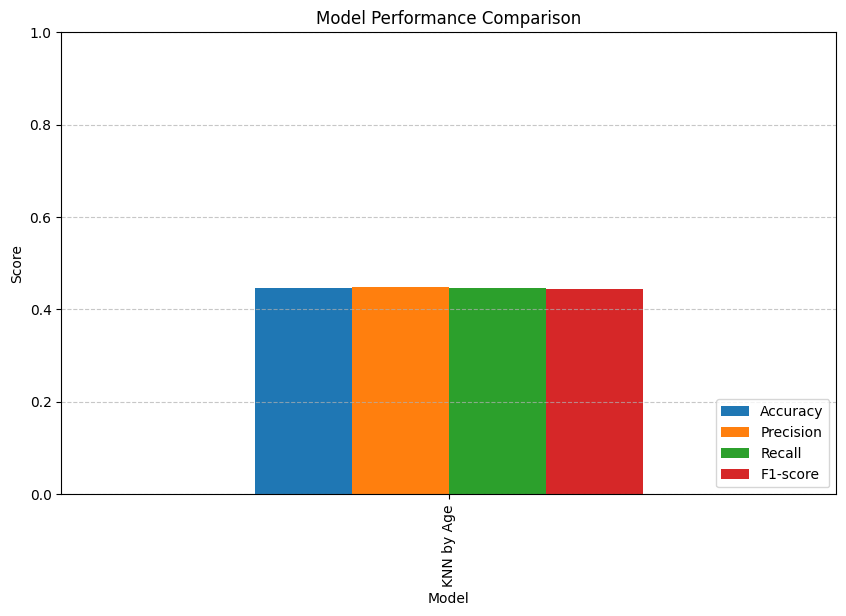

,Model,Accuracy,Precision,Recall,F1-score
0,KNN by Age,0.4455,0.4485,0.4455,0.4434


In [161]:
fit_predict_gender_age_pipeline_with_soft_feature(KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=5), "KNN by Gender", "KNN by Age")


Random Forest for Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.88      0.88      0.88      3946
 male_masculine       0.89      0.89      0.89      4532

       accuracy                           0.89      8478
      macro avg       0.89      0.88      0.89      8478
   weighted avg       0.89      0.89      0.89      8478

AUC-ROC for Gender Probabilities: 0.9522
Log Loss for Gender Probabilities: 0.3281


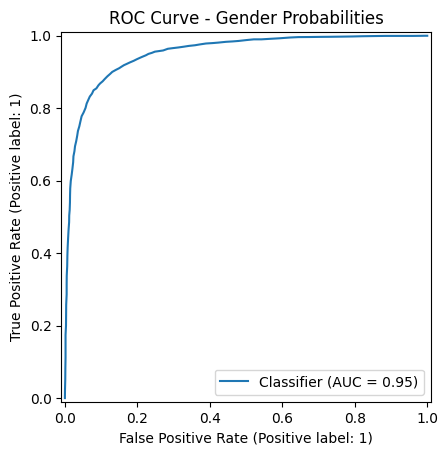

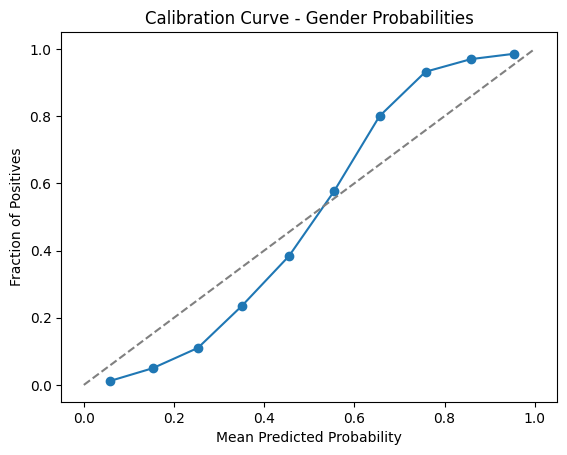


Fitting MLP for Age with gender probability feature

===== MLP for Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.53      0.64      0.58      7479
        20.0       0.42      0.44      0.43      7684
        30.0       0.43      0.43      0.43      7534
        40.0       0.44      0.39      0.41      6359
        50.0       0.45      0.49      0.47      5559
        60.0       0.49      0.34      0.40      3457
        70.0       0.58      0.35      0.44      1488

    accuracy                           0.46     39560
   macro avg       0.48      0.44      0.45     39560
weighted avg       0.46      0.46      0.46     39560


===== MLP for Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.38      0.47      0.42      1602
        20.0       0.29      0.30      0.29      1648
        30.0       0.27      0.29      0.28      1615
       

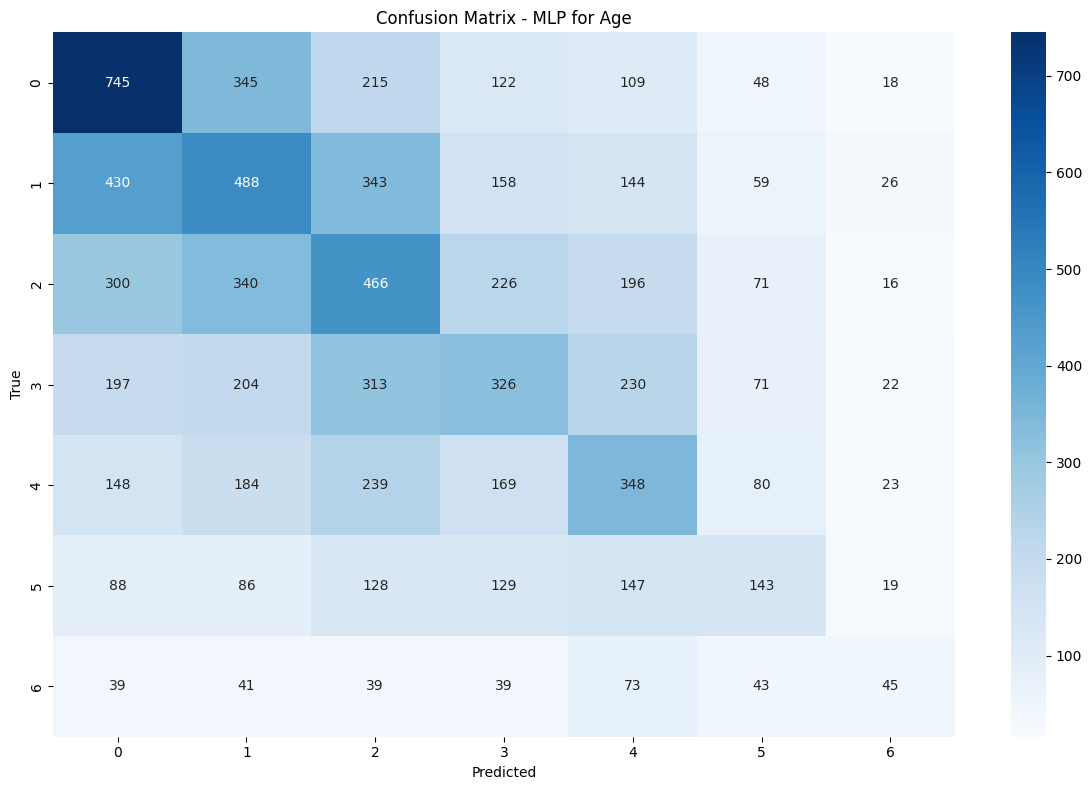

<Figure size 1000x600 with 0 Axes>

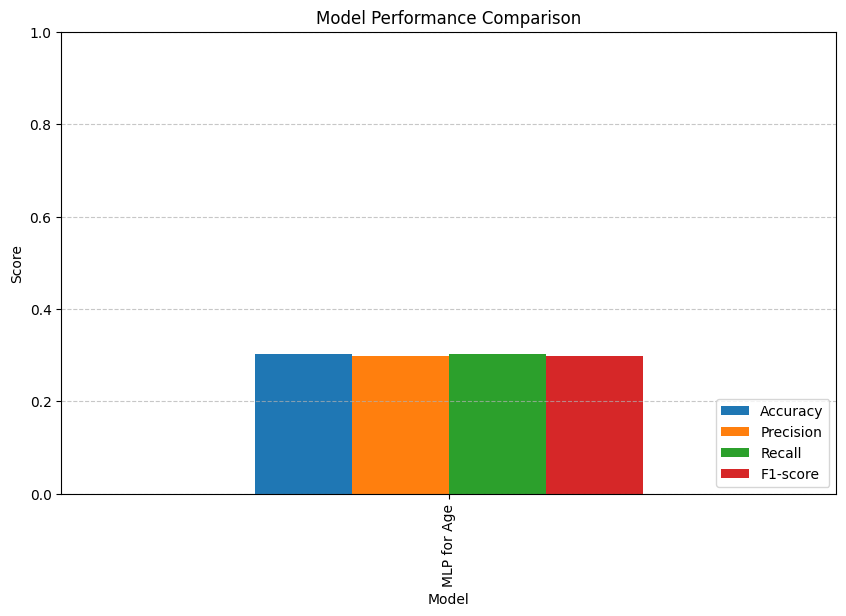

,Model,Accuracy,Precision,Recall,F1-score
0,MLP for Age,0.3021,0.2977,0.3021,0.2974


In [162]:
fit_predict_gender_age_pipeline_with_soft_feature(
    RandomForestClassifier(n_estimators=100, random_state=27),
    MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=2000, random_state=27, batch_size=32, learning_rate='adaptive', learning_rate_init=0.0005, alpha=0.001, early_stopping=True, validation_fraction=0.1),
    "Random Forest for Gender", "MLP for Age")


MLP for gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.88      0.92      0.90      3946
 male_masculine       0.93      0.89      0.91      4532

       accuracy                           0.90      8478
      macro avg       0.90      0.90      0.90      8478
   weighted avg       0.90      0.90      0.90      8478

AUC-ROC for Gender Probabilities: 0.9553
Log Loss for Gender Probabilities: 0.7519


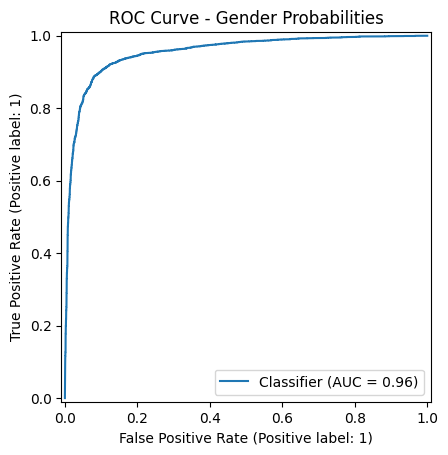

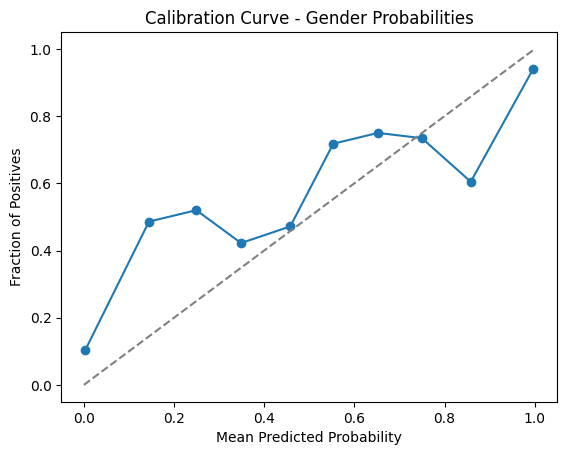


Fitting KNN for Age with gender probability feature

===== KNN for Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.64      0.82      0.72      7479
        20.0       0.65      0.62      0.64      7684
        30.0       0.66      0.66      0.66      7534
        40.0       0.70      0.66      0.68      6359
        50.0       0.74      0.66      0.70      5559
        60.0       0.78      0.66      0.72      3457
        70.0       0.80      0.72      0.76      1488

    accuracy                           0.68     39560
   macro avg       0.71      0.69      0.70     39560
weighted avg       0.69      0.68      0.68     39560


===== KNN for Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.44      0.59      0.50      1602
        20.0       0.37      0.35      0.36      1648
        30.0       0.41      0.42      0.42      1615
       

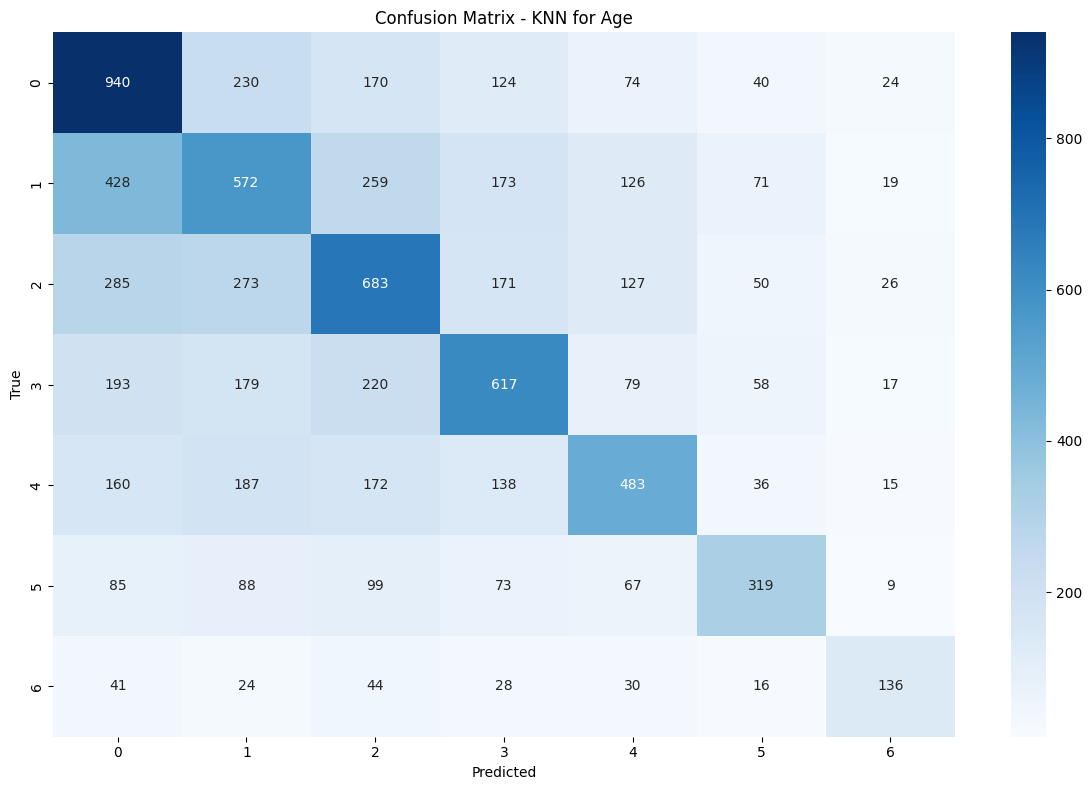

<Figure size 1000x600 with 0 Axes>

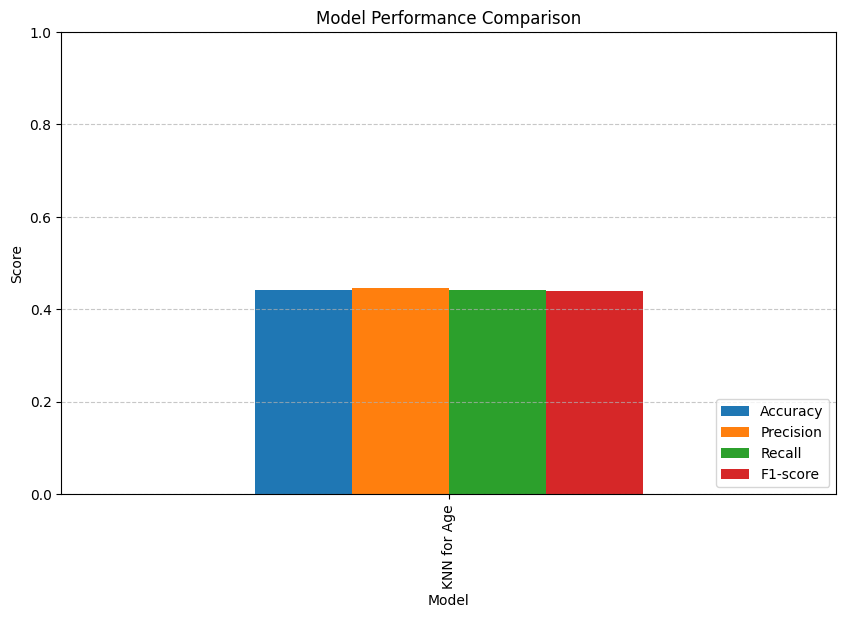

,Model,Accuracy,Precision,Recall,F1-score
0,KNN for Age,0.4423,0.4456,0.4423,0.4405


In [163]:
fit_predict_gender_age_pipeline_with_soft_feature(MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=27, batch_size=32, learning_rate='adaptive', learning_rate_init=0.0005, alpha=0.001), KNeighborsClassifier(n_neighbors=5), "MLP for gender", "KNN for Age")
                                                


MLP for Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.88      0.92      0.90      3946
 male_masculine       0.93      0.89      0.91      4532

       accuracy                           0.90      8478
      macro avg       0.90      0.90      0.90      8478
   weighted avg       0.90      0.90      0.90      8478

AUC-ROC for Gender Probabilities: 0.9553
Log Loss for Gender Probabilities: 0.7519


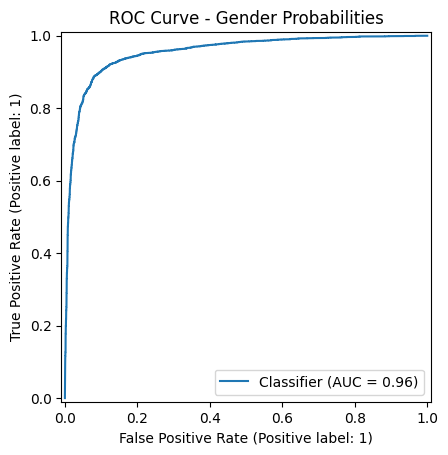

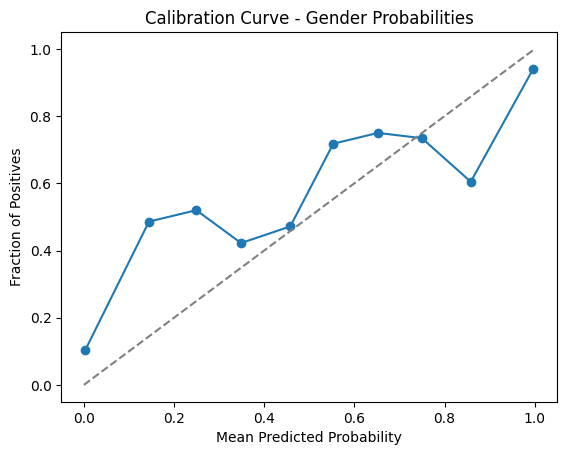


Fitting MLP for Age with gender probability feature

===== MLP for Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.60      0.72      0.66      7479
        20.0       0.53      0.49      0.51      7684
        30.0       0.51      0.55      0.53      7534
        40.0       0.52      0.56      0.54      6359
        50.0       0.60      0.54      0.57      5559
        60.0       0.66      0.46      0.54      3457
        70.0       0.71      0.54      0.61      1488

    accuracy                           0.56     39560
   macro avg       0.59      0.55      0.56     39560
weighted avg       0.57      0.56      0.56     39560


===== MLP for Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.39      0.46      0.43      1602
        20.0       0.29      0.25      0.27      1648
        30.0       0.27      0.30      0.29      1615
       

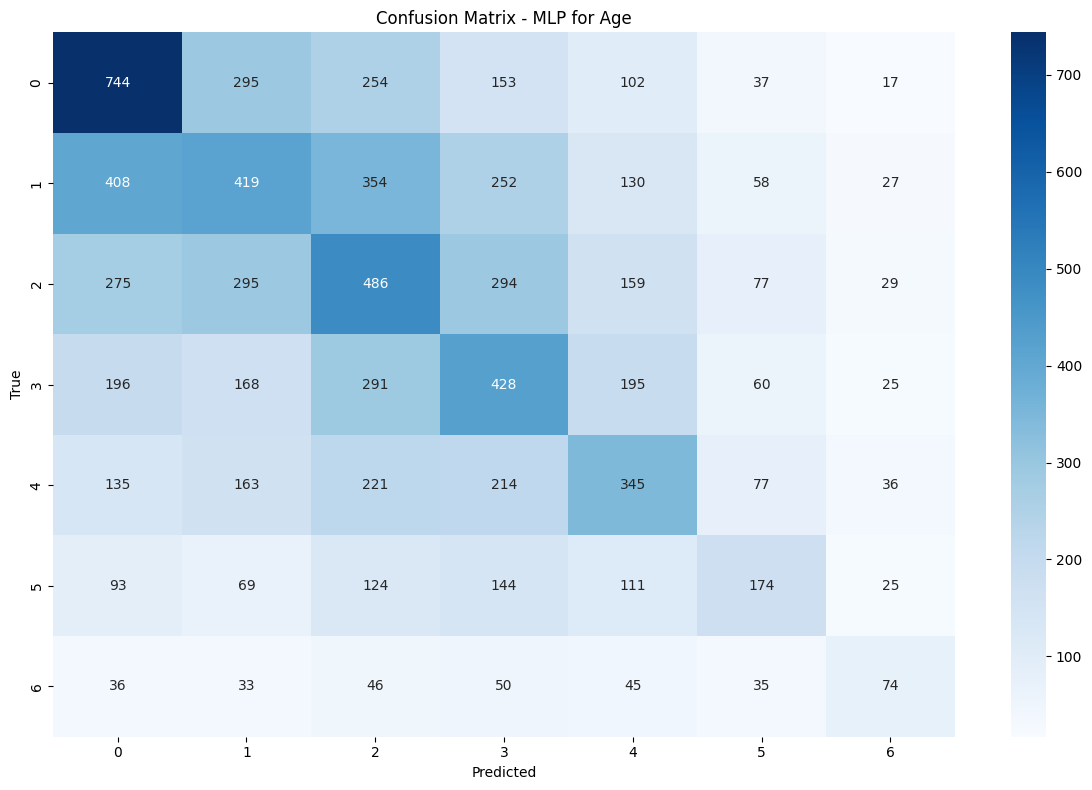

<Figure size 1000x600 with 0 Axes>

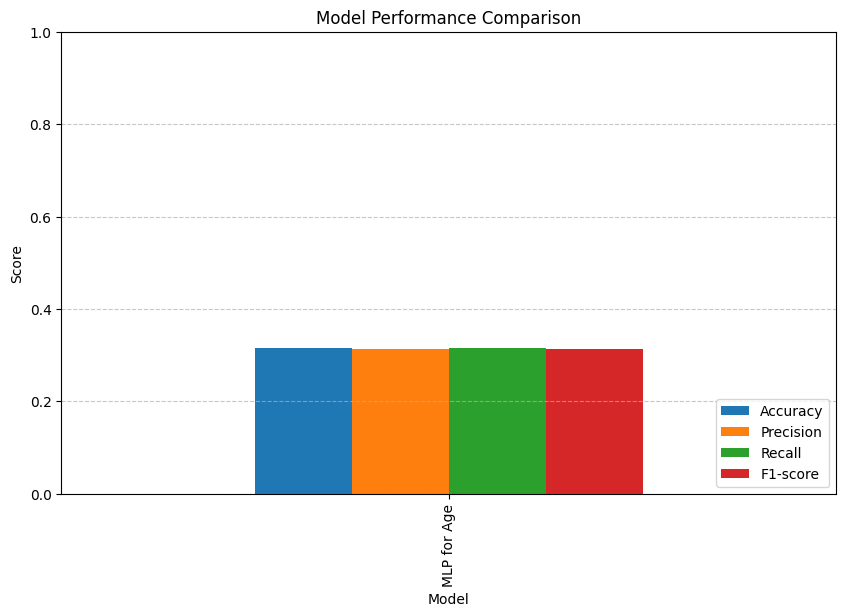

,Model,Accuracy,Precision,Recall,F1-score
0,MLP for Age,0.3149,0.3138,0.3149,0.3122


In [164]:
fit_predict_gender_age_pipeline_with_soft_feature(
    MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=27, batch_size=32, learning_rate='adaptive', learning_rate_init=0.0005, alpha=0.001),
    MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=2000, random_state=27, batch_size=32, learning_rate='adaptive', learning_rate_init=0.0005, alpha=0.001, early_stopping=True, validation_fraction=0.1),
    "MLP for Gender", "MLP for Age"
)


MLP for Gender Gender Model - Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4471
           1       0.91      0.91      0.91      5137

    accuracy                           0.91      9608
   macro avg       0.91      0.91      0.91      9608
weighted avg       0.91      0.91      0.91      9608

AUC-ROC for Gender Probabilities: 0.9603
Log Loss for Gender Probabilities: 0.3207


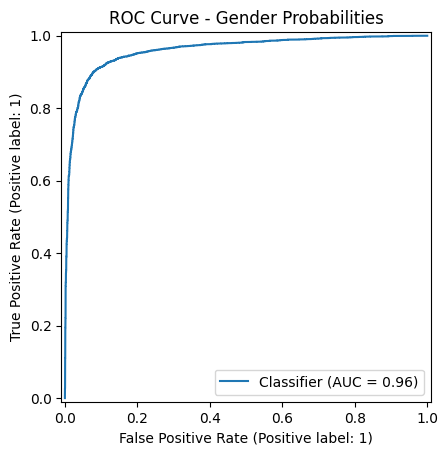

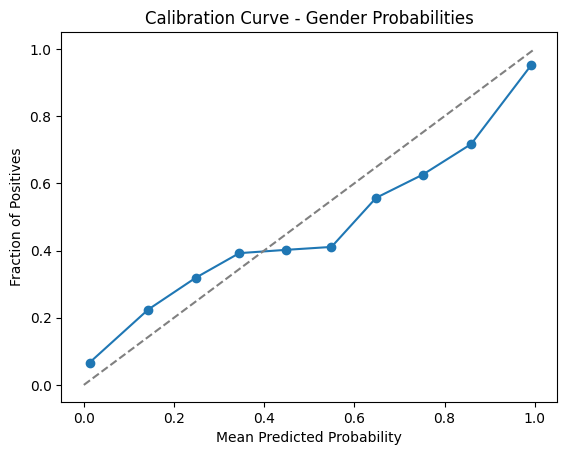


Fitting RF for Age with gender probability feature

===== RF for Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       1.00      1.00      1.00      7265
        20.0       1.00      1.00      1.00      7464
        30.0       1.00      1.00      1.00      7319
        40.0       1.00      1.00      1.00      6177
        50.0       1.00      1.00      1.00      5401
        60.0       1.00      1.00      1.00      3358
        70.0       1.00      1.00      1.00      1445

    accuracy                           1.00     38429
   macro avg       1.00      1.00      1.00     38429
weighted avg       1.00      1.00      1.00     38429

QWK: 1.0
MAE: 0.0

===== RF for Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

        10.0       0.46      0.57      0.51      1816
        20.0       0.34      0.43      0.38      1867
        30.0       0.35      0.54      0.42   

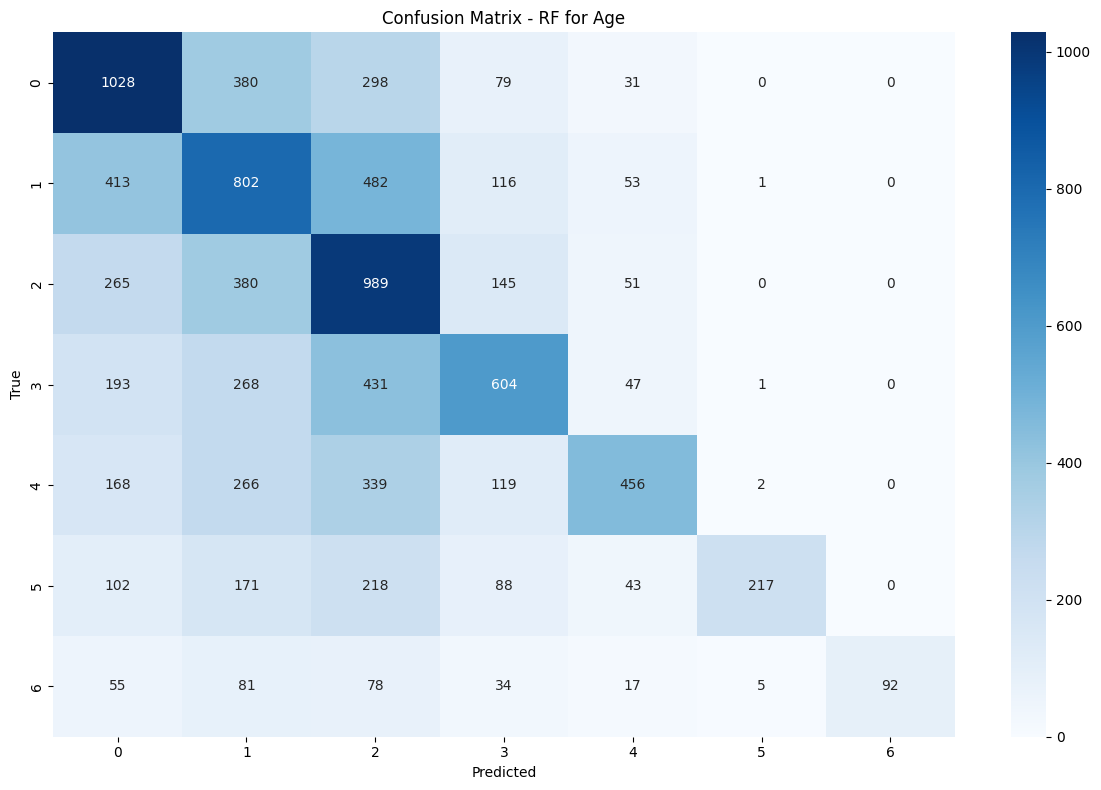

<Figure size 1000x600 with 0 Axes>

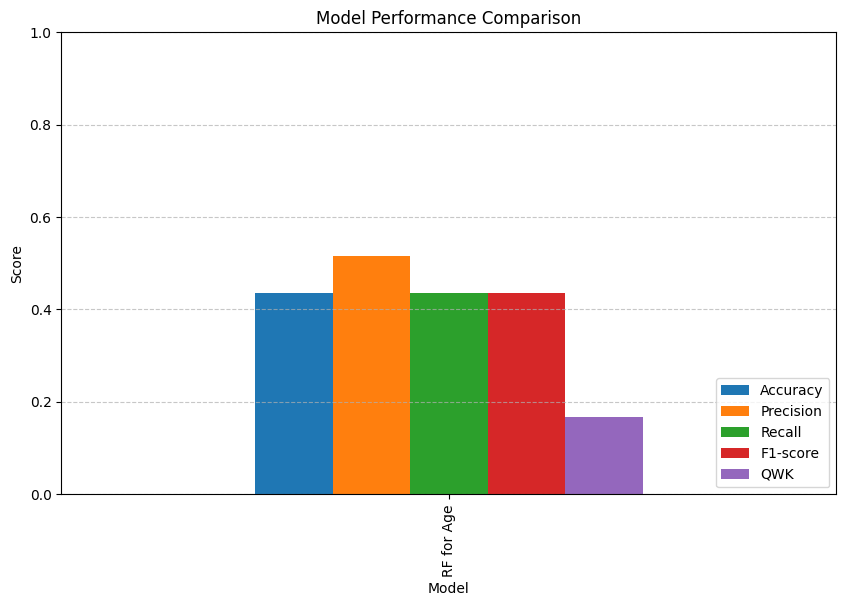

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,RF for Age,0.4359,0.5154,0.4359,0.4355,0.1667,11.3478


In [ ]:
fit_predict_gender_age_pipeline_with_soft_feature(
    MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), alpha=0.00005, activation="relu", batch_size=64, learning_rate_init=0.001, max_iter=3000, early_stopping=True, validation_fraction=0.1, learning_rate="adaptive", random_state=27),
    RandomForestClassifier(max_depth= 30, max_features="sqrt", min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=27),
    "MLP for Gender", "RF for Age"
)


Fitting GB for Gender on training set

Predict probability of GB for Gender on training set

Predict probability of GB for Gender on validation set

GB for Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.88      0.84      0.86      4478
 male_masculine       0.88      0.91      0.89      5722

       accuracy                           0.88     10200
      macro avg       0.88      0.87      0.88     10200
   weighted avg       0.88      0.88      0.88     10200

AUC-ROC for Gender Probabilities: 0.9465
Log Loss for Gender Probabilities: 0.3066


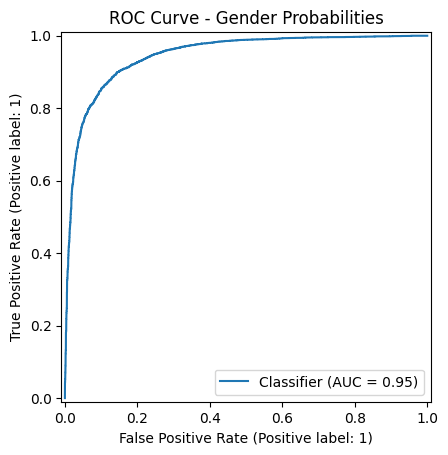

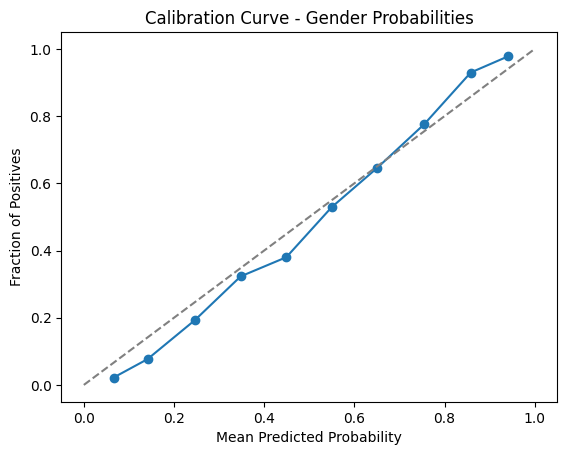


Fitting MLP for Age with gender probability feature

Predicting MLP for Age on training set

Predicting MLP for Age on validation set

===== MLP for Age: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     20400
           1       0.95      0.97      0.96     20400

    accuracy                           0.96     40800
   macro avg       0.96      0.96      0.96     40800
weighted avg       0.96      0.96      0.96     40800


===== MLP for Age: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5100
           1       0.71      0.72      0.71      5100

    accuracy                           0.71     10200
   macro avg       0.71      0.71      0.71     10200
weighted avg       0.71      0.71      0.71     10200



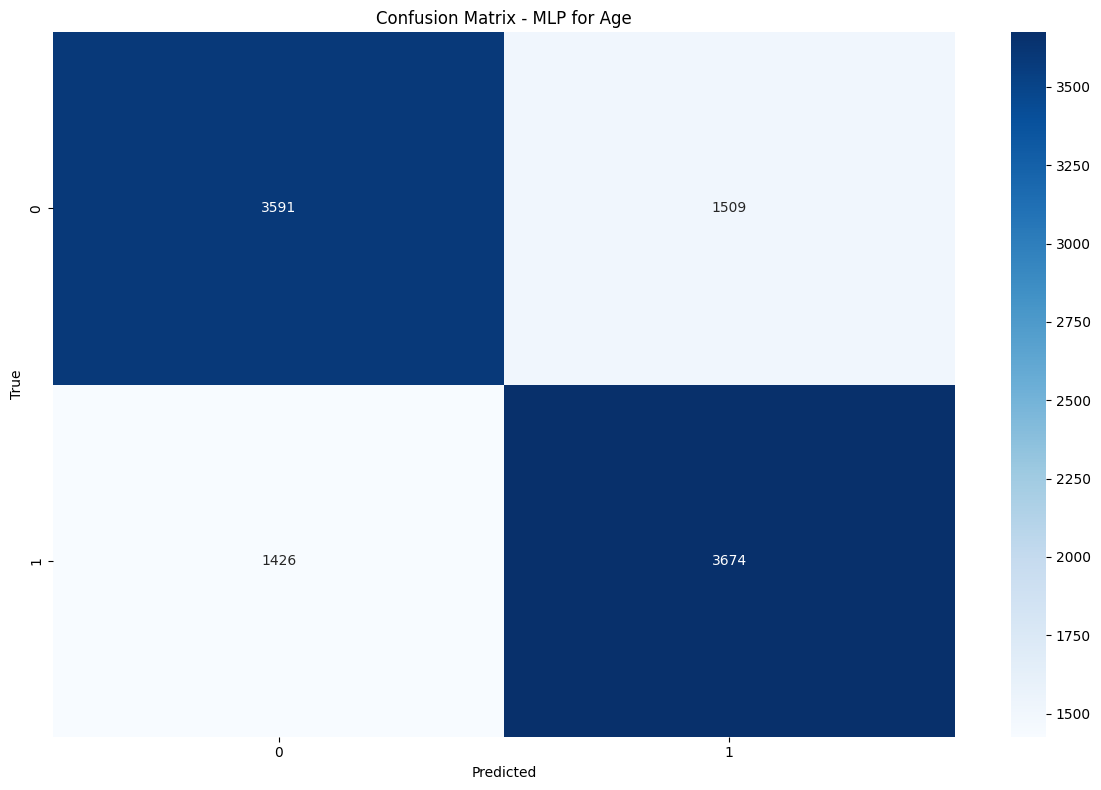

<Figure size 1000x600 with 0 Axes>

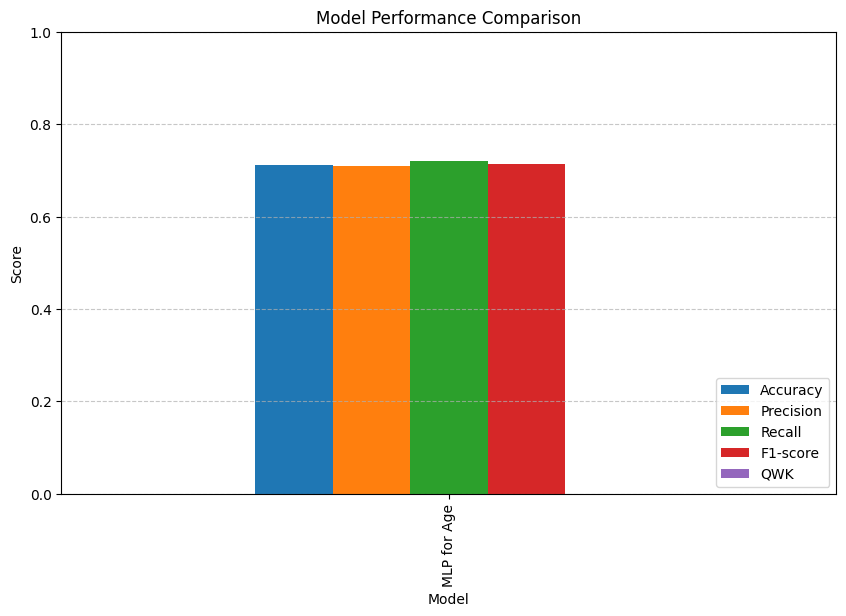

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP for Age,0.7123,0.7089,0.7204,0.7146,NaN,NaN


In [ ]:
# the GB params are actually optimised for age not gender classificaition i think

fit_predict_gender_age_pipeline_with_soft_feature(
    GradientBoostingClassifier(
        learning_rate=0.1, 
        max_depth=5, 
        n_estimators=200, 
        min_samples_leaf=50, 
        random_state=27
    ),
    MLPClassifier(
        activation="relu", 
        alpha=0.0001, 
        batch_size=64, 
        early_stopping=True, 
        hidden_layer_sizes=(512, 256), 
        learning_rate_init=0.001, 
        max_iter=200, 
        solver='adam', 
        random_state=27
    ),
    "GB for Gender", 
    "MLP for AGE",
    y_val_age=y_val["age_young_old_encoded"],
    y_train_age=y_train["age_young_old_encoded"],
    numerical=False
)

# 


Fitting MLP for Gender on training set

Predict probability of MLP for Gender on training set

Predict probability of MLP for Gender on validation set

MLP for Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.92      0.92      0.92      4478
 male_masculine       0.94      0.93      0.94      5722

       accuracy                           0.93     10200
      macro avg       0.93      0.93      0.93     10200
   weighted avg       0.93      0.93      0.93     10200

AUC-ROC for Gender Probabilities: 0.9753
Log Loss for Gender Probabilities: 0.5261


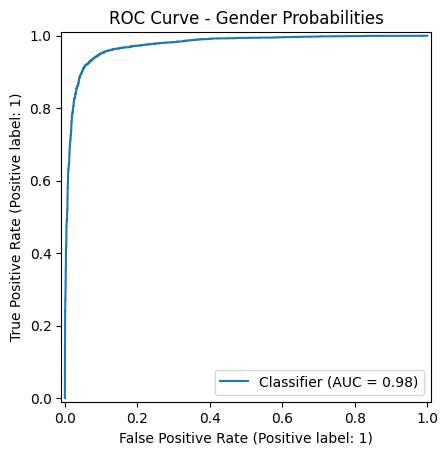

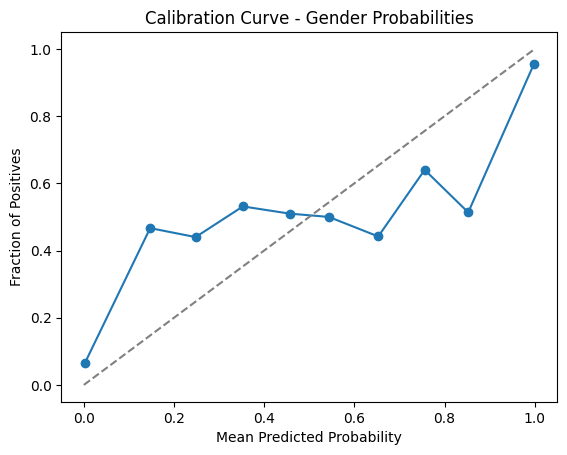


Fitting MLP for AGE with gender probability feature

Predicting MLP for AGE on training set

Predicting MLP for AGE on validation set

===== MLP for AGE: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     20400
           1       0.97      0.96      0.97     20400

    accuracy                           0.97     40800
   macro avg       0.97      0.97      0.97     40800
weighted avg       0.97      0.97      0.97     40800


===== MLP for AGE: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      5100
           1       0.74      0.69      0.71      5100

    accuracy                           0.72     10200
   macro avg       0.73      0.72      0.72     10200
weighted avg       0.73      0.72      0.72     10200



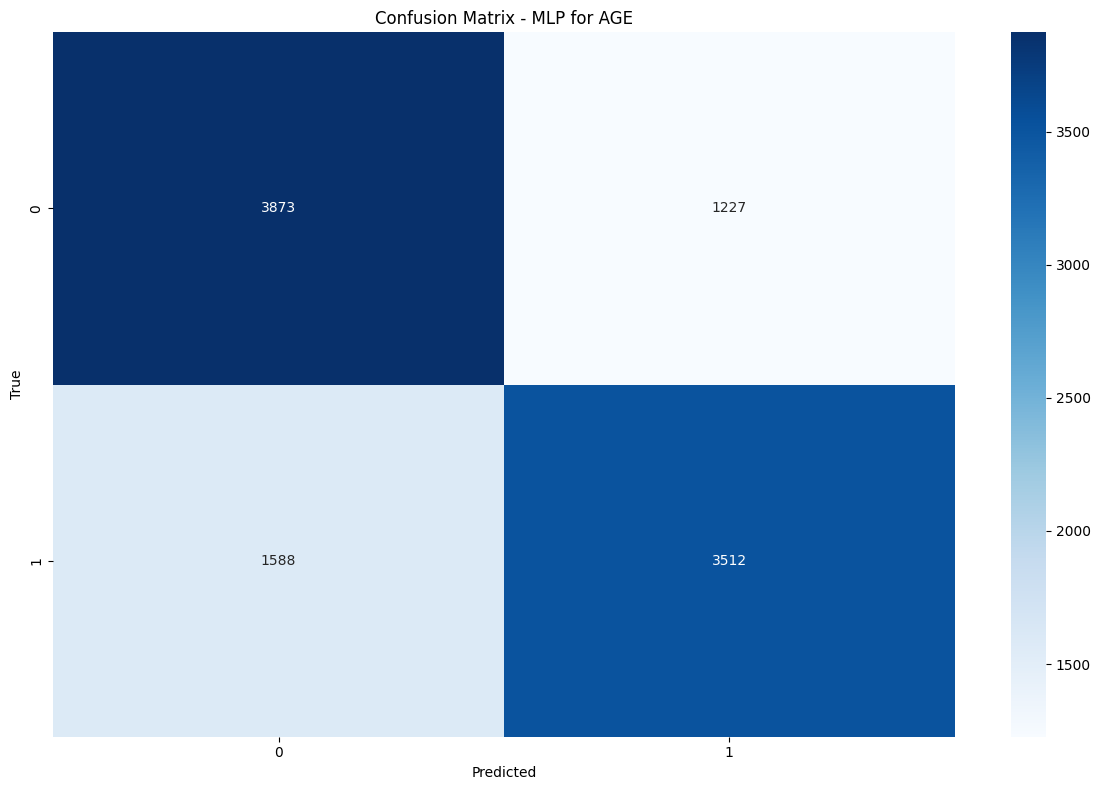

<Figure size 1000x600 with 0 Axes>

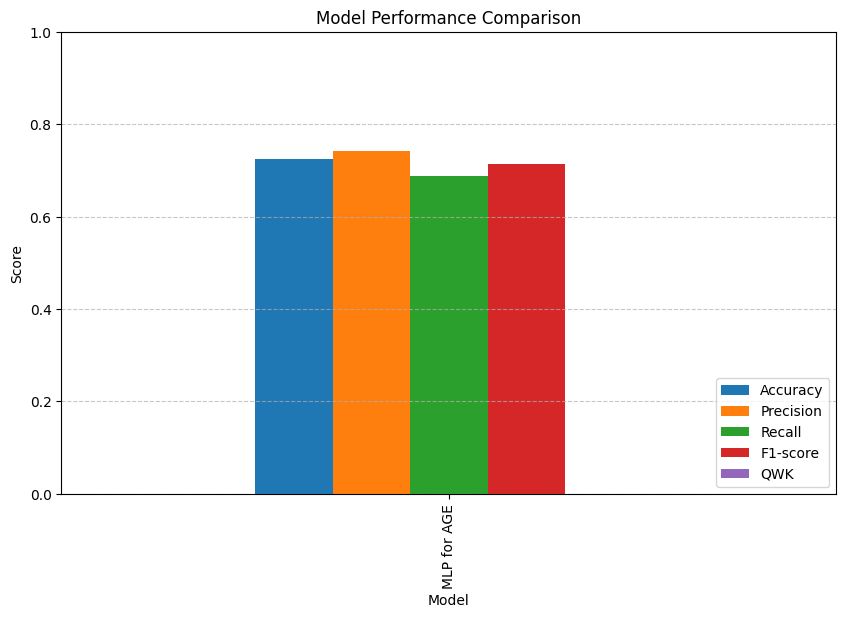

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP for AGE,0.7240,0.7411,0.6886,0.7139,NaN,NaN


In [ ]:
fit_predict_gender_age_pipeline_with_soft_feature(
    MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    alpha=0.00005,
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=3000,
    learning_rate='adaptive',
    random_state=27),
    
    MLPClassifier(
        activation="relu", 
        alpha=0.0001, 
        batch_size=64, 
        early_stopping=True, 
        hidden_layer_sizes=(512, 256), 
        learning_rate_init=0.001, 
        max_iter=200, 
        solver='adam', 
        random_state=27
    ),
    "MLP for Gender", 
    "MLP for AGE",
    y_val_age=y_val["age_young_old_encoded"],
    y_train_age=y_train["age_young_old_encoded"],
    numerical=False)


Fitting MLP for Gender on training set

Predict probability of MLP for Gender on training set

Predict probability of MLP for Gender on validation set

MLP for Gender Gender Model - Validation Set Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.92      0.92      0.92      4478
 male_masculine       0.94      0.93      0.94      5722

       accuracy                           0.93     10200
      macro avg       0.93      0.93      0.93     10200
   weighted avg       0.93      0.93      0.93     10200

AUC-ROC for Gender Probabilities: 0.9753
Log Loss for Gender Probabilities: 0.5261


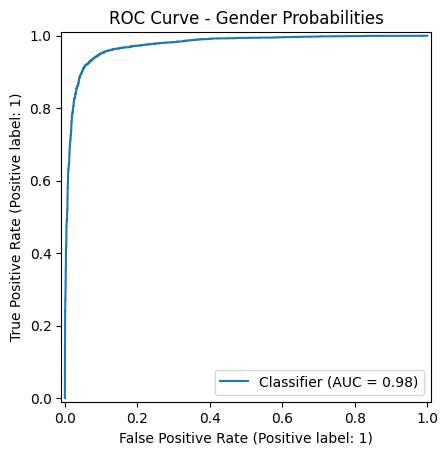

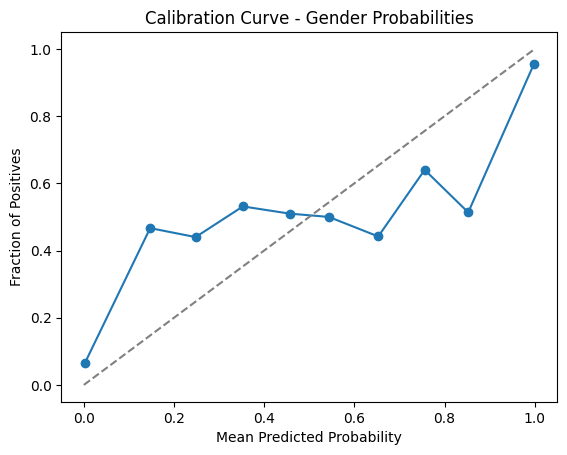


Fitting MLP for AGE with gender probability feature

Predicting MLP for AGE on training set

Predicting MLP for AGE on validation set

===== MLP for AGE: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     20400
           1       0.97      0.96      0.97     20400

    accuracy                           0.97     40800
   macro avg       0.97      0.97      0.97     40800
weighted avg       0.97      0.97      0.97     40800


===== MLP for AGE: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      5100
           1       0.73      0.71      0.72      5100

    accuracy                           0.72     10200
   macro avg       0.72      0.72      0.72     10200
weighted avg       0.72      0.72      0.72     10200



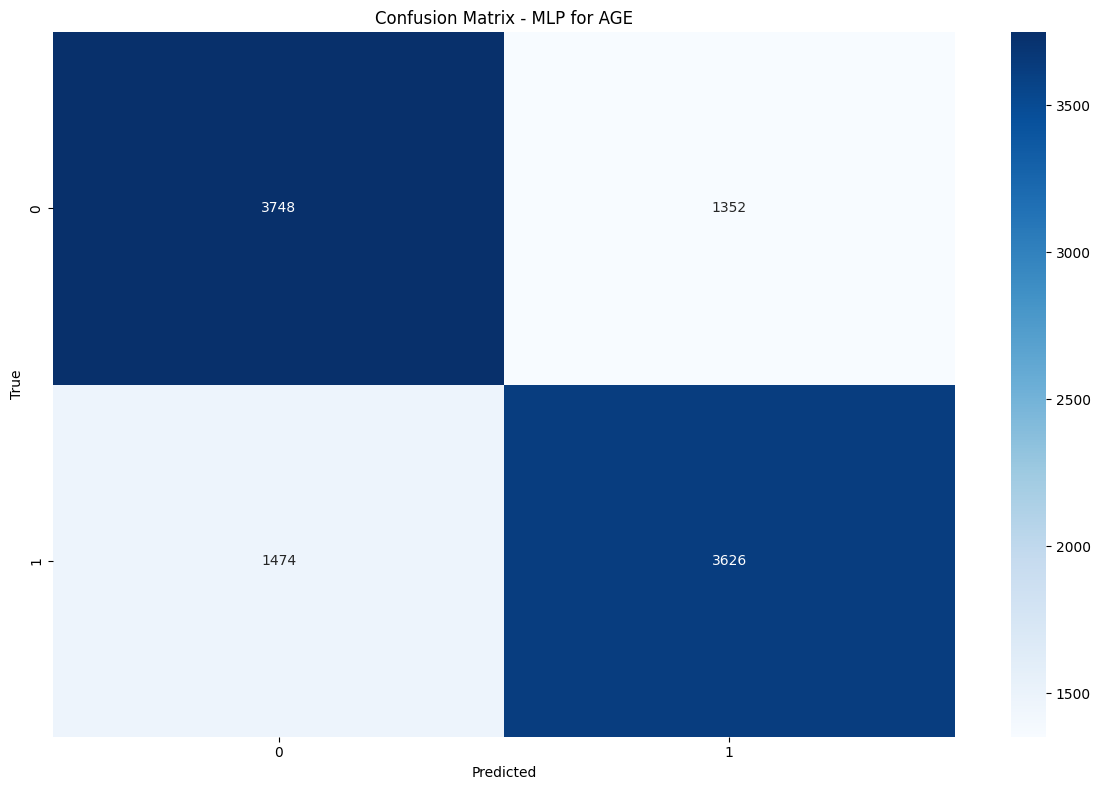

<Figure size 1000x600 with 0 Axes>

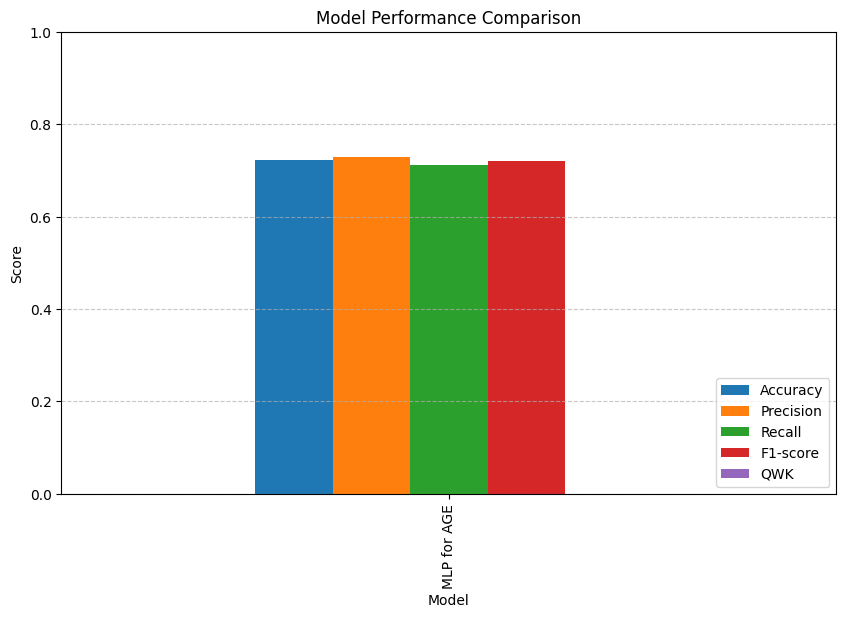

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,MLP for AGE,0.7229,0.7284,0.7110,0.7196,NaN,NaN


In [54]:
fit_predict_gender_age_pipeline_with_soft_feature(
    MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    alpha=0.00005,
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=3000,
    learning_rate='adaptive',
    random_state=27),
    
    MLPClassifier(
        activation="relu", 
        alpha=0.0001, 
        batch_size=64, 
        early_stopping=True, 
        hidden_layer_sizes=(512, 256,128), 
        learning_rate_init=0.001, 
        max_iter=200, 
        solver='adam', 
        random_state=27
    ),
    "MLP for Gender", 
    "MLP for AGE",
    y_val_age=y_val["age_young_old_encoded"],
    y_train_age=y_train["age_young_old_encoded"],
    numerical=False)

## BOSS FIGHT

### Baseline

Evaluating RandomForest on training set...

===== RandomForest: Training Set =====
Classification Report:
              precision    recall  f1-score   support

         old       1.00      1.00      1.00     20400
       young       1.00      1.00      1.00     20400

    accuracy                           1.00     40800
   macro avg       1.00      1.00      1.00     40800
weighted avg       1.00      1.00      1.00     40800

Evaluating RandomForest on validation set...

===== RandomForest: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

         old       0.69      0.76      0.72      4500
       young       0.73      0.65      0.69      4500

    accuracy                           0.70      9000
   macro avg       0.71      0.70      0.70      9000
weighted avg       0.71      0.70      0.70      9000



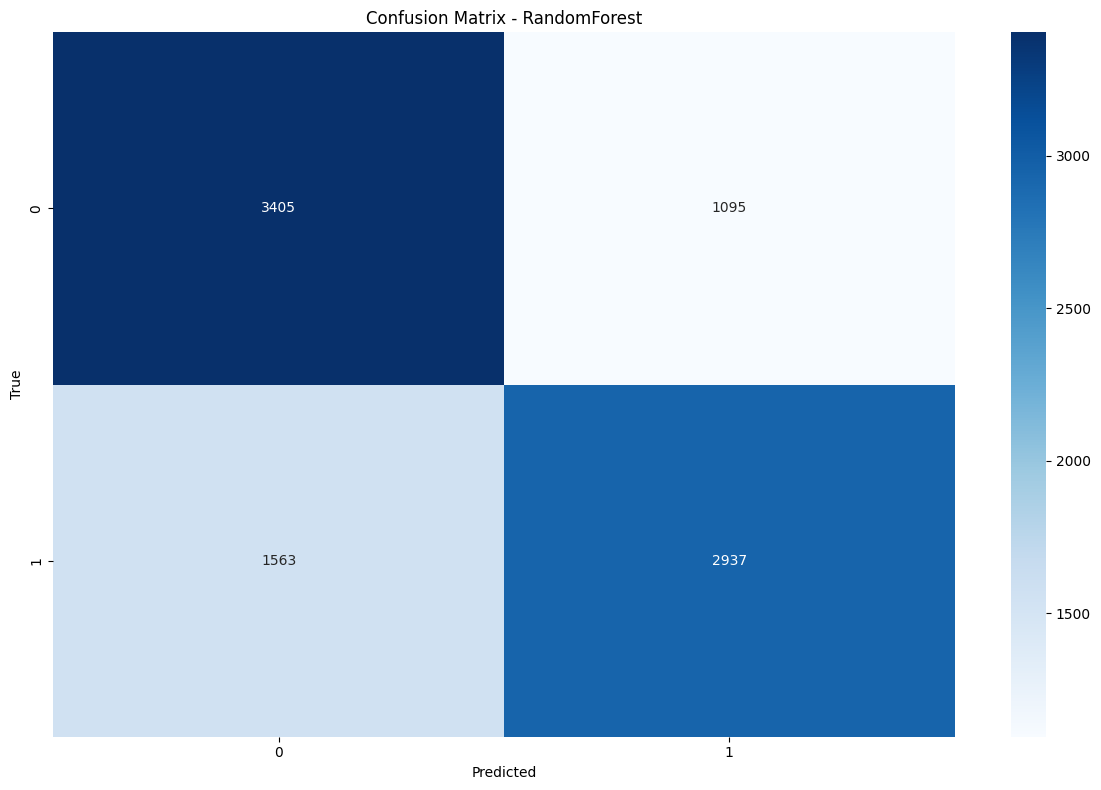

<Figure size 1000x600 with 0 Axes>

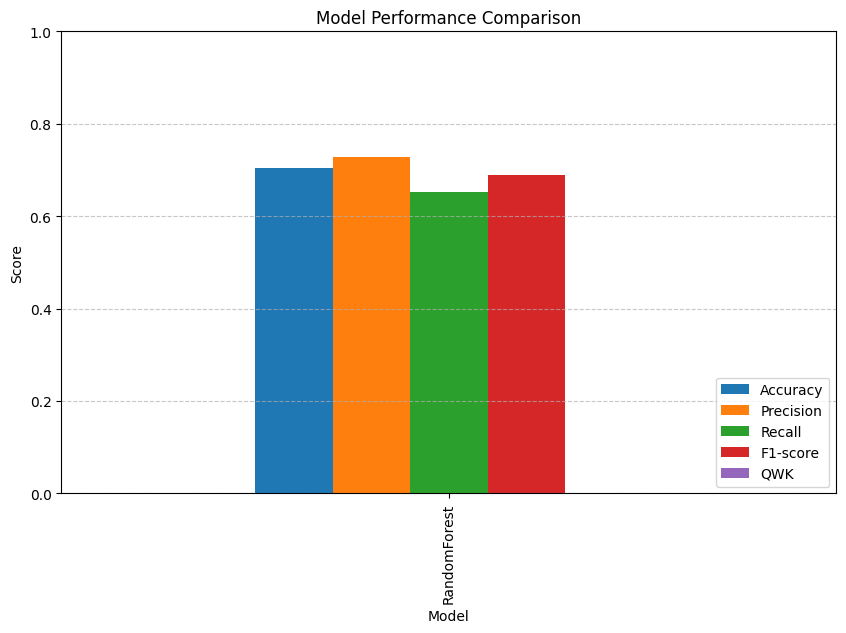

,Model,Accuracy,Precision,Recall,F1-score,QWK,MAE
0,RandomForest,0.7047,0.7284,0.6527,0.6885,NaN,NaN


In [55]:
fit_pipeline_predict_evaluate(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=27
    ), 
    "RandomForest", 
    X_train=X_train, 
    y_train=y_train["age_young_old"], 
    X_val=X_test, 
    y_val=y_test["age_young_old"], 
    PCA=False, 
    LDA=False,
    binning=identity, 
    numerical=False
)

### Optimised Baseline

In [64]:
def optimize_mlp_for_age_binary_classification(
    X_train, y_train, X_val, y_val,
    preprocessing,
    param_grid=None
):
    """
    Grid search optimization for MLP classifier to predict binary age categories.

    Parameters
    ----------
    X_train, y_train : pd.DataFrame, pd.Series
        Training features and labels
    X_val, y_val : pd.DataFrame, pd.Series
        Validation features and labels
    preprocessing : sklearn Pipeline or ColumnTransformer
        Preprocessing pipeline
    param_grid : dict, optional
        Grid of hyperparameters

    Returns
    -------
    best_model : sklearn estimator
    results_df_sorted : pd.DataFrame
    """

    if param_grid is None:
        param_grid = {
            'mlp__hidden_layer_sizes': [(512, 256),
            ],
            'mlp__alpha': [0.0001],
            'mlp__learning_rate_init': [0.001],
            'mlp__batch_size': [64],
            'mlp__early_stopping': [True],
            'mlp__max_iter': [200, 300, 400, 500, 1000],
            'mlp__solver': ['adam'],
            'mlp__activation': ['relu'],
        }

    mlp = MLPClassifier(random_state=27)

    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('mlp', mlp)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1,
    )

    print("Starting MLP grid search for binary age classification...")
    grid_search.fit(X_train, y_train)

    print(f"\nBest Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)

    return best_model, results_df_sorted


In [65]:
best_model_age_binary, results_mlp_age_binary = optimize_mlp_for_age_binary_classification(
    X_train,
    y_train['age_young_old_encoded'],
    X_val,
    y_val['age_young_old_encoded'],
    preprocessing=preprocessing
)

Starting MLP grid search for binary age classification...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=300, mlp__solver=adam; total time= 3.8min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=200, mlp__solver=adam; total time= 3.8min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=300, mlp__solver=adam; total time= 3.9min
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=64, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate_init=0.001, mlp__max_iter=400, mlp__solver=adam; total time= 3.9min
[CV] E

### 2 Stage

### Soft